In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
font = {'family':'Century','style':'normal','size':10,'weight':'normal'}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
np.seterr(divide='ignore', invalid='ignore')
matplotlib.rc('axes',titlesize=15,labelsize=15,linewidth=1.5)
def nolabely(axis):
    for label in axis.get_yticklabels():
        label.set_visible(False)
def nolabelx(axis):
    for label in axis.get_xticklabels():
        label.set_visible(False)
direct="BifDiagram1/"
from scipy.integrate import trapz as trapz


Loading the Solution

In [4]:
first=True
elvec=['phis','phin','Phi','Q']
fun={}
for el in elvec:
    first = True
    with open(direct+el+'.txt', 'r') as f:
        l=csv.reader(f, delimiter=',')
        for row in l:
            if first:
                temp=np.array(row,dtype=float)
                first=False
            else:
                row=np.array(row,dtype=float)
                temp=np.column_stack((temp,row))
    f.close()
    fun[el]=temp
phi0=[]
H=[]
first = True
with open(direct+'data_diagram.txt', 'r') as f:
    l=csv.reader(f, delimiter=',')
    for row in l:
        temp=np.array(row,dtype=float)
        phi0.append(temp[0])
        H.append(temp[1])
f.close()

Plotting of the soltion

Folder already exist


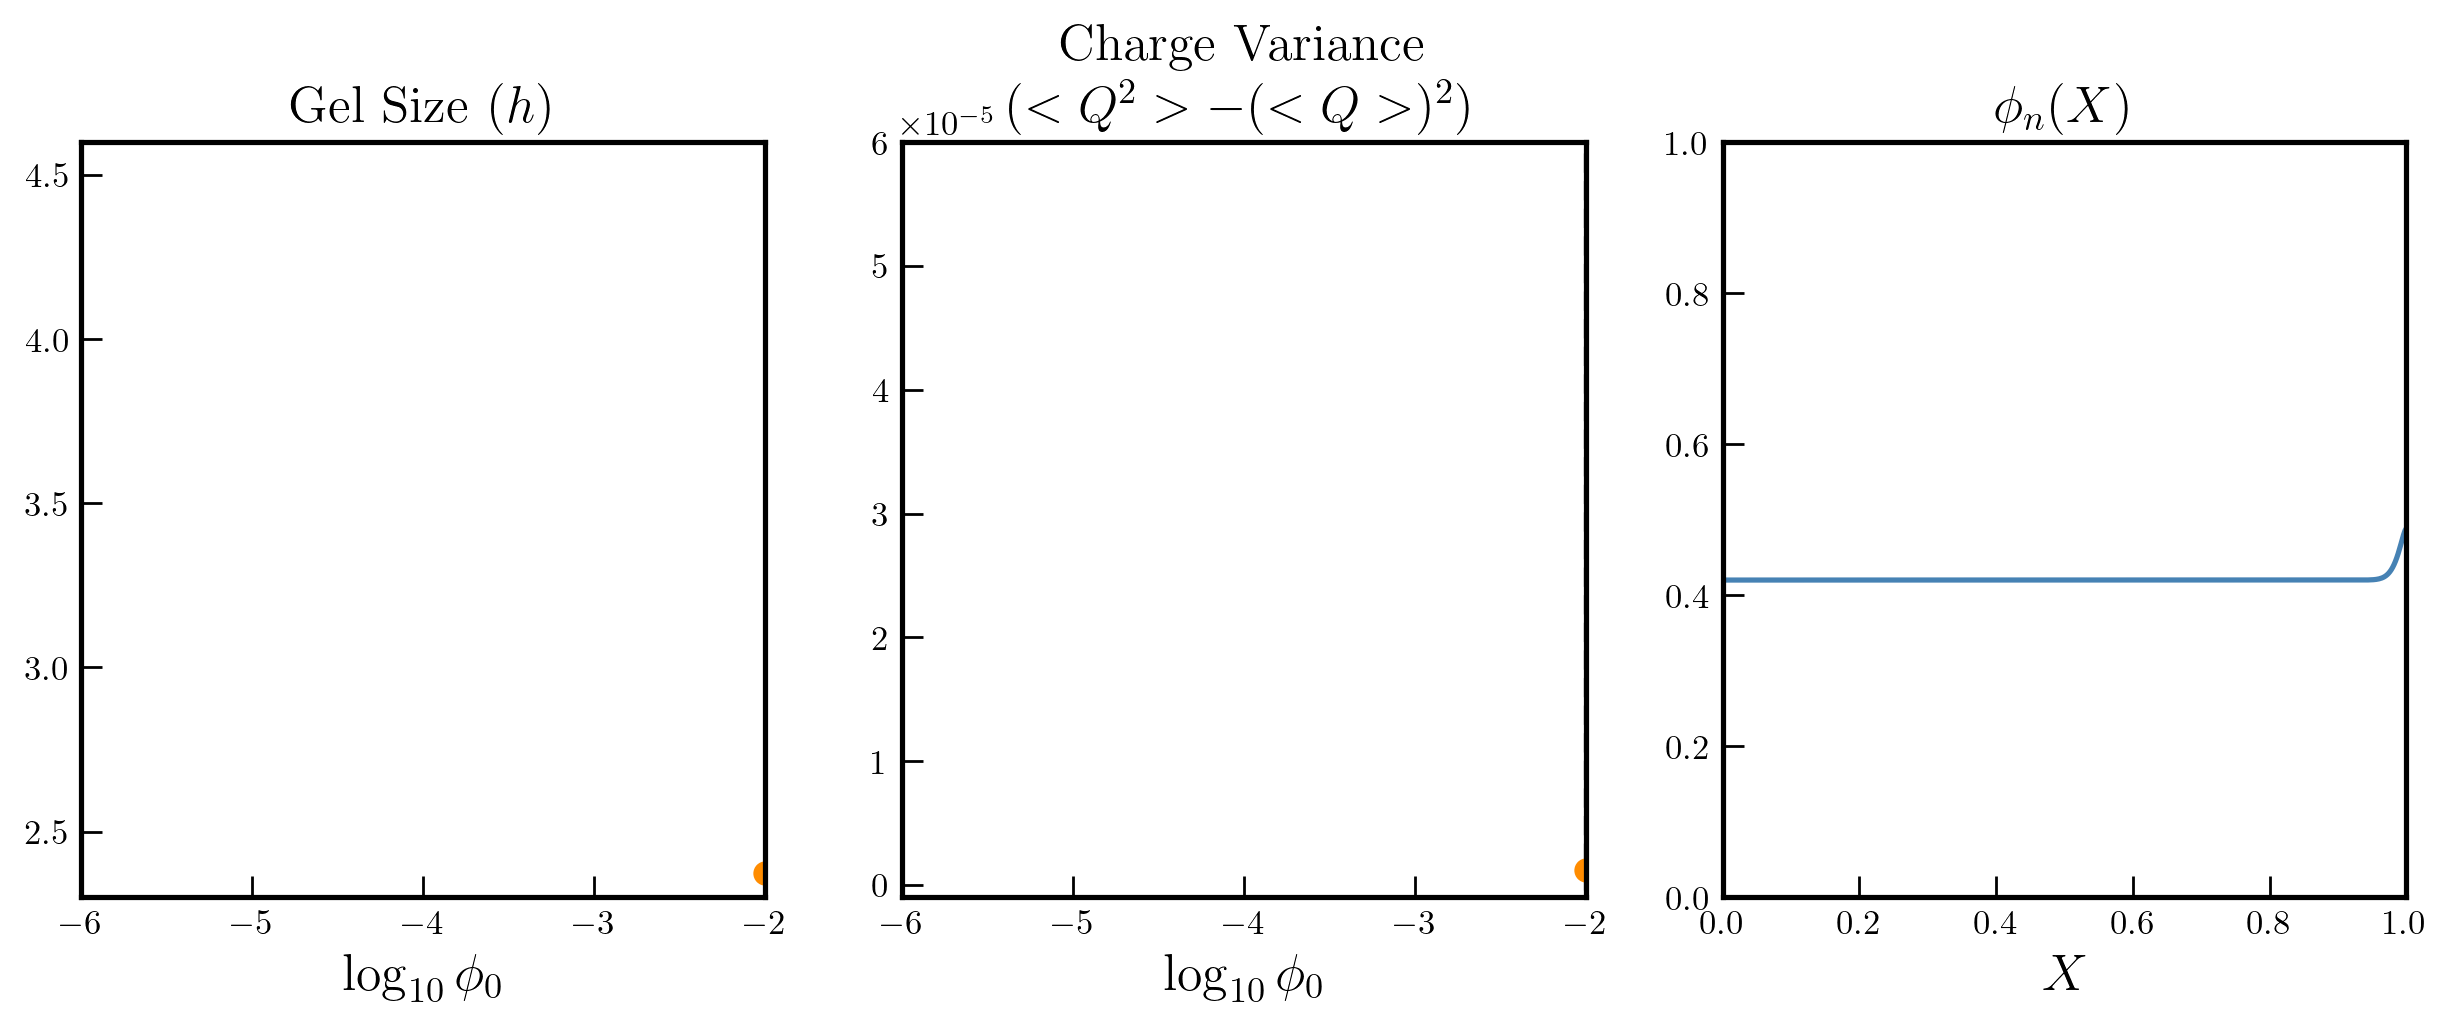

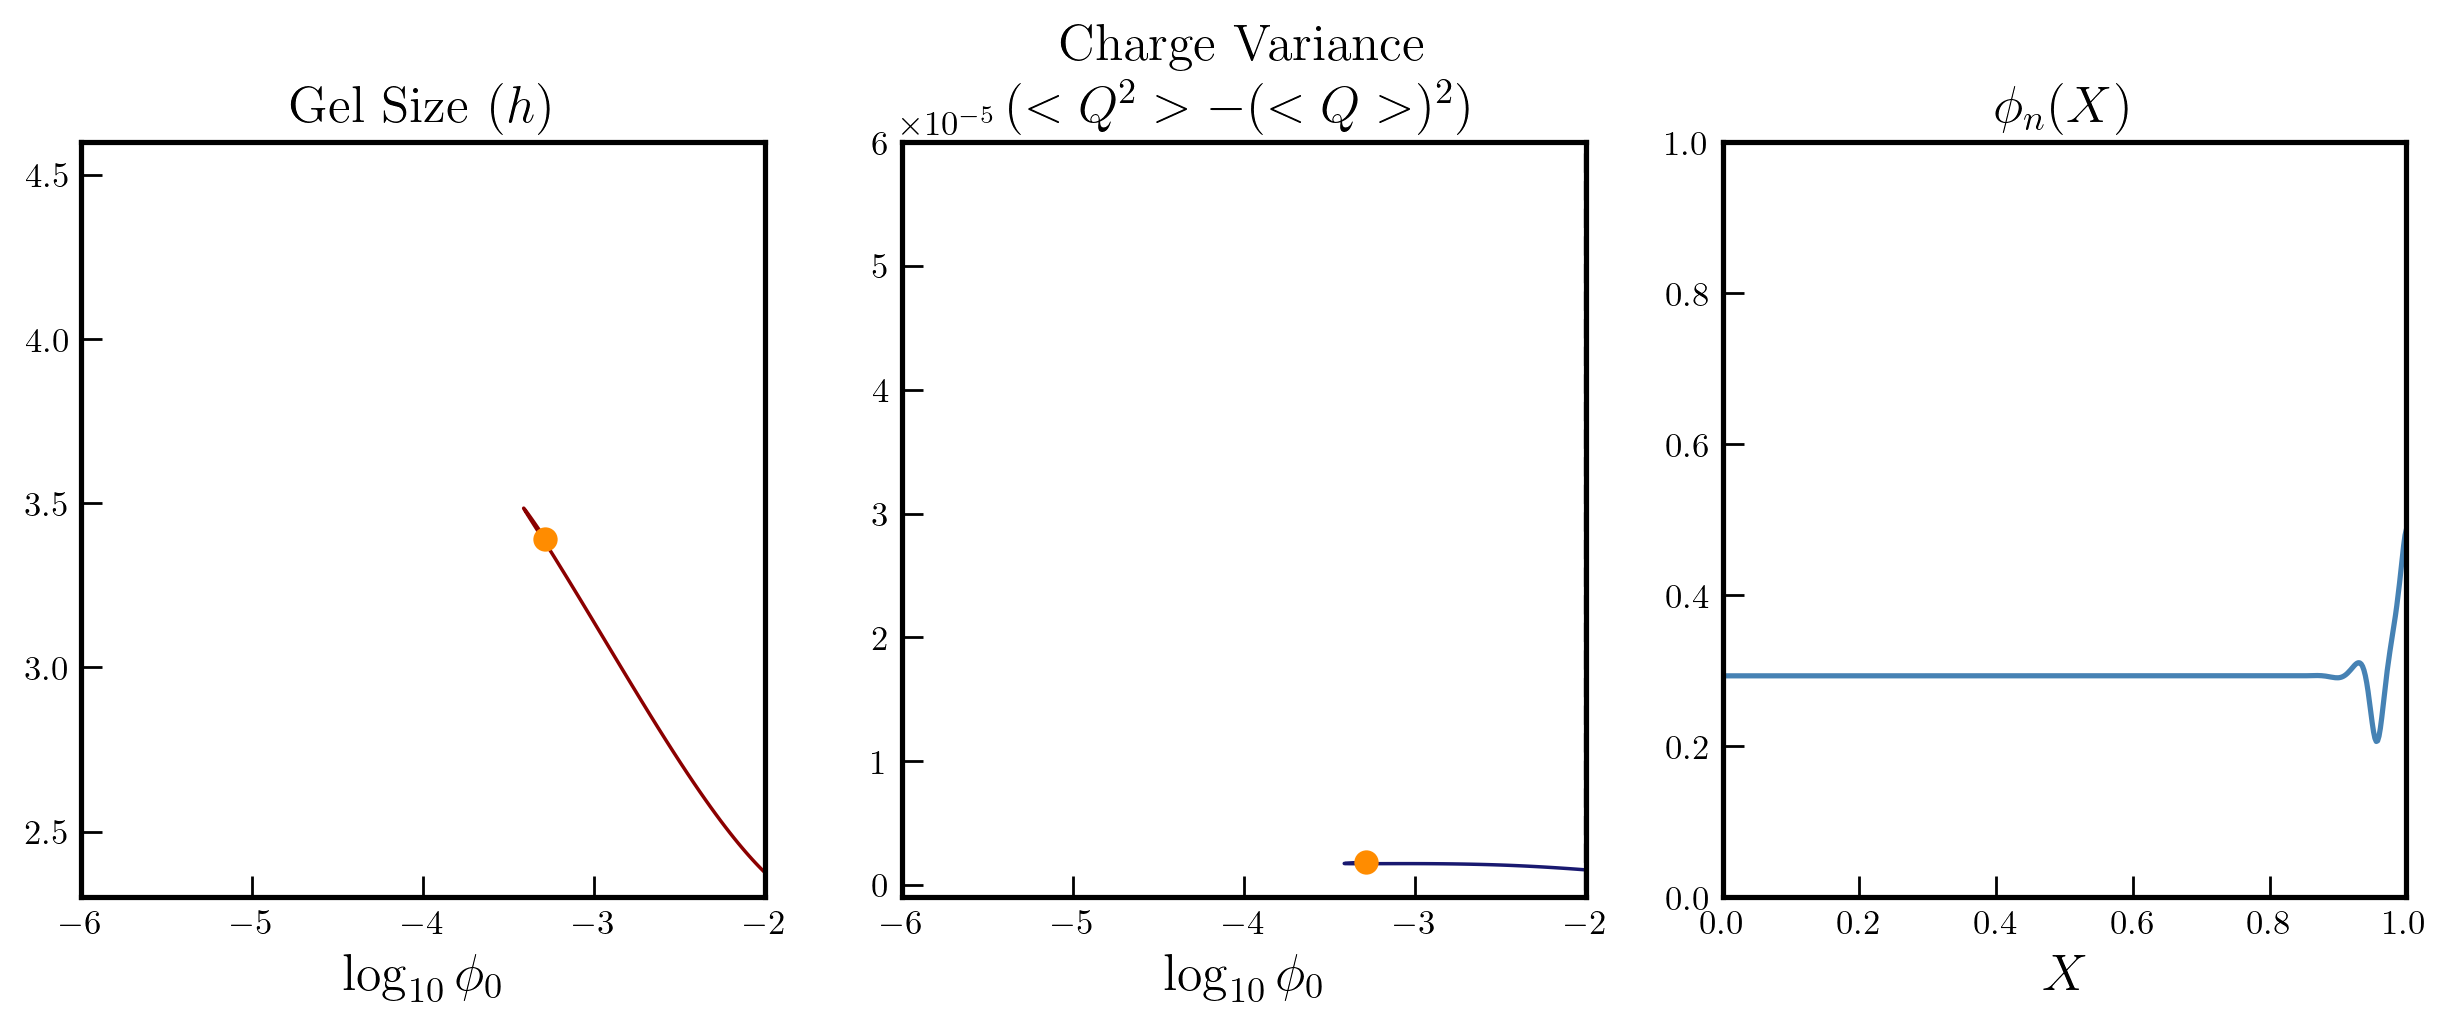

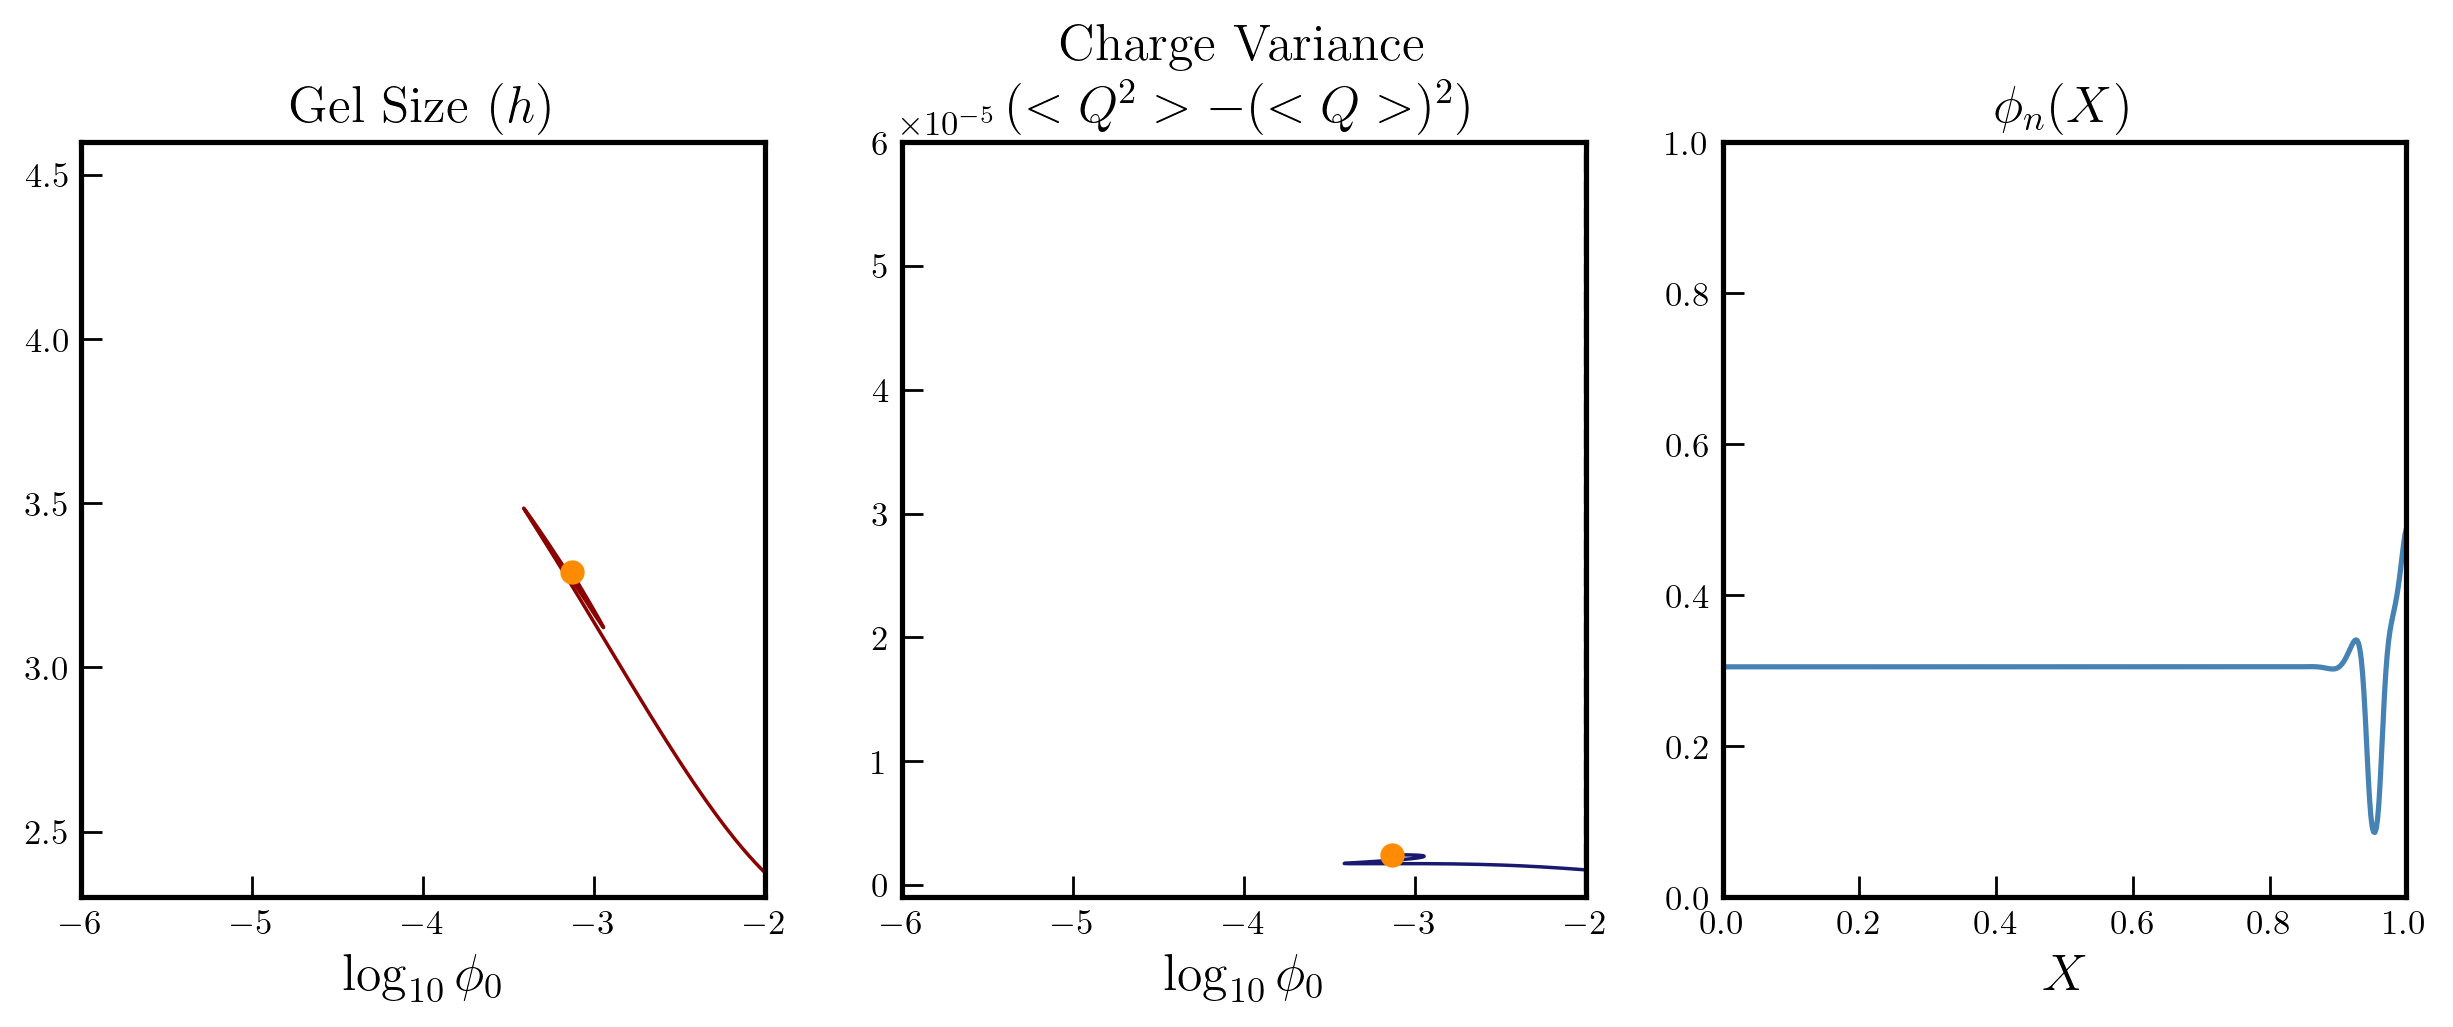

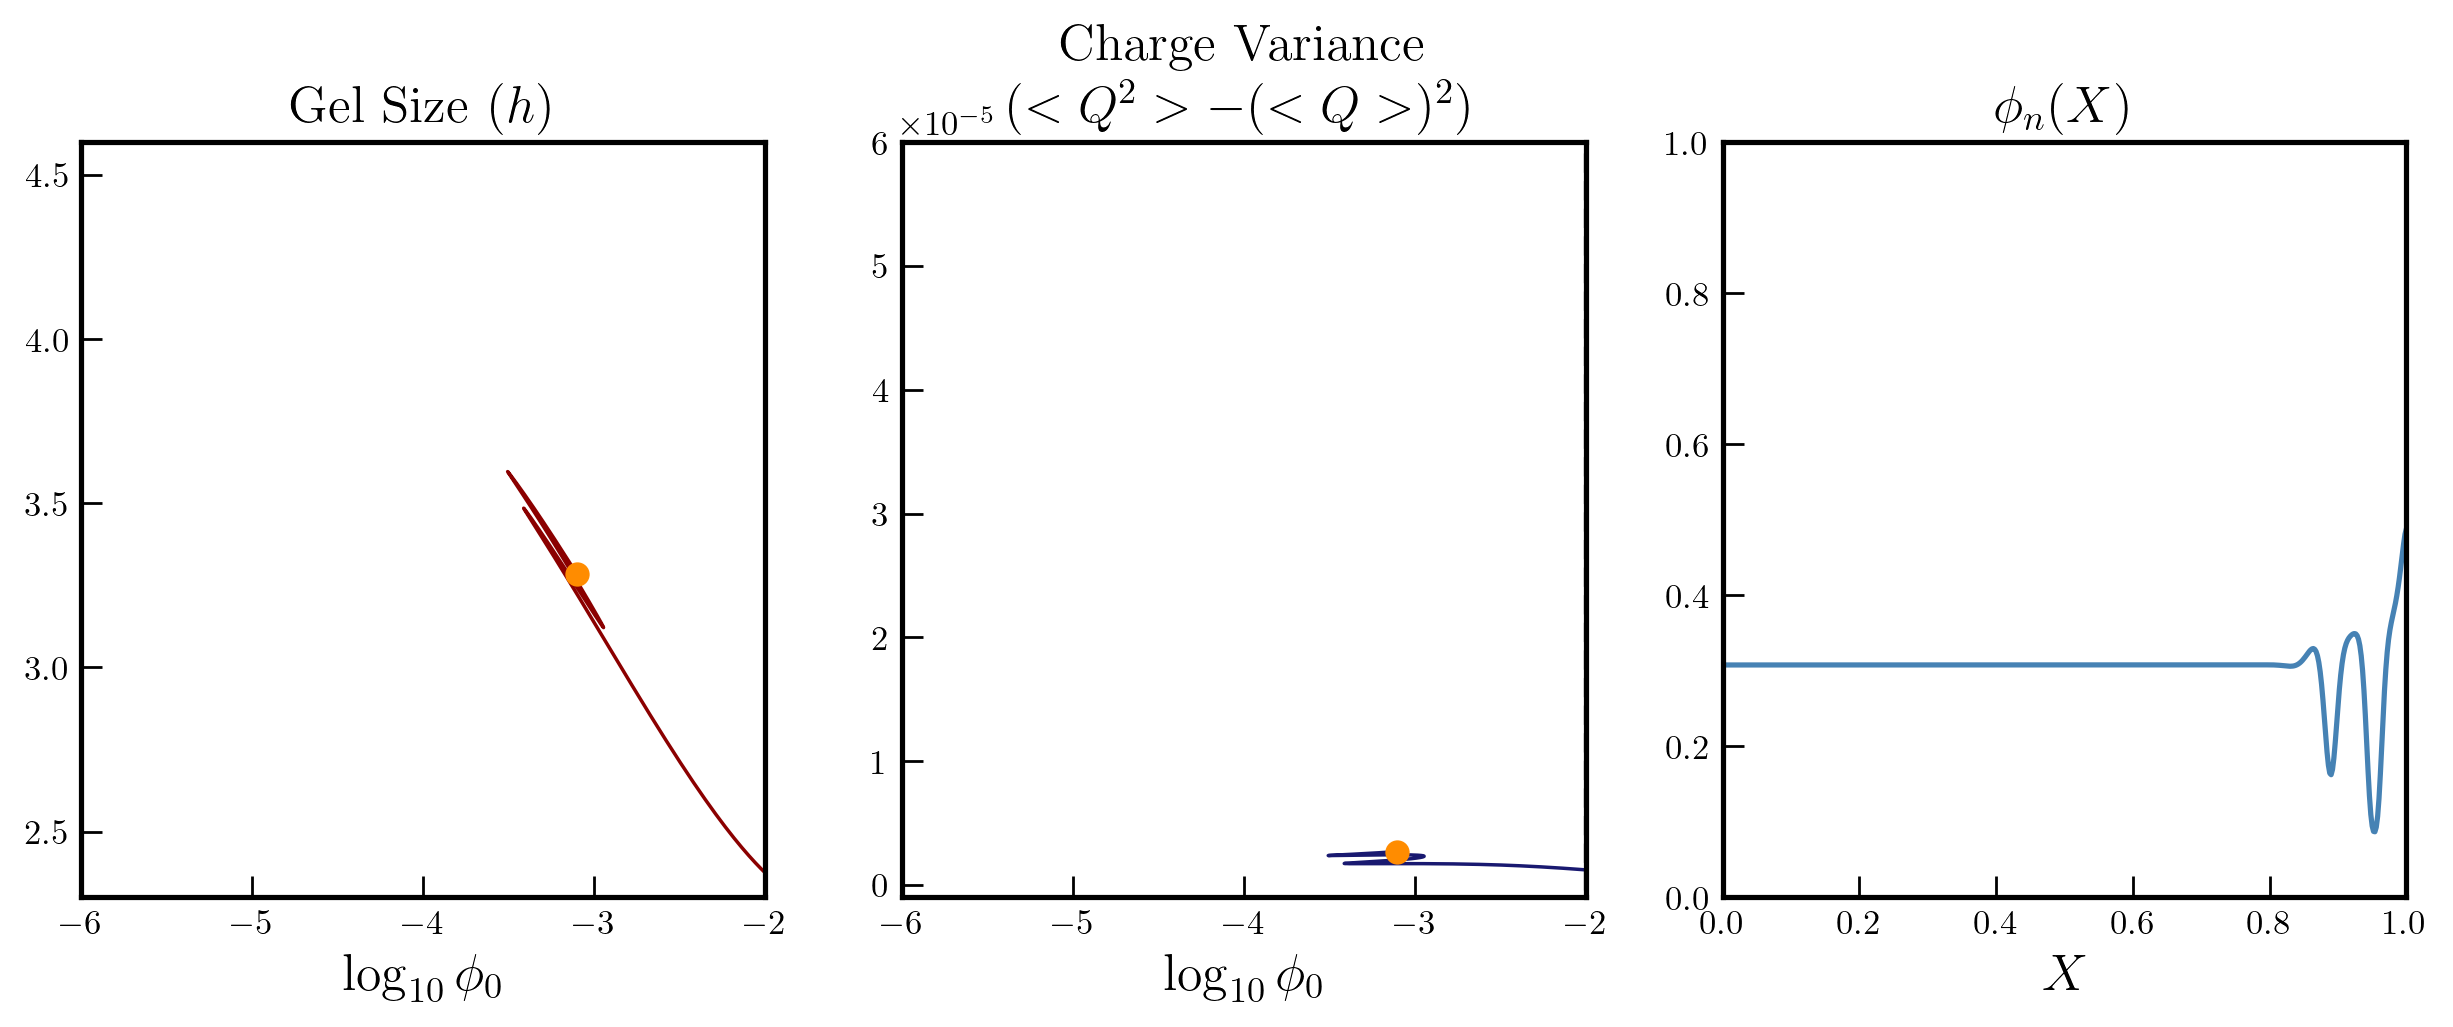

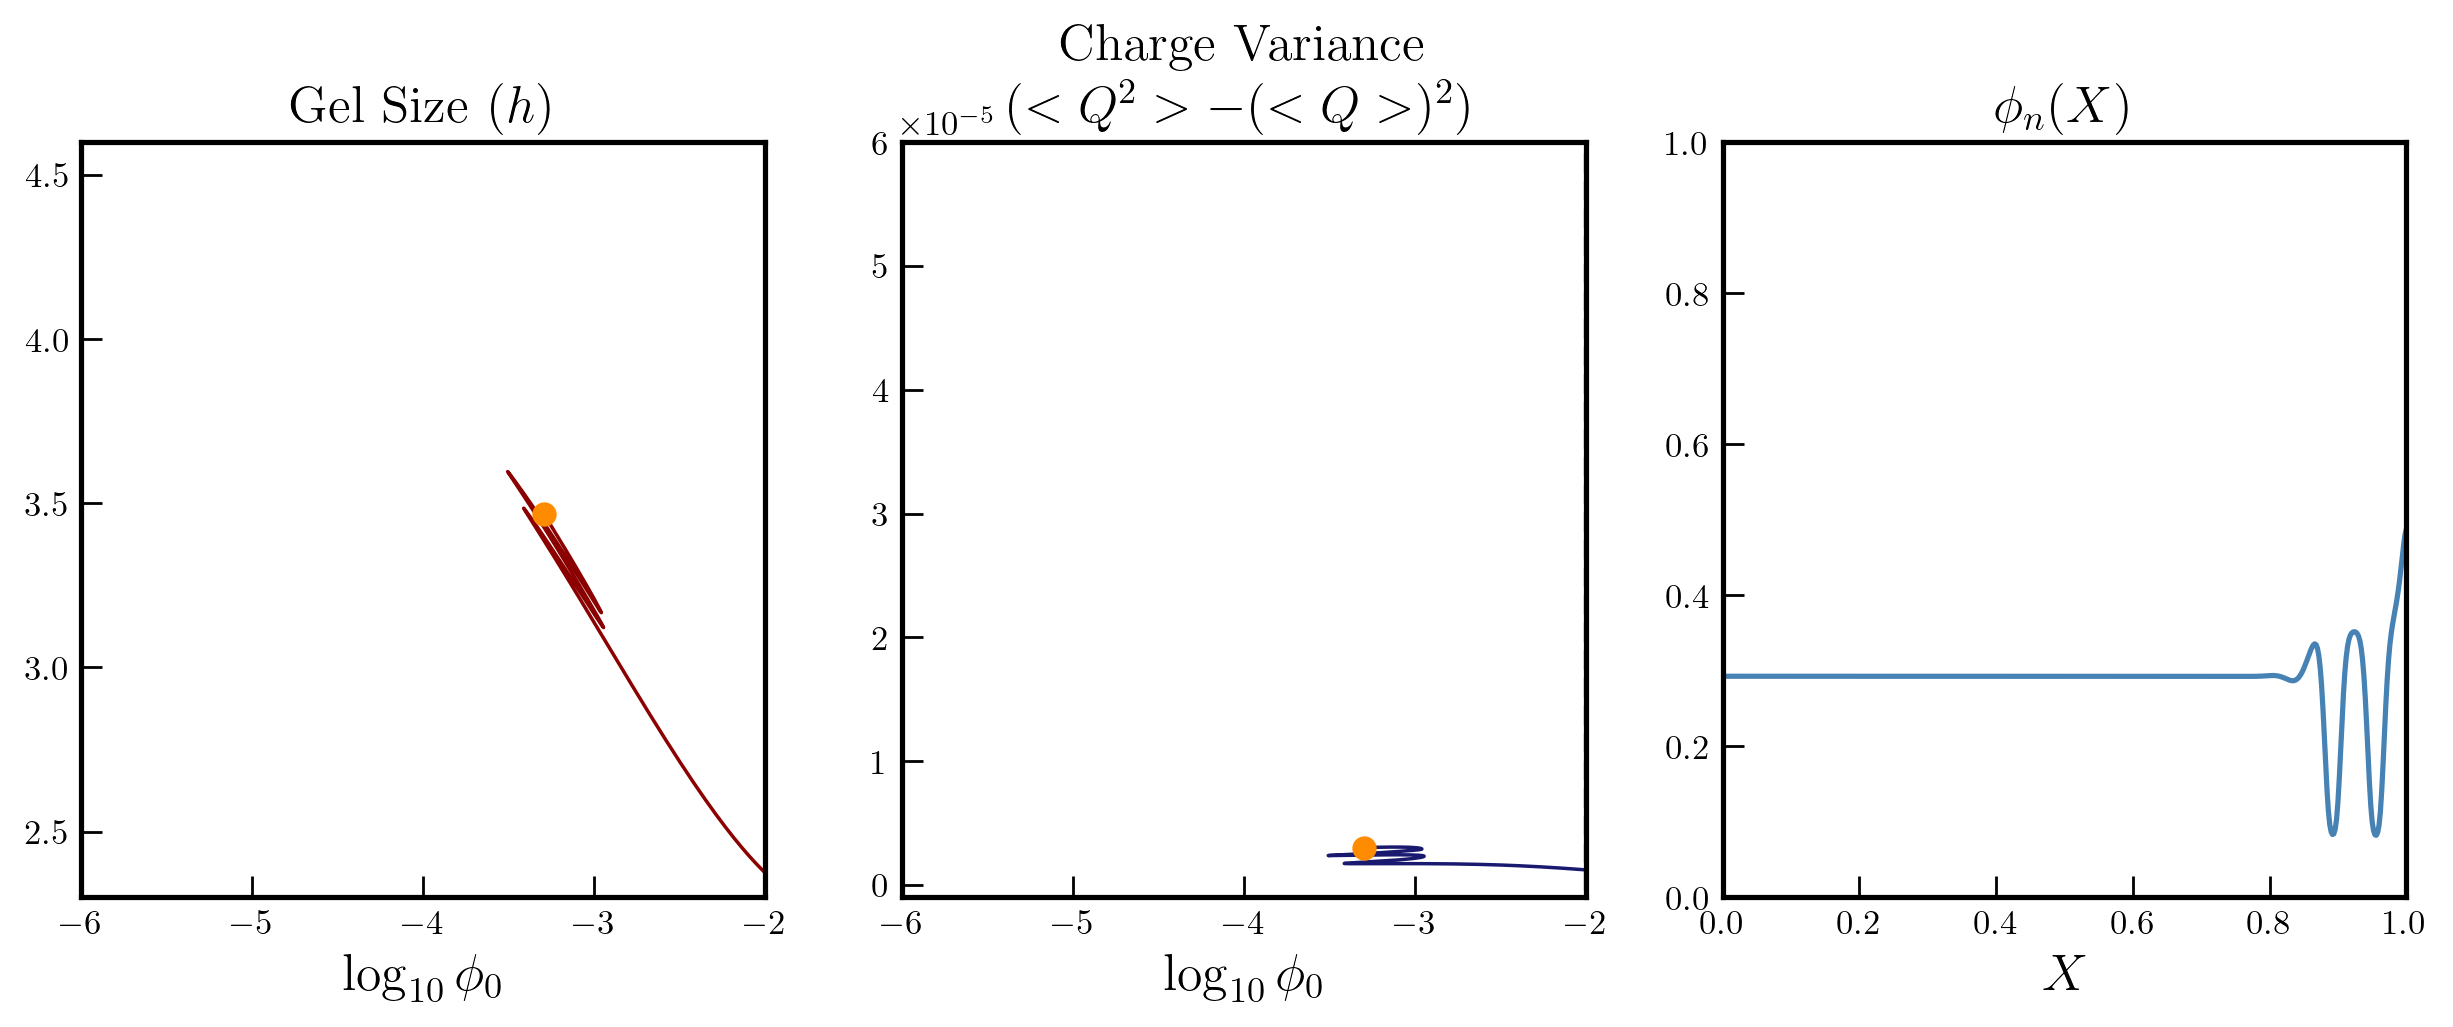

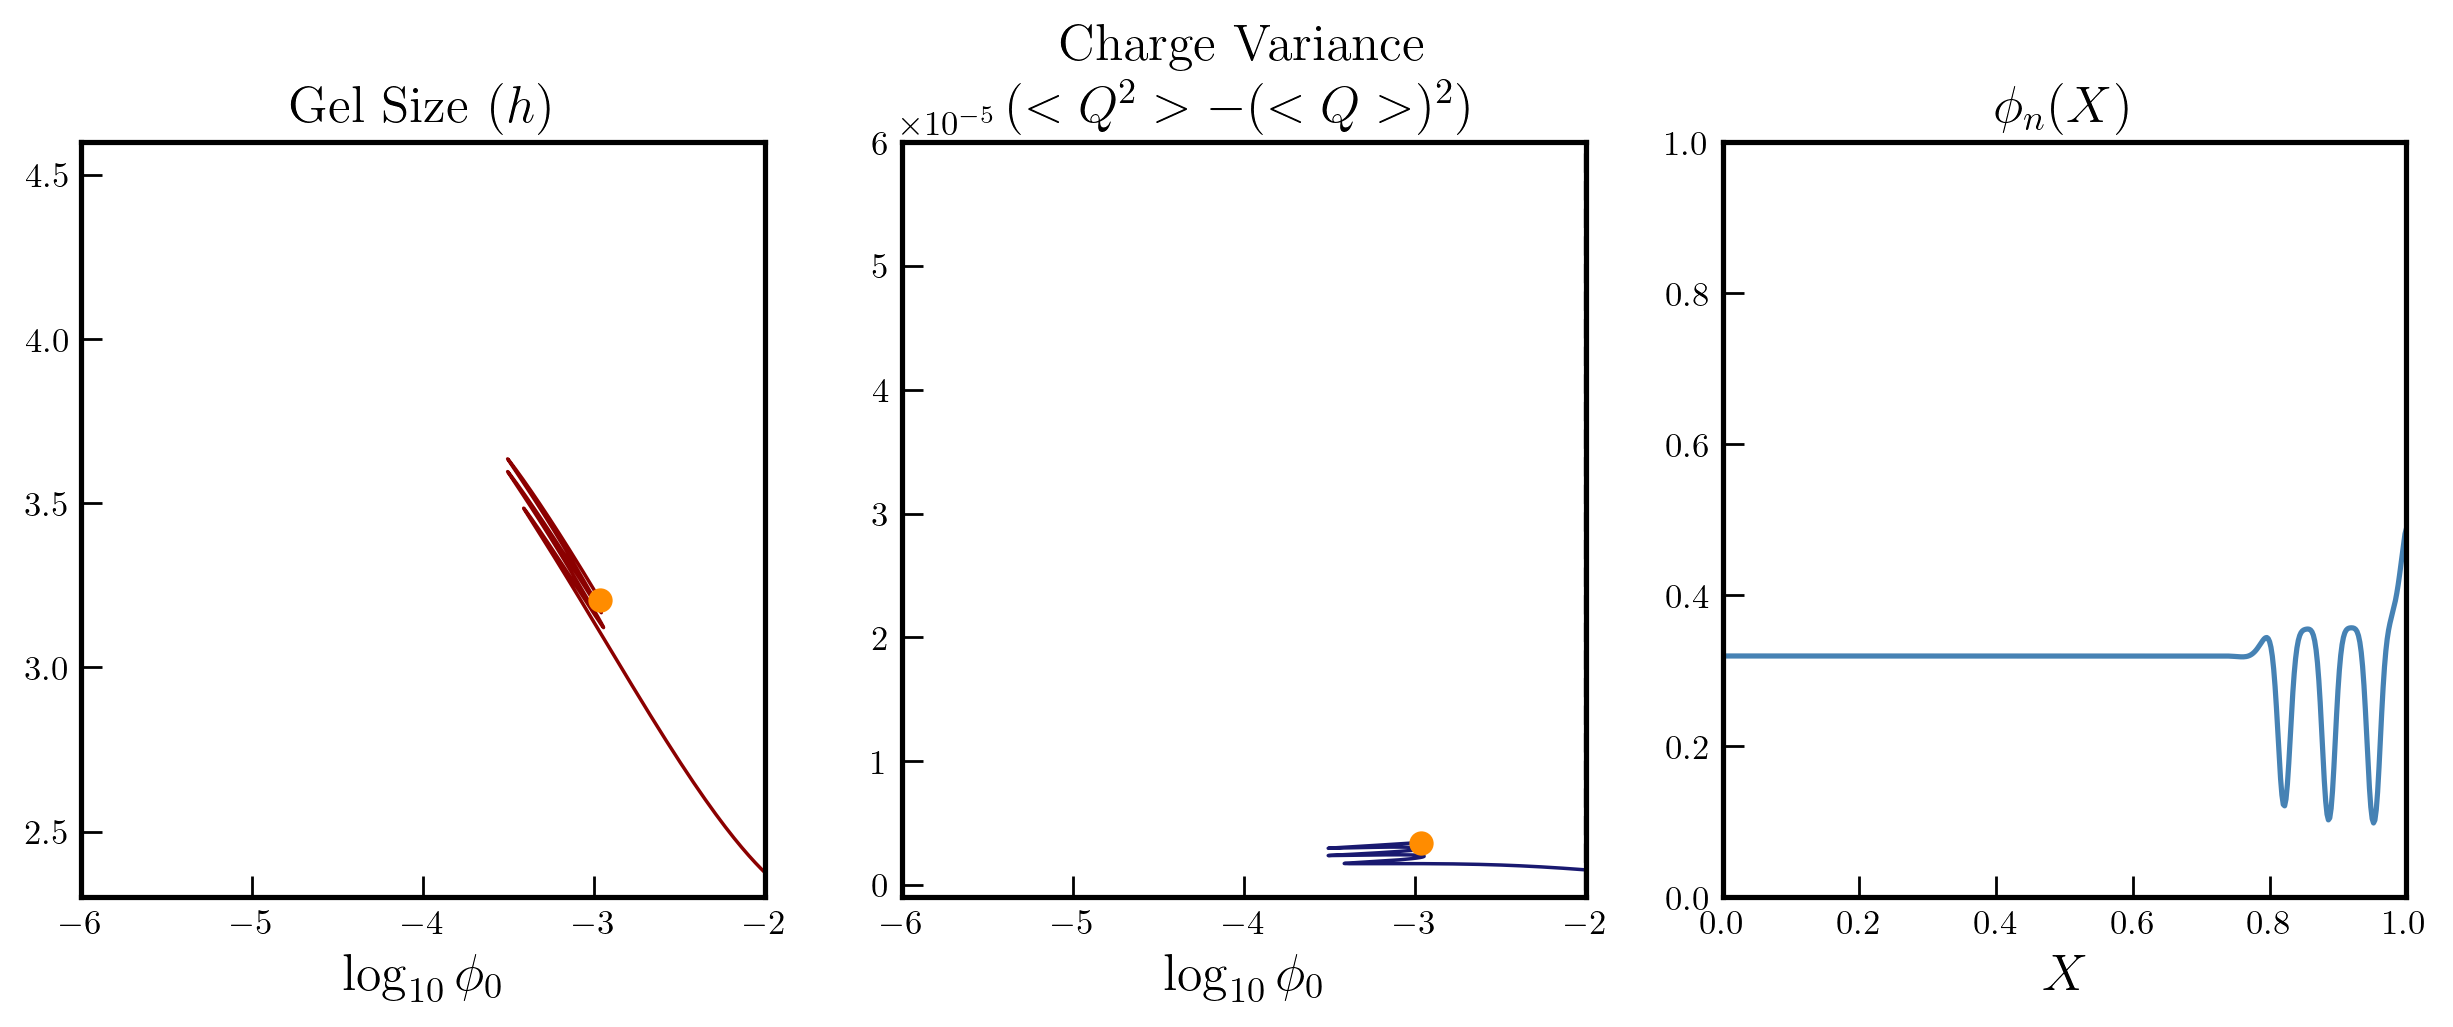

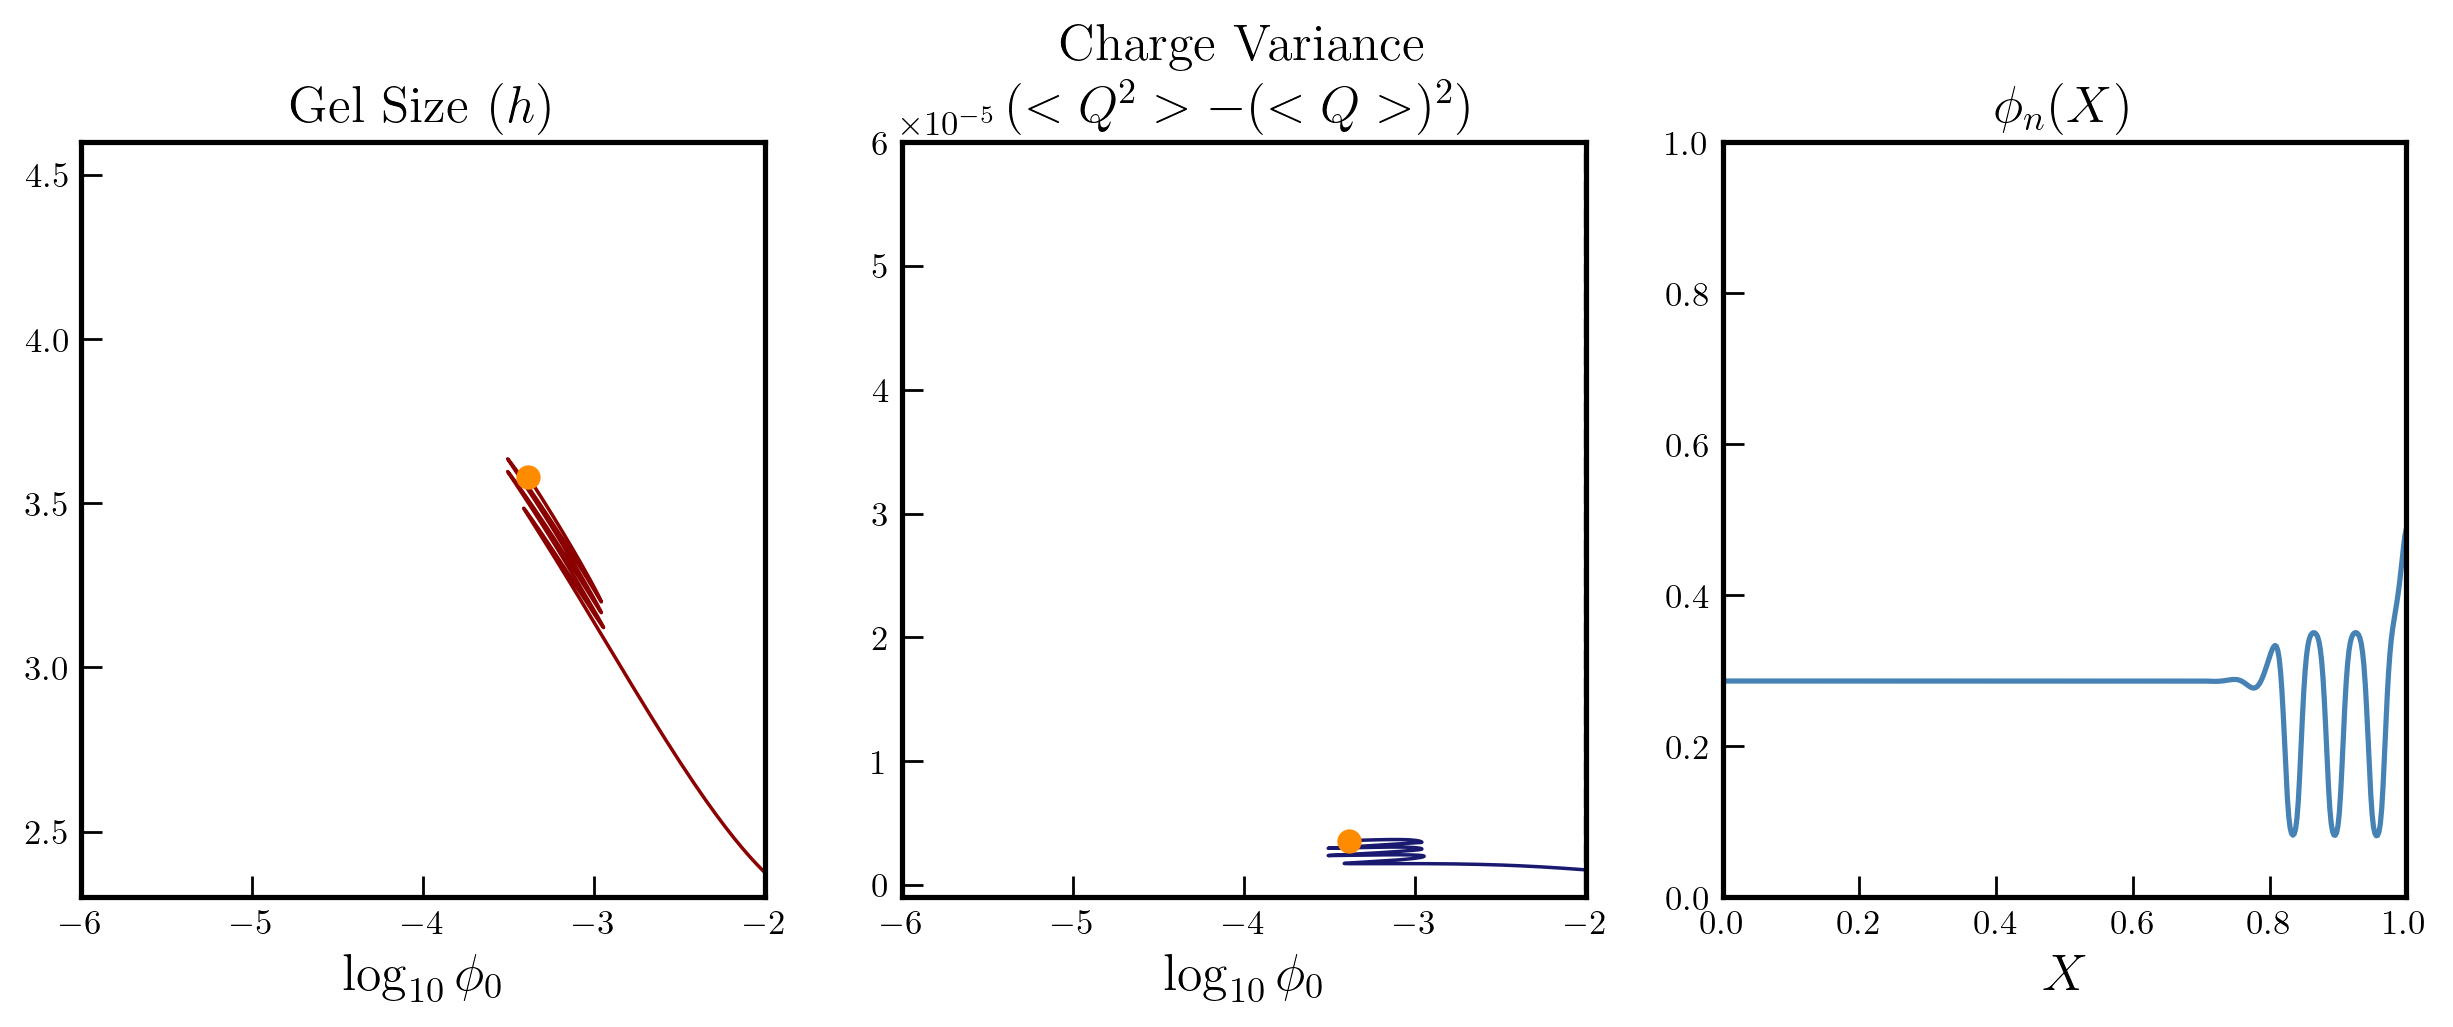

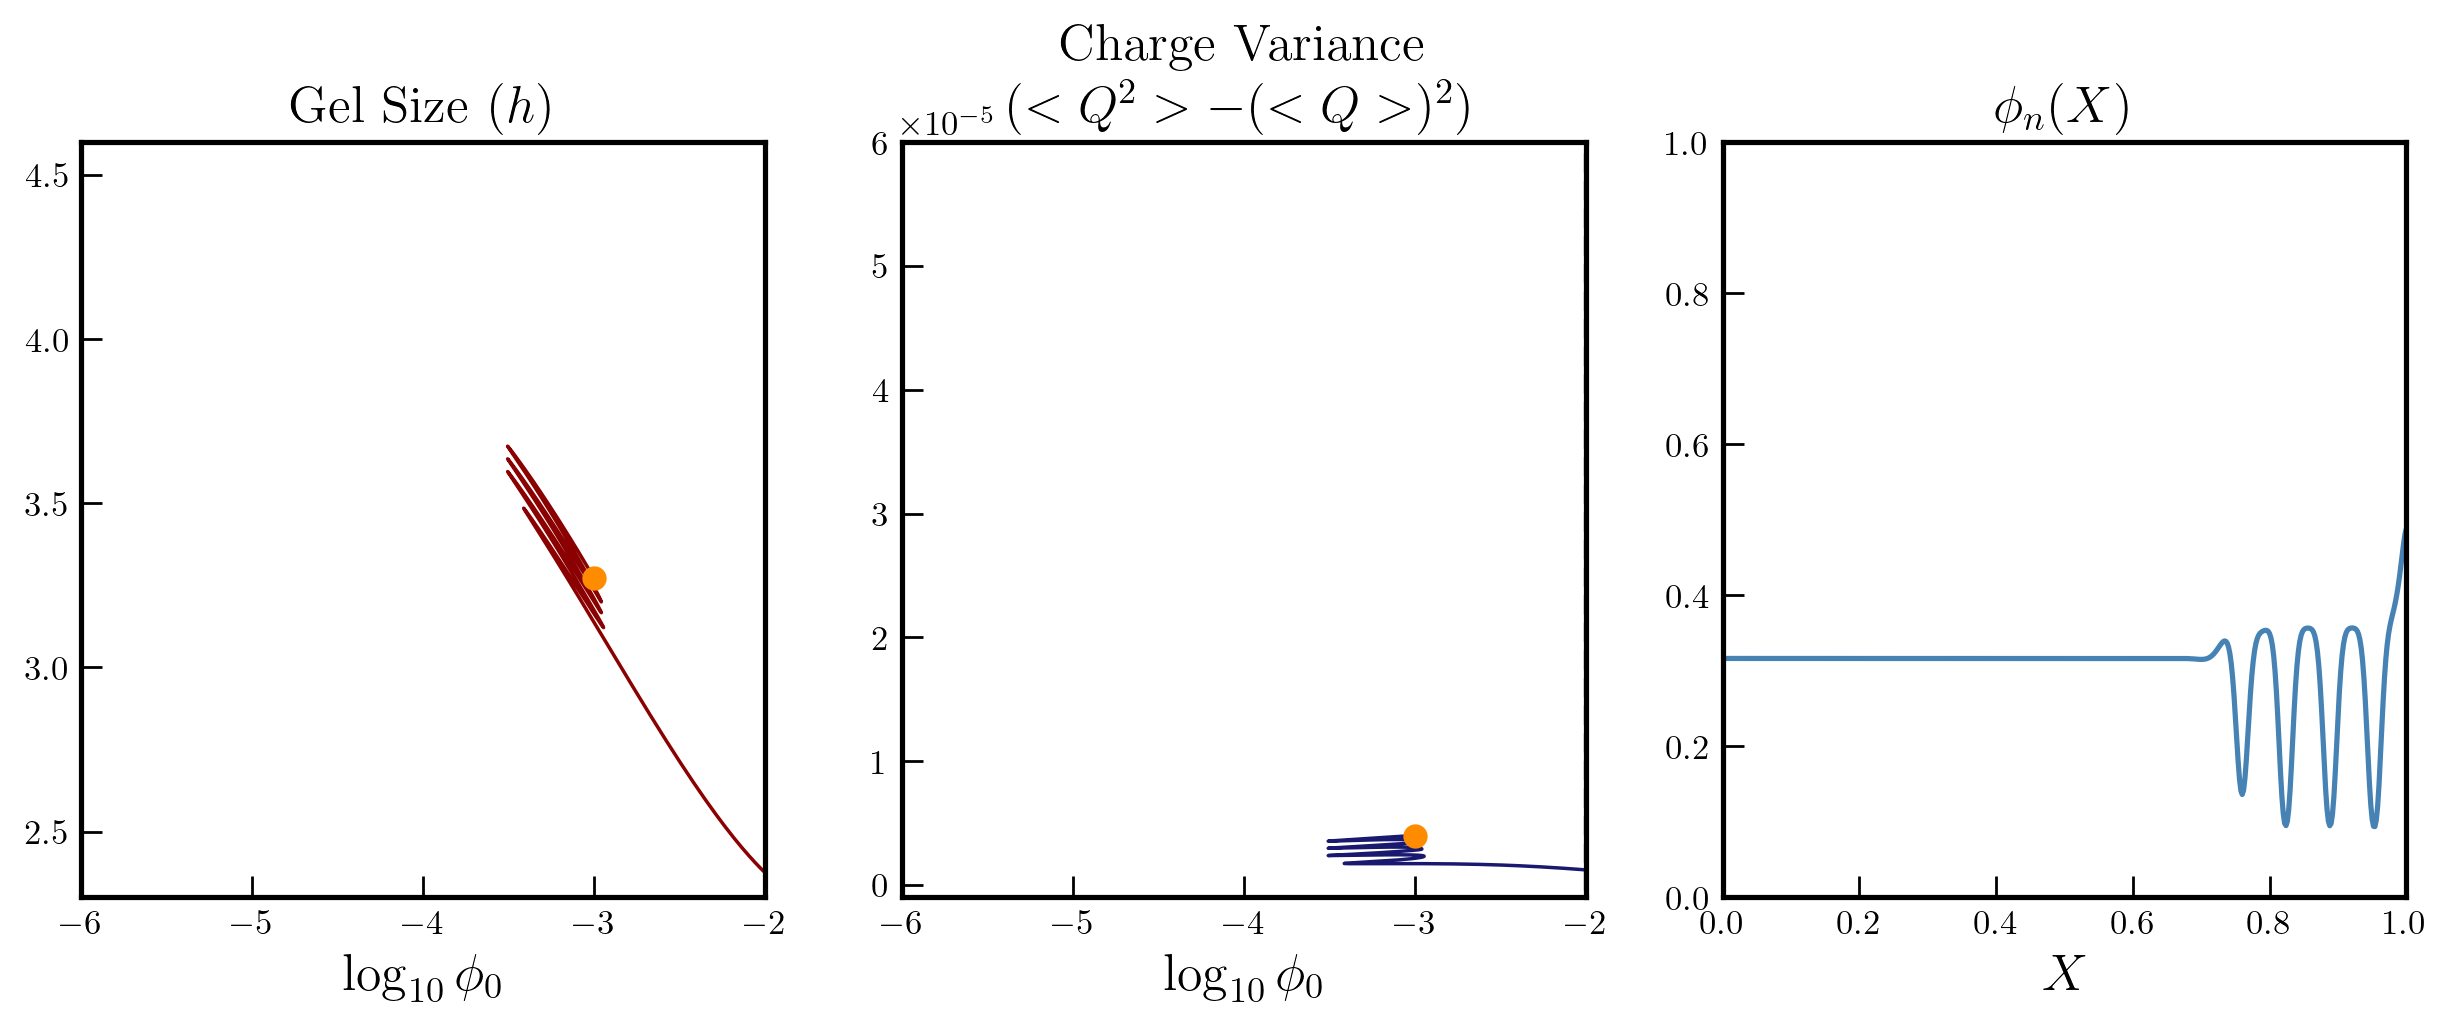

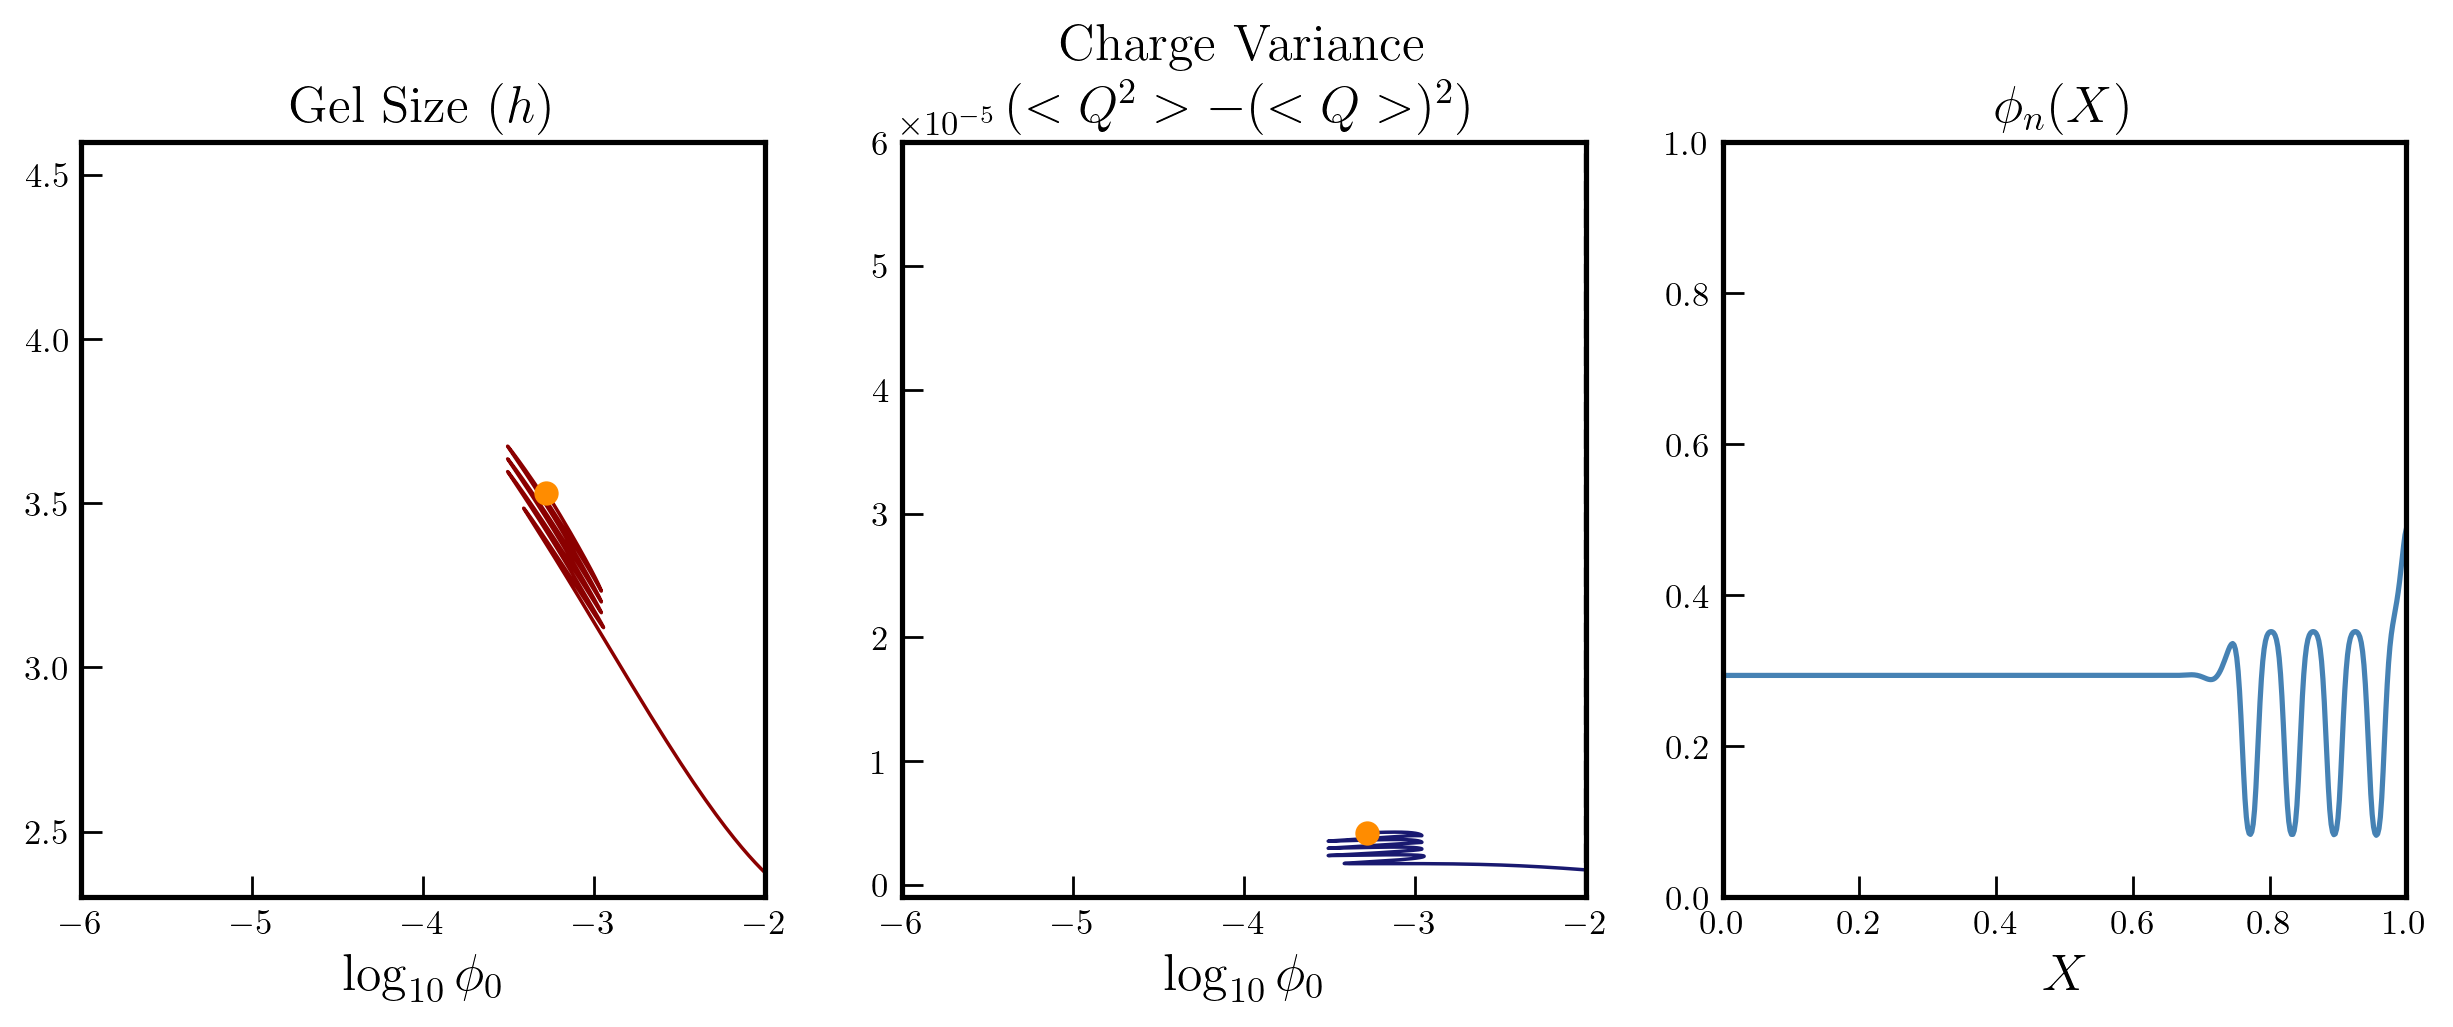

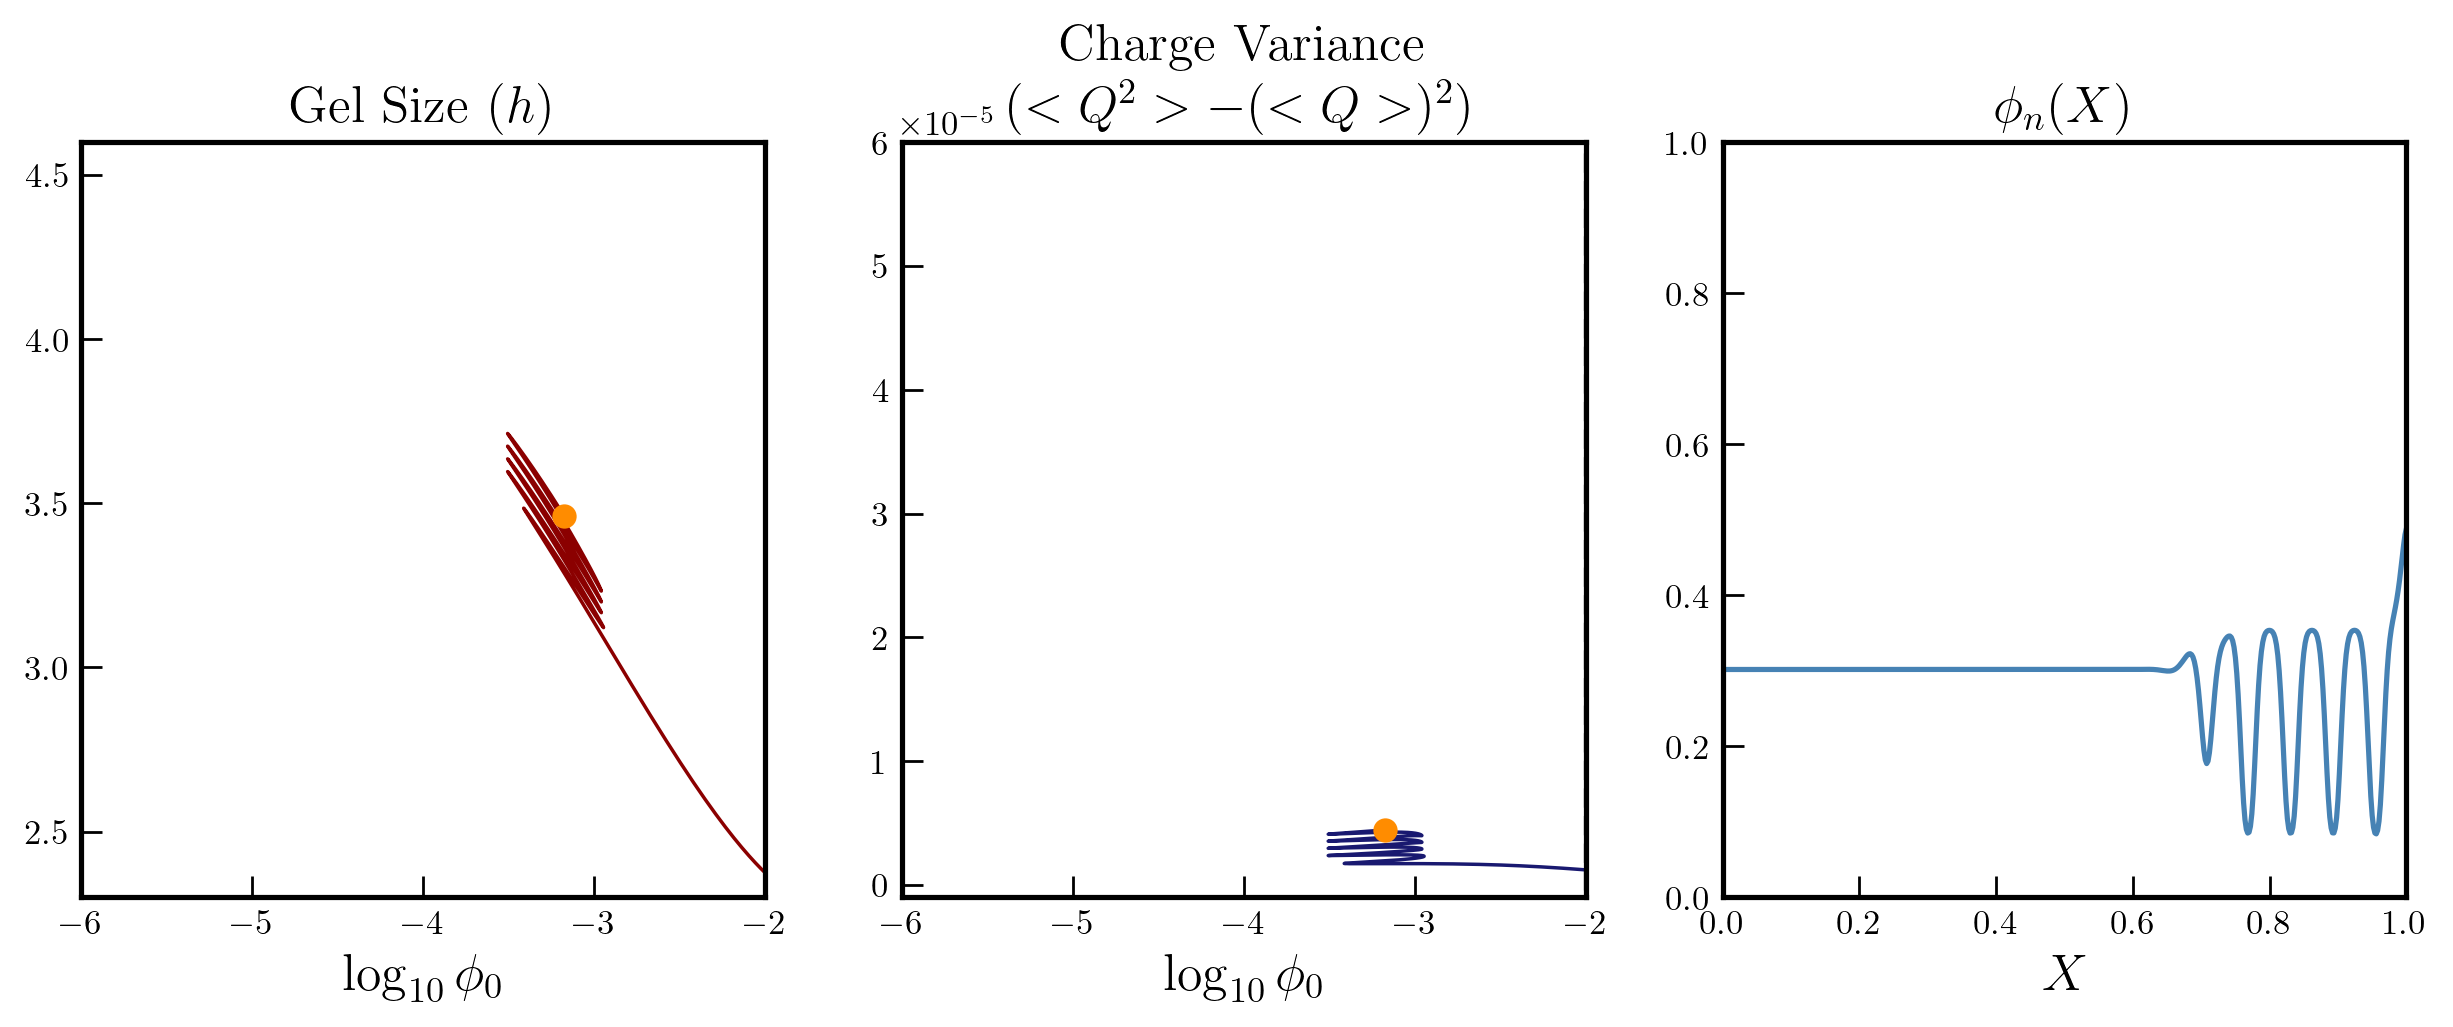

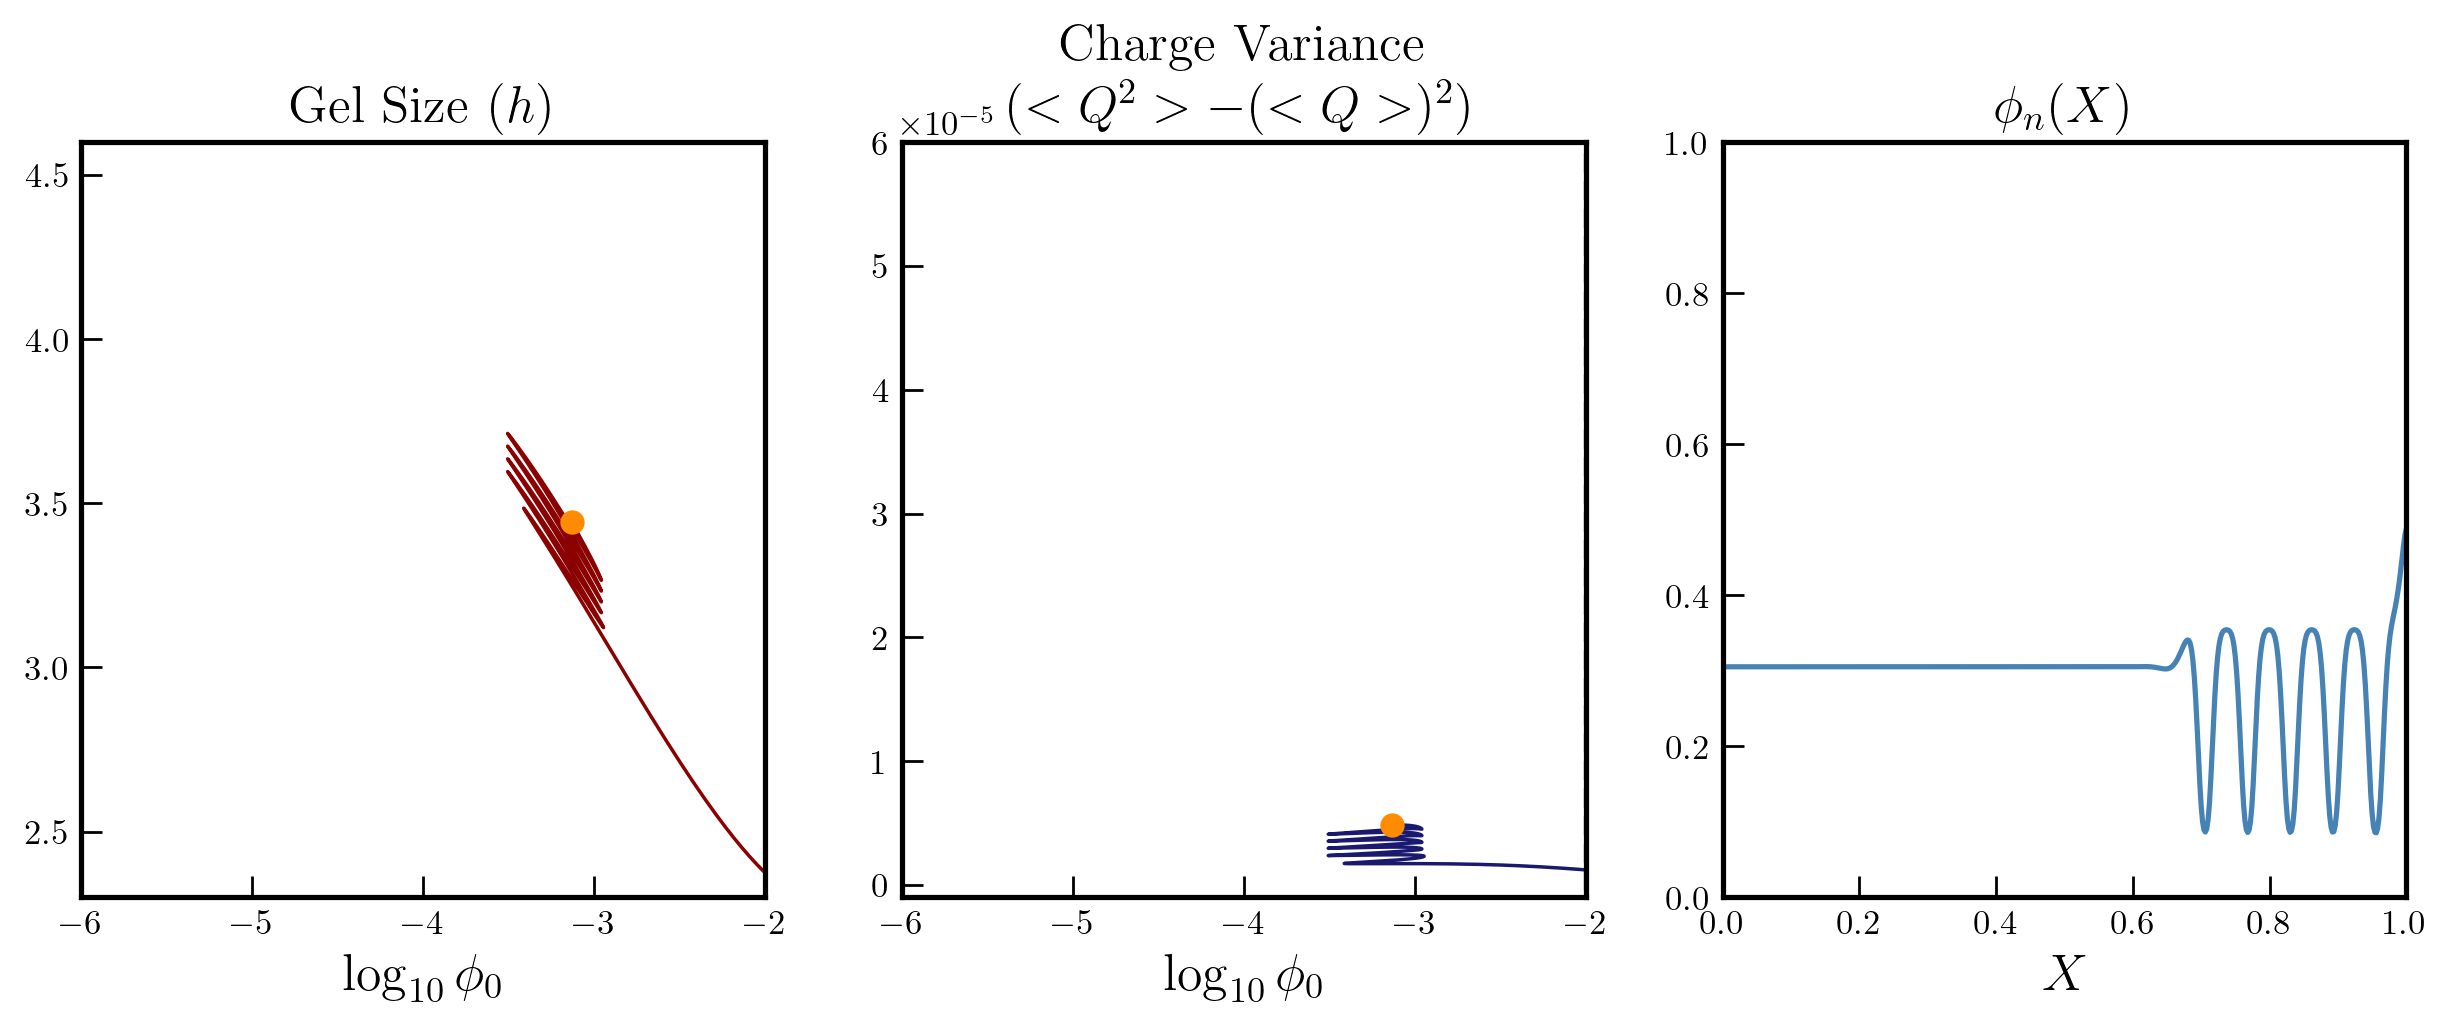

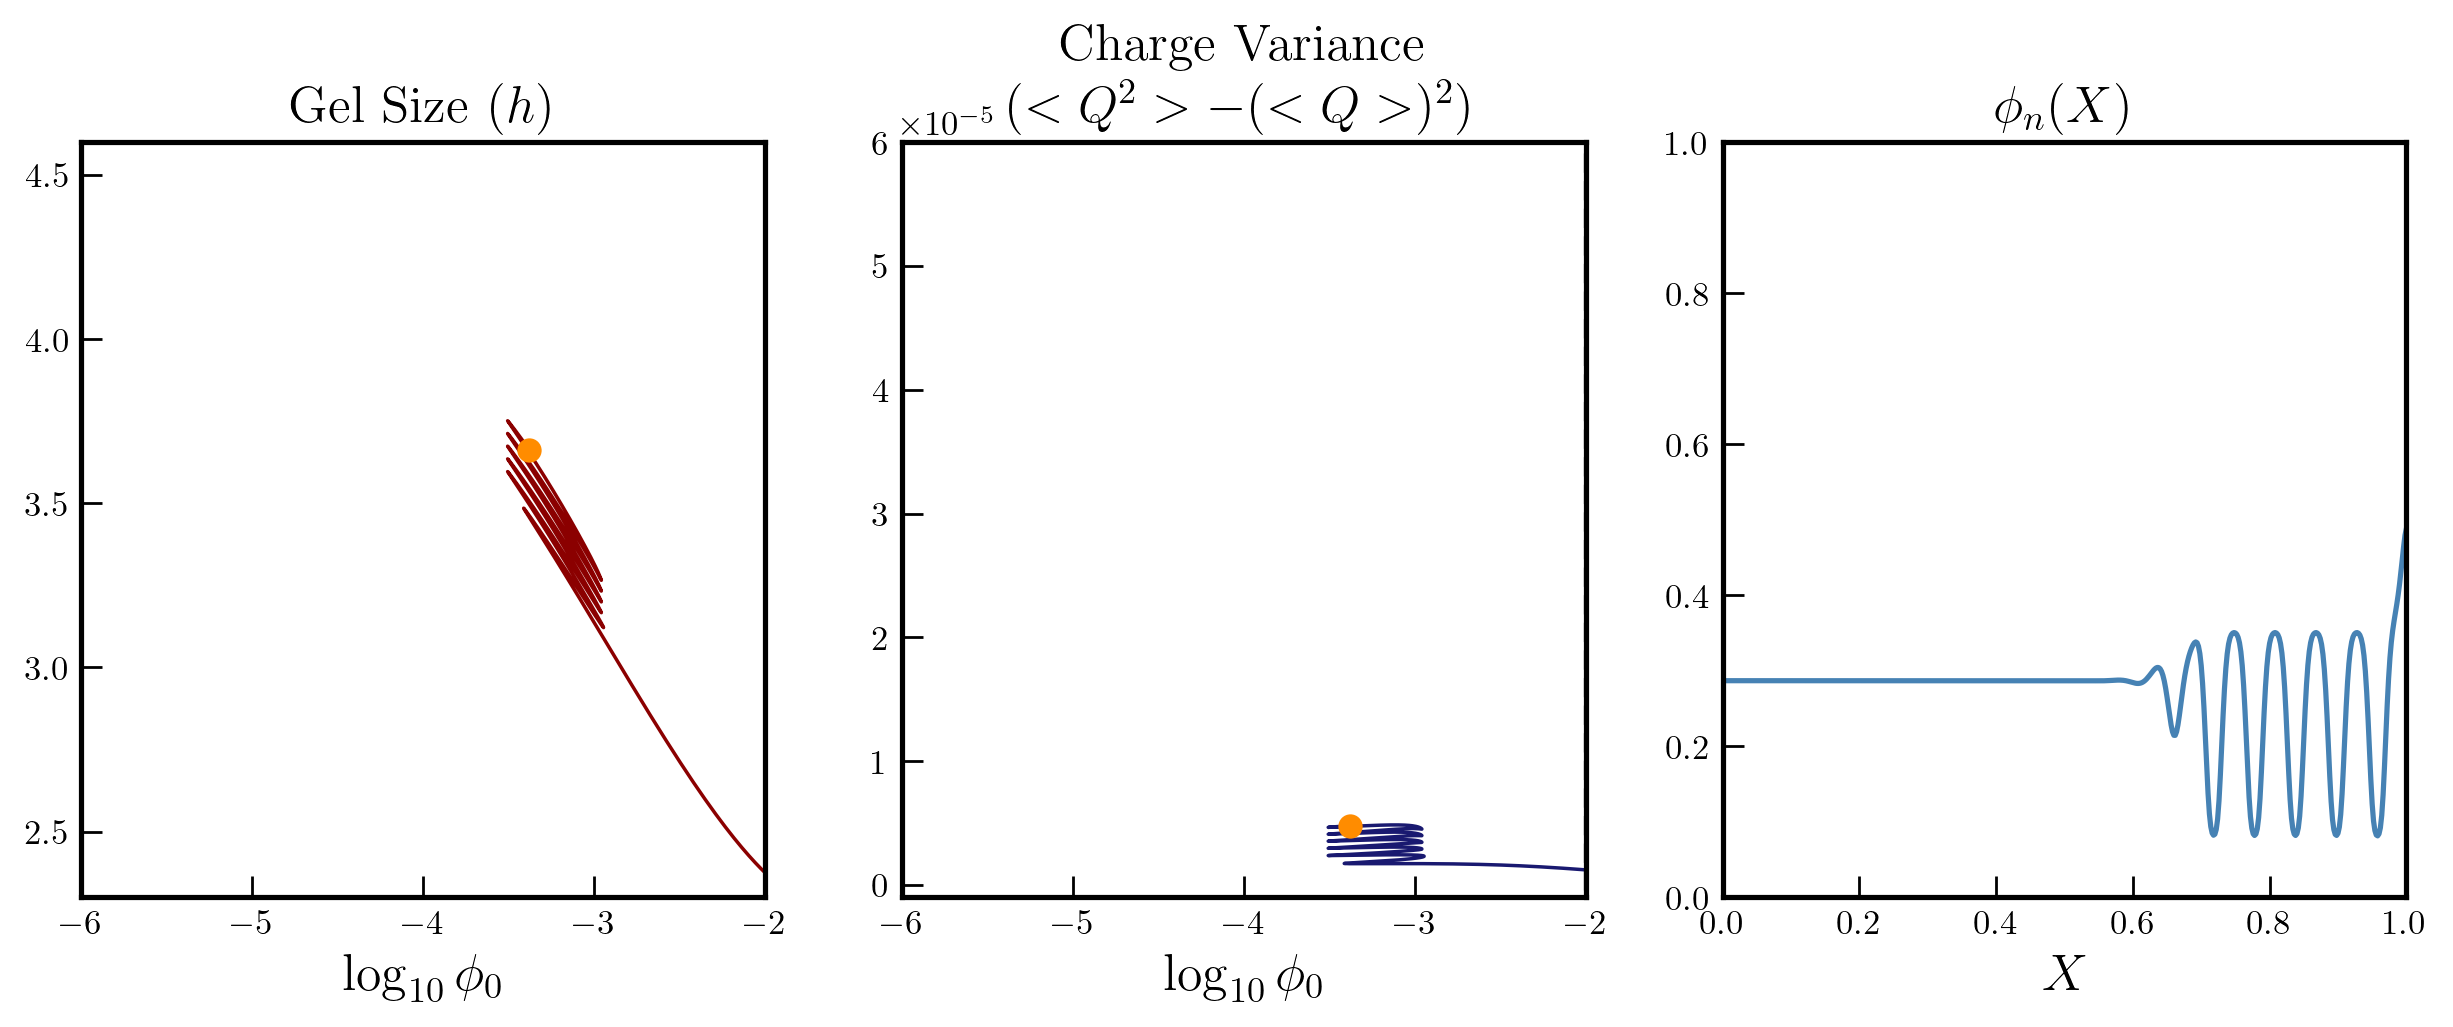

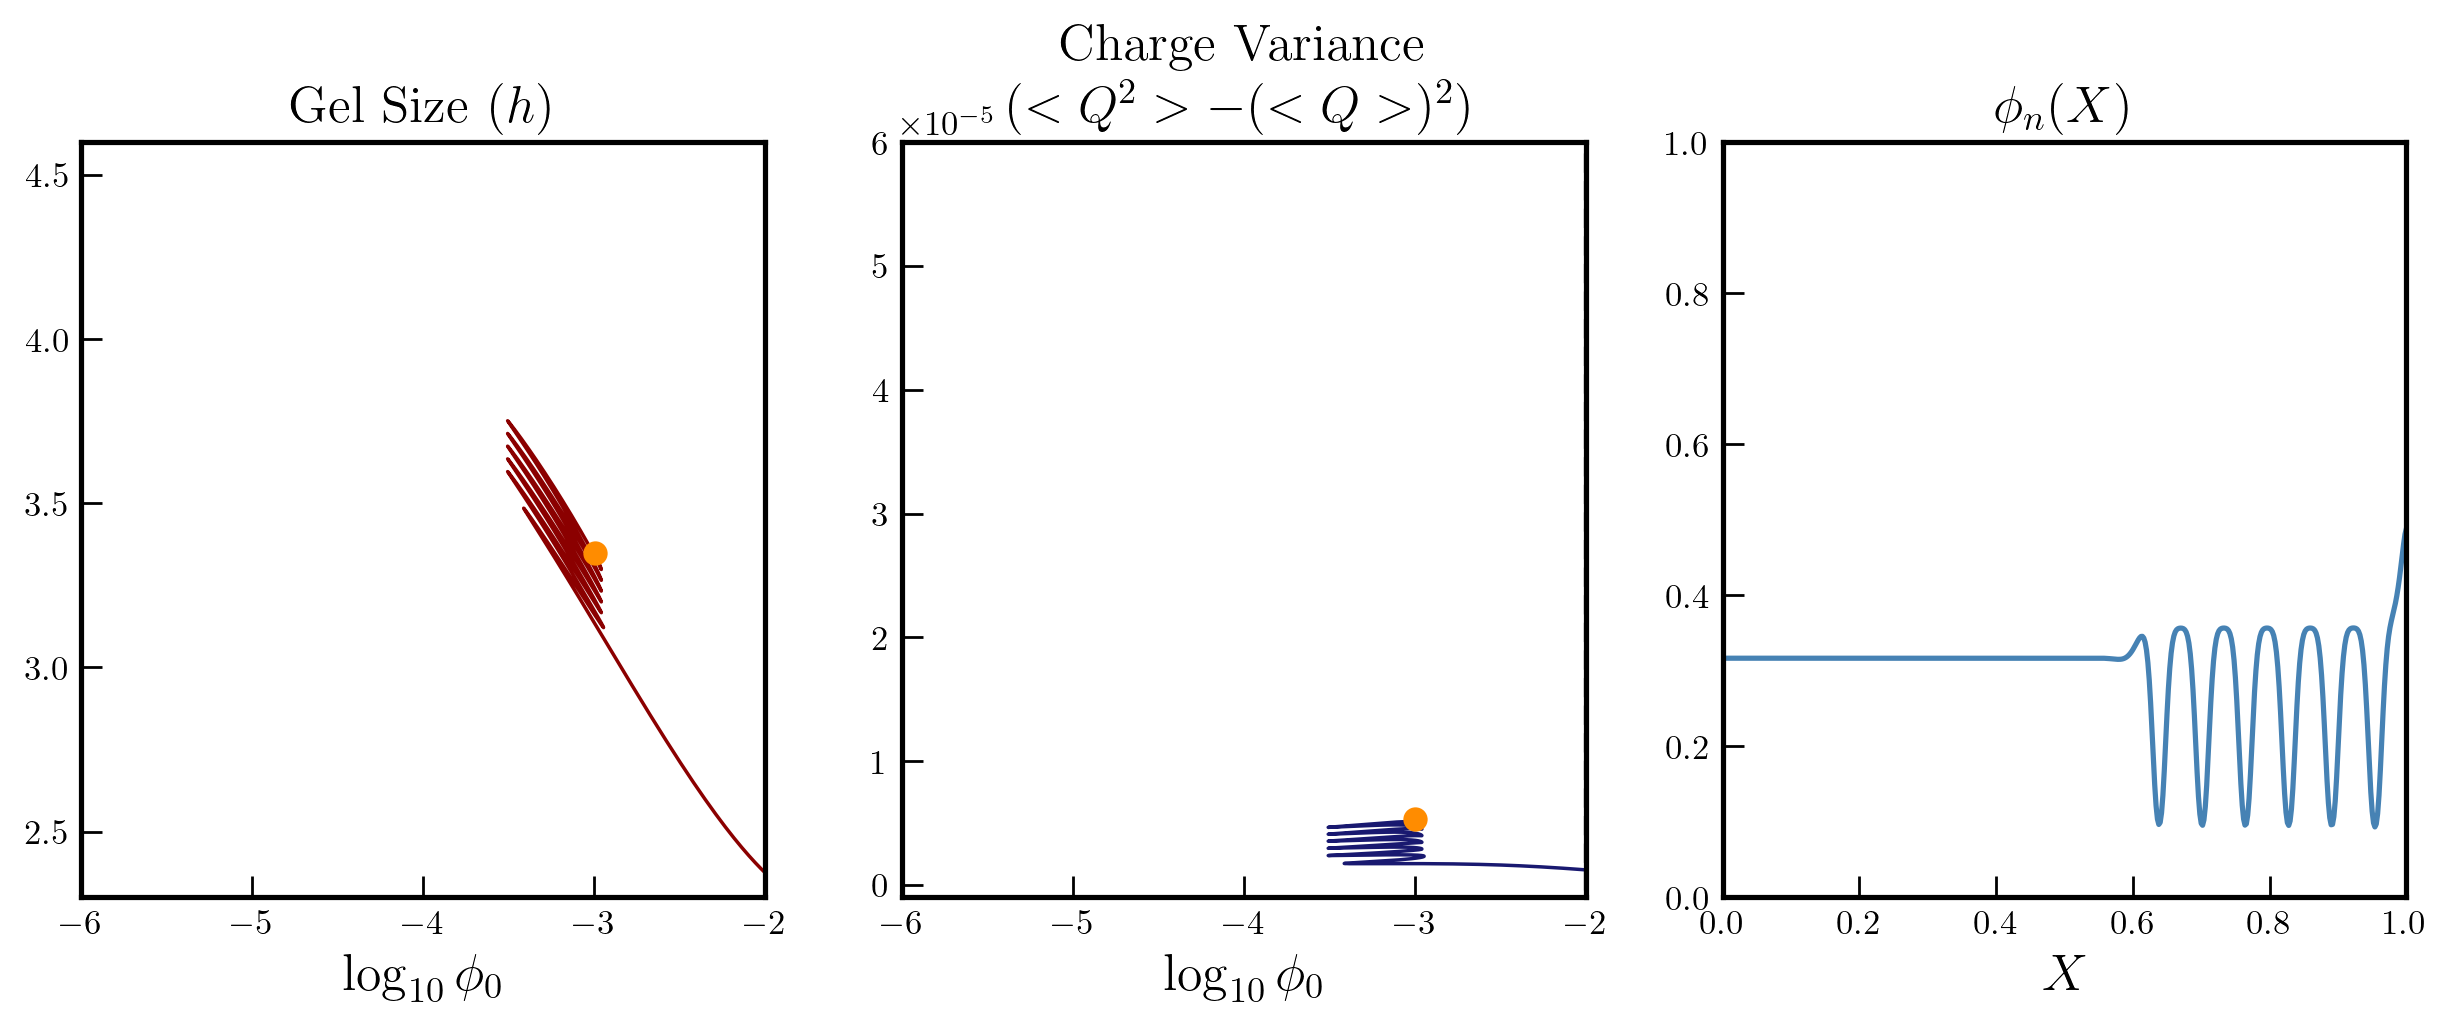

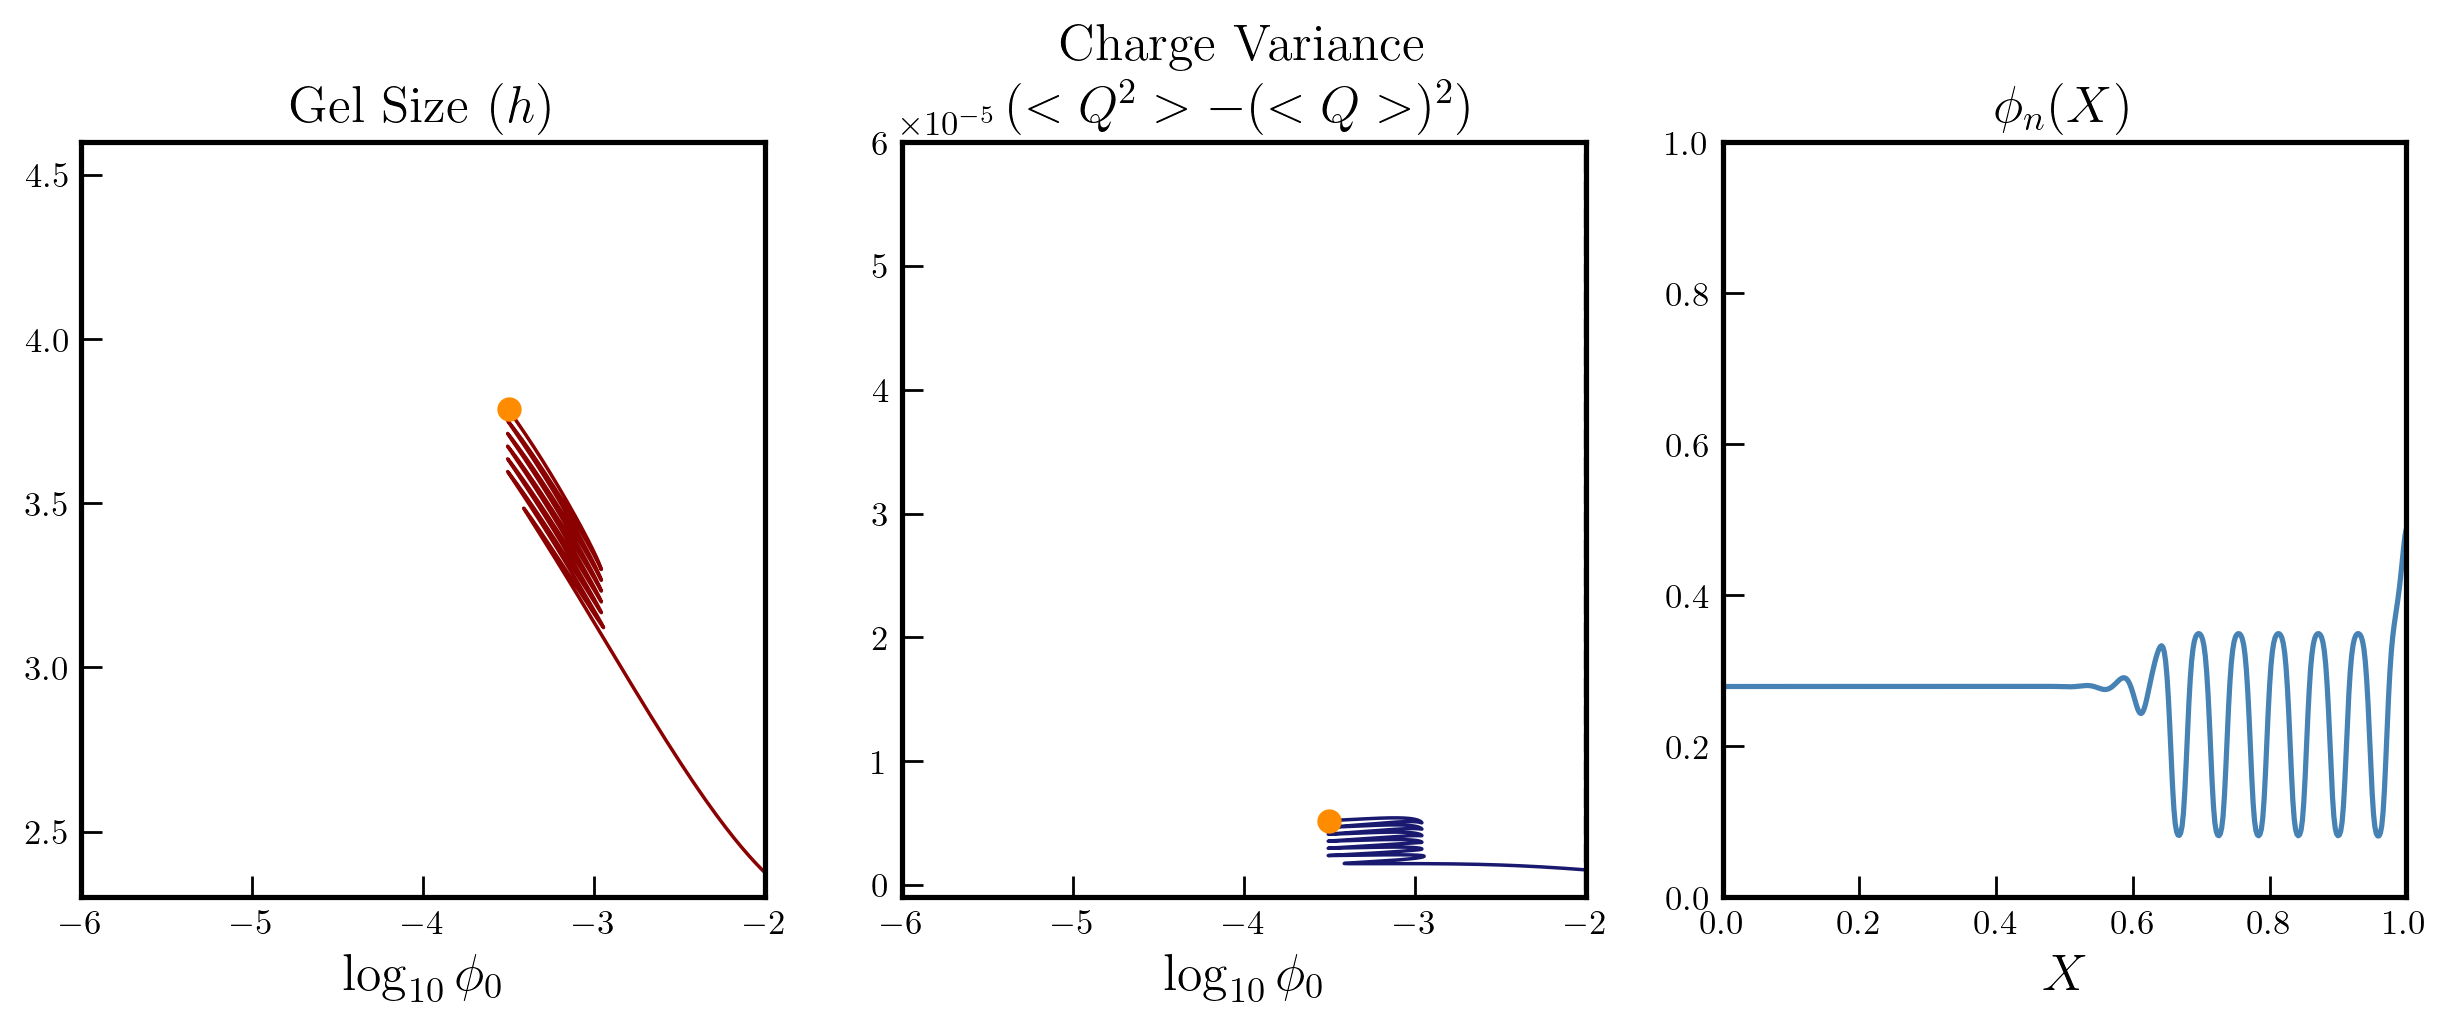

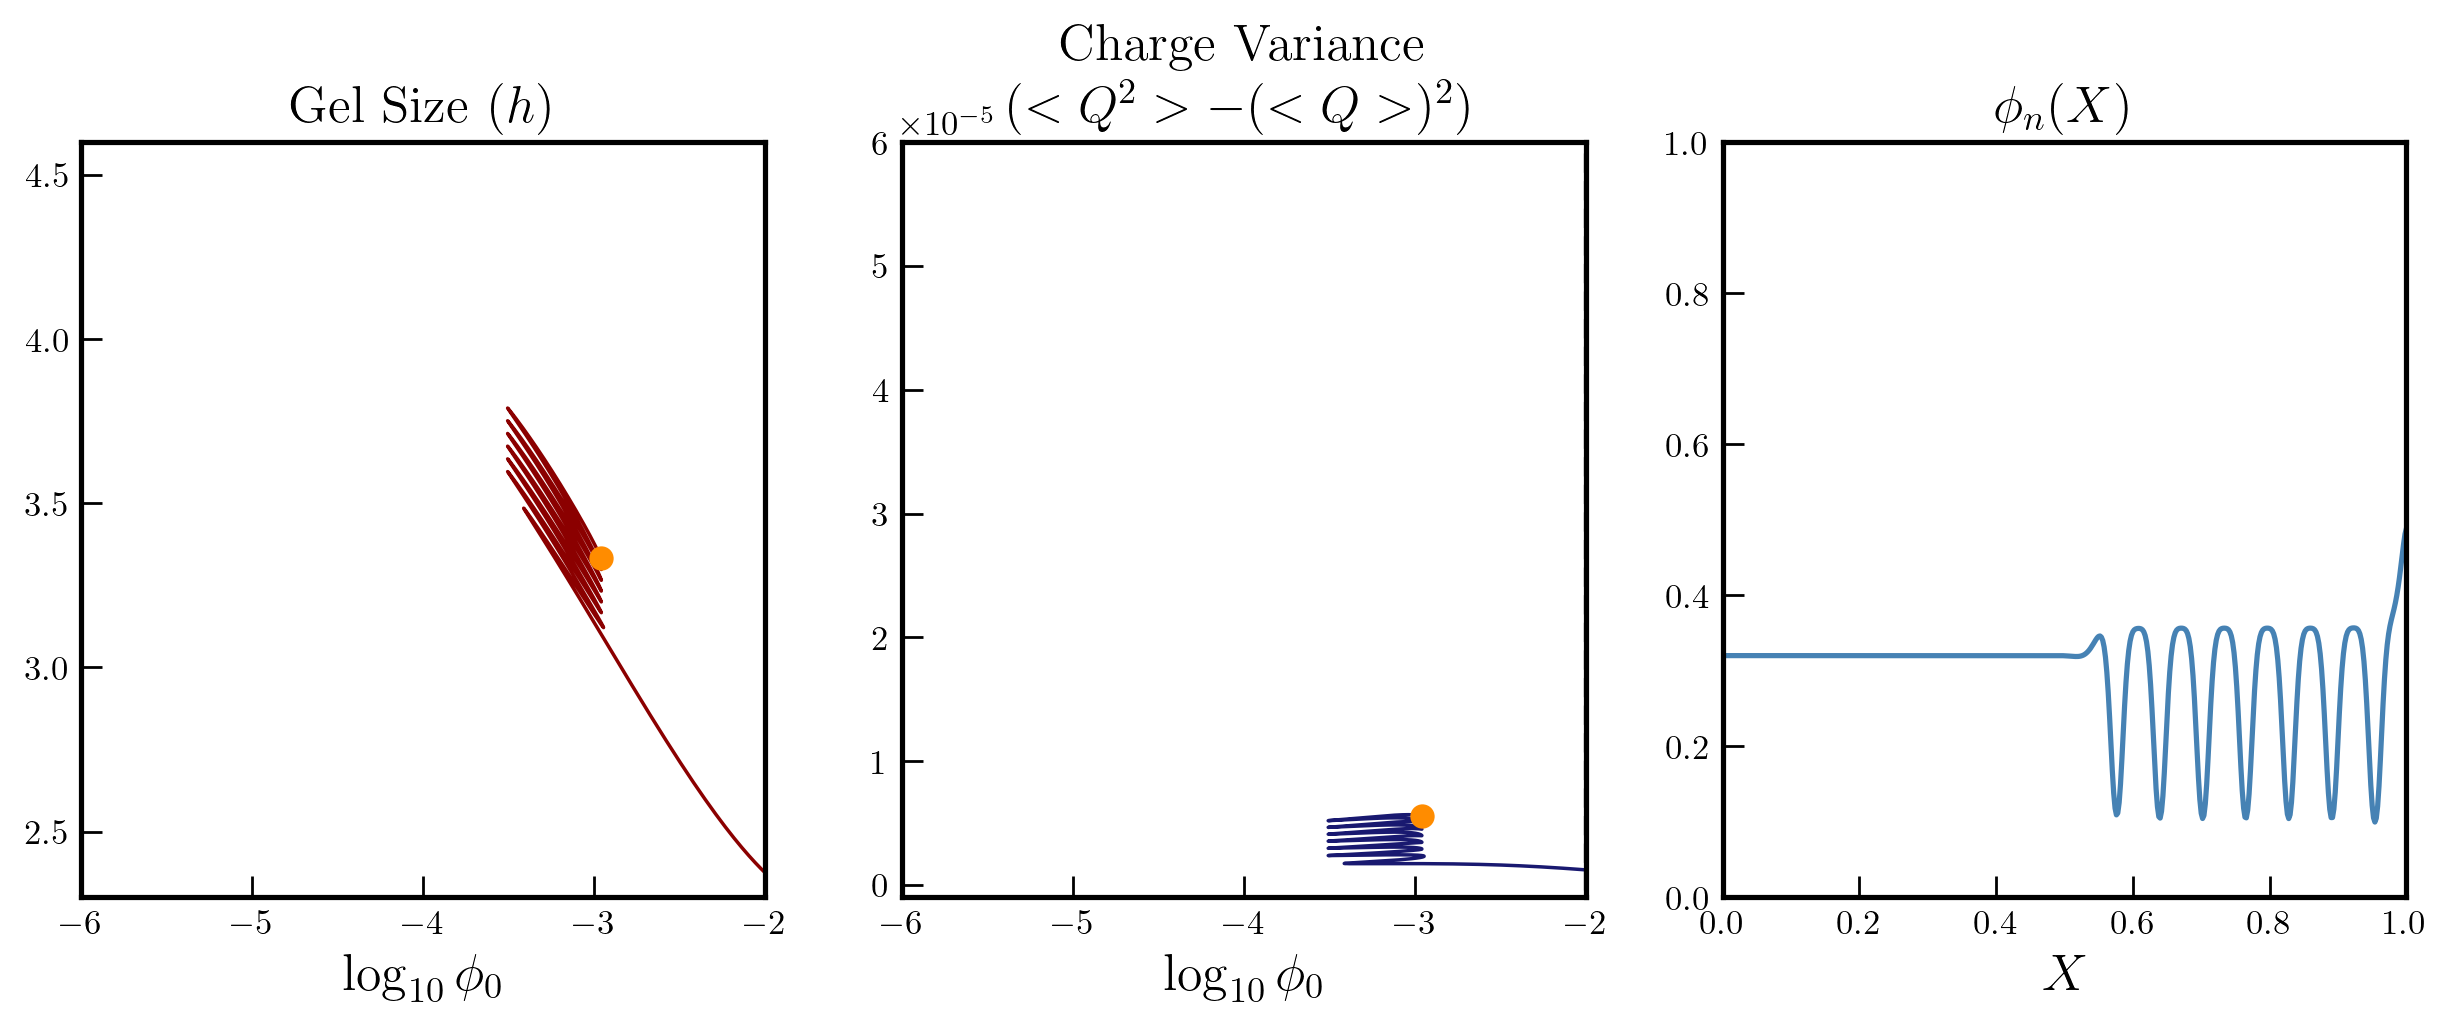

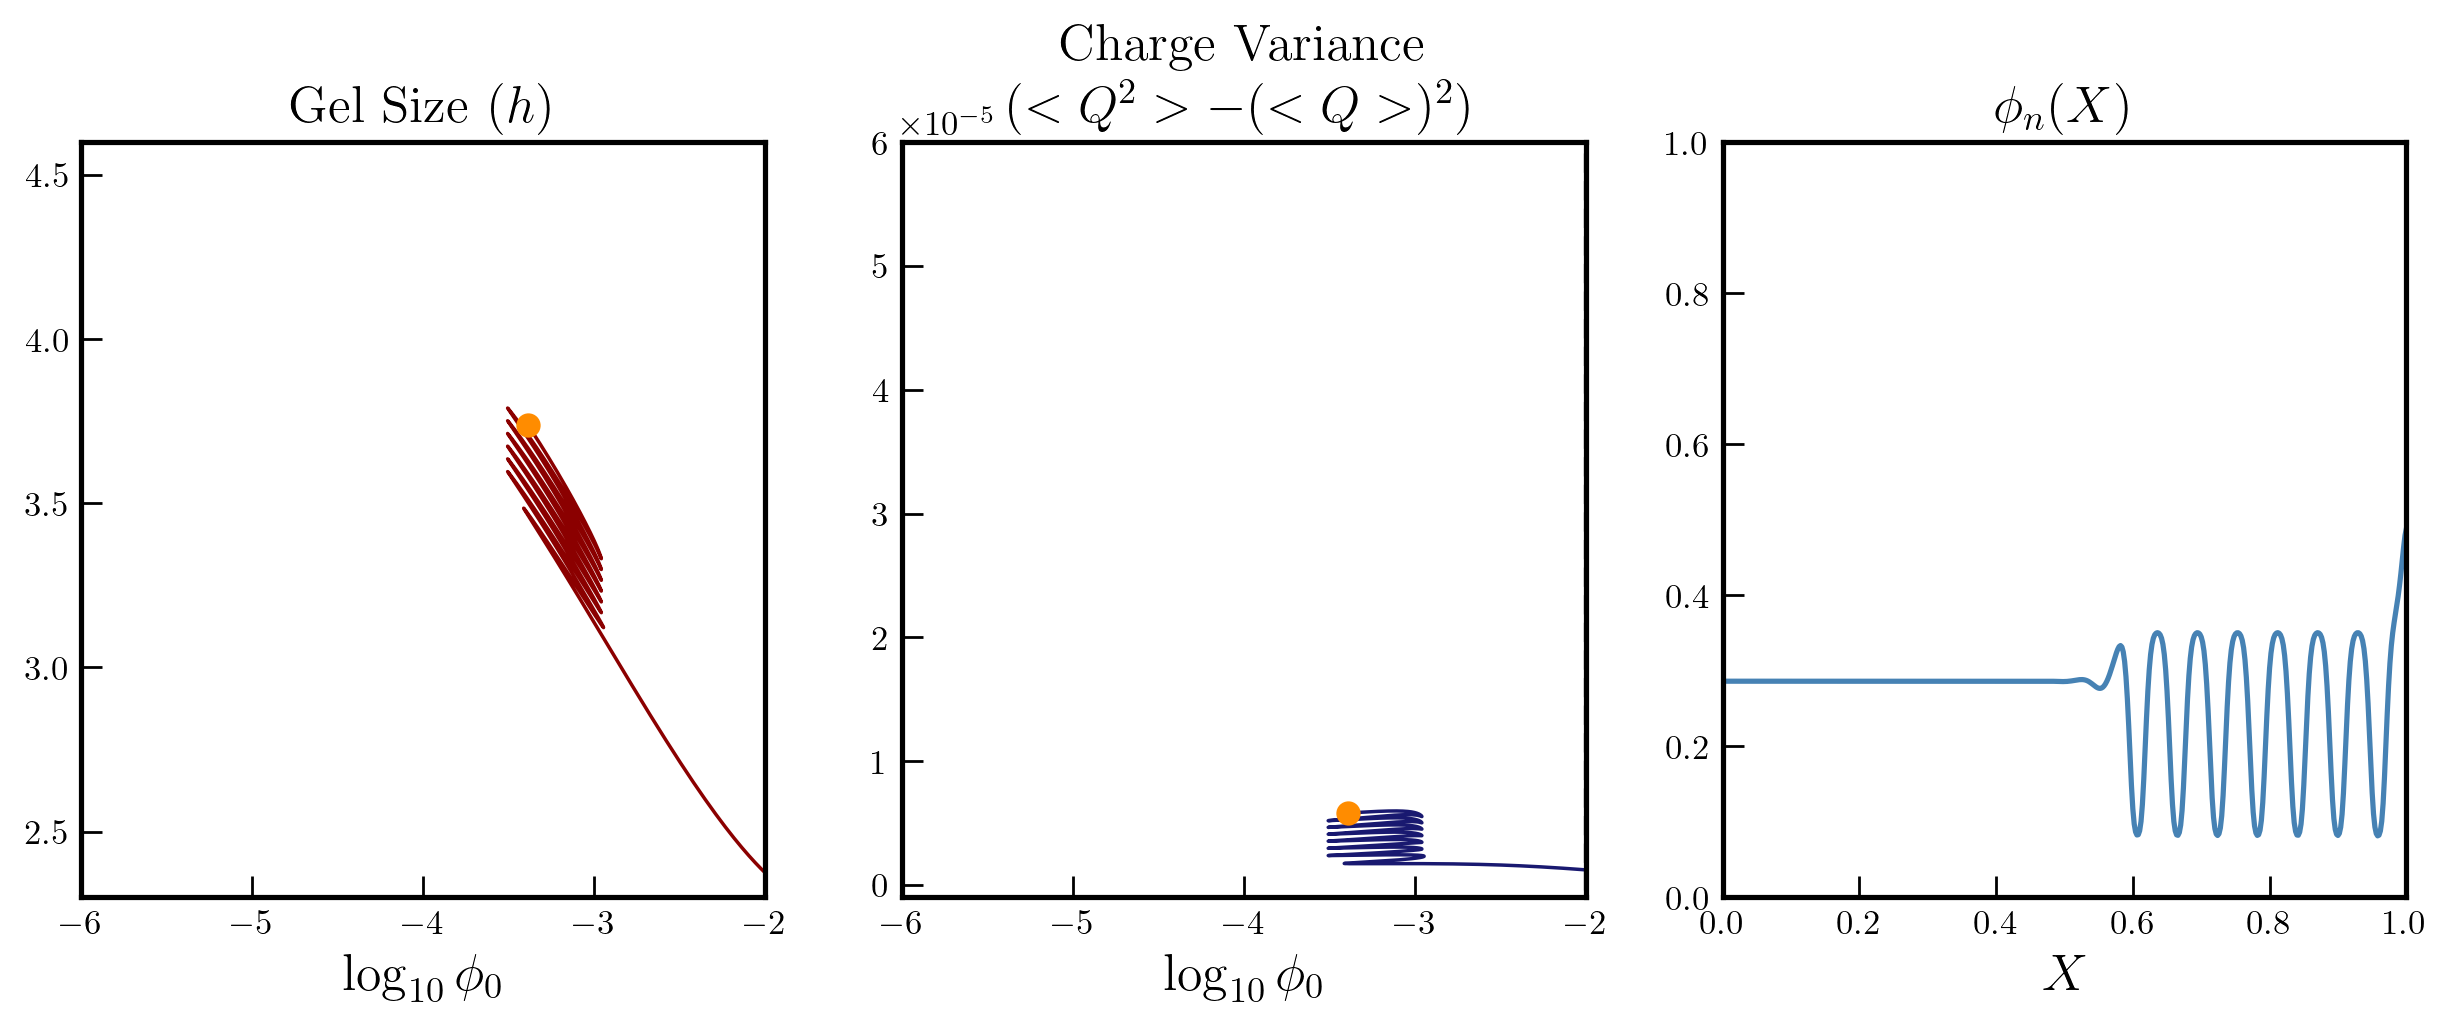

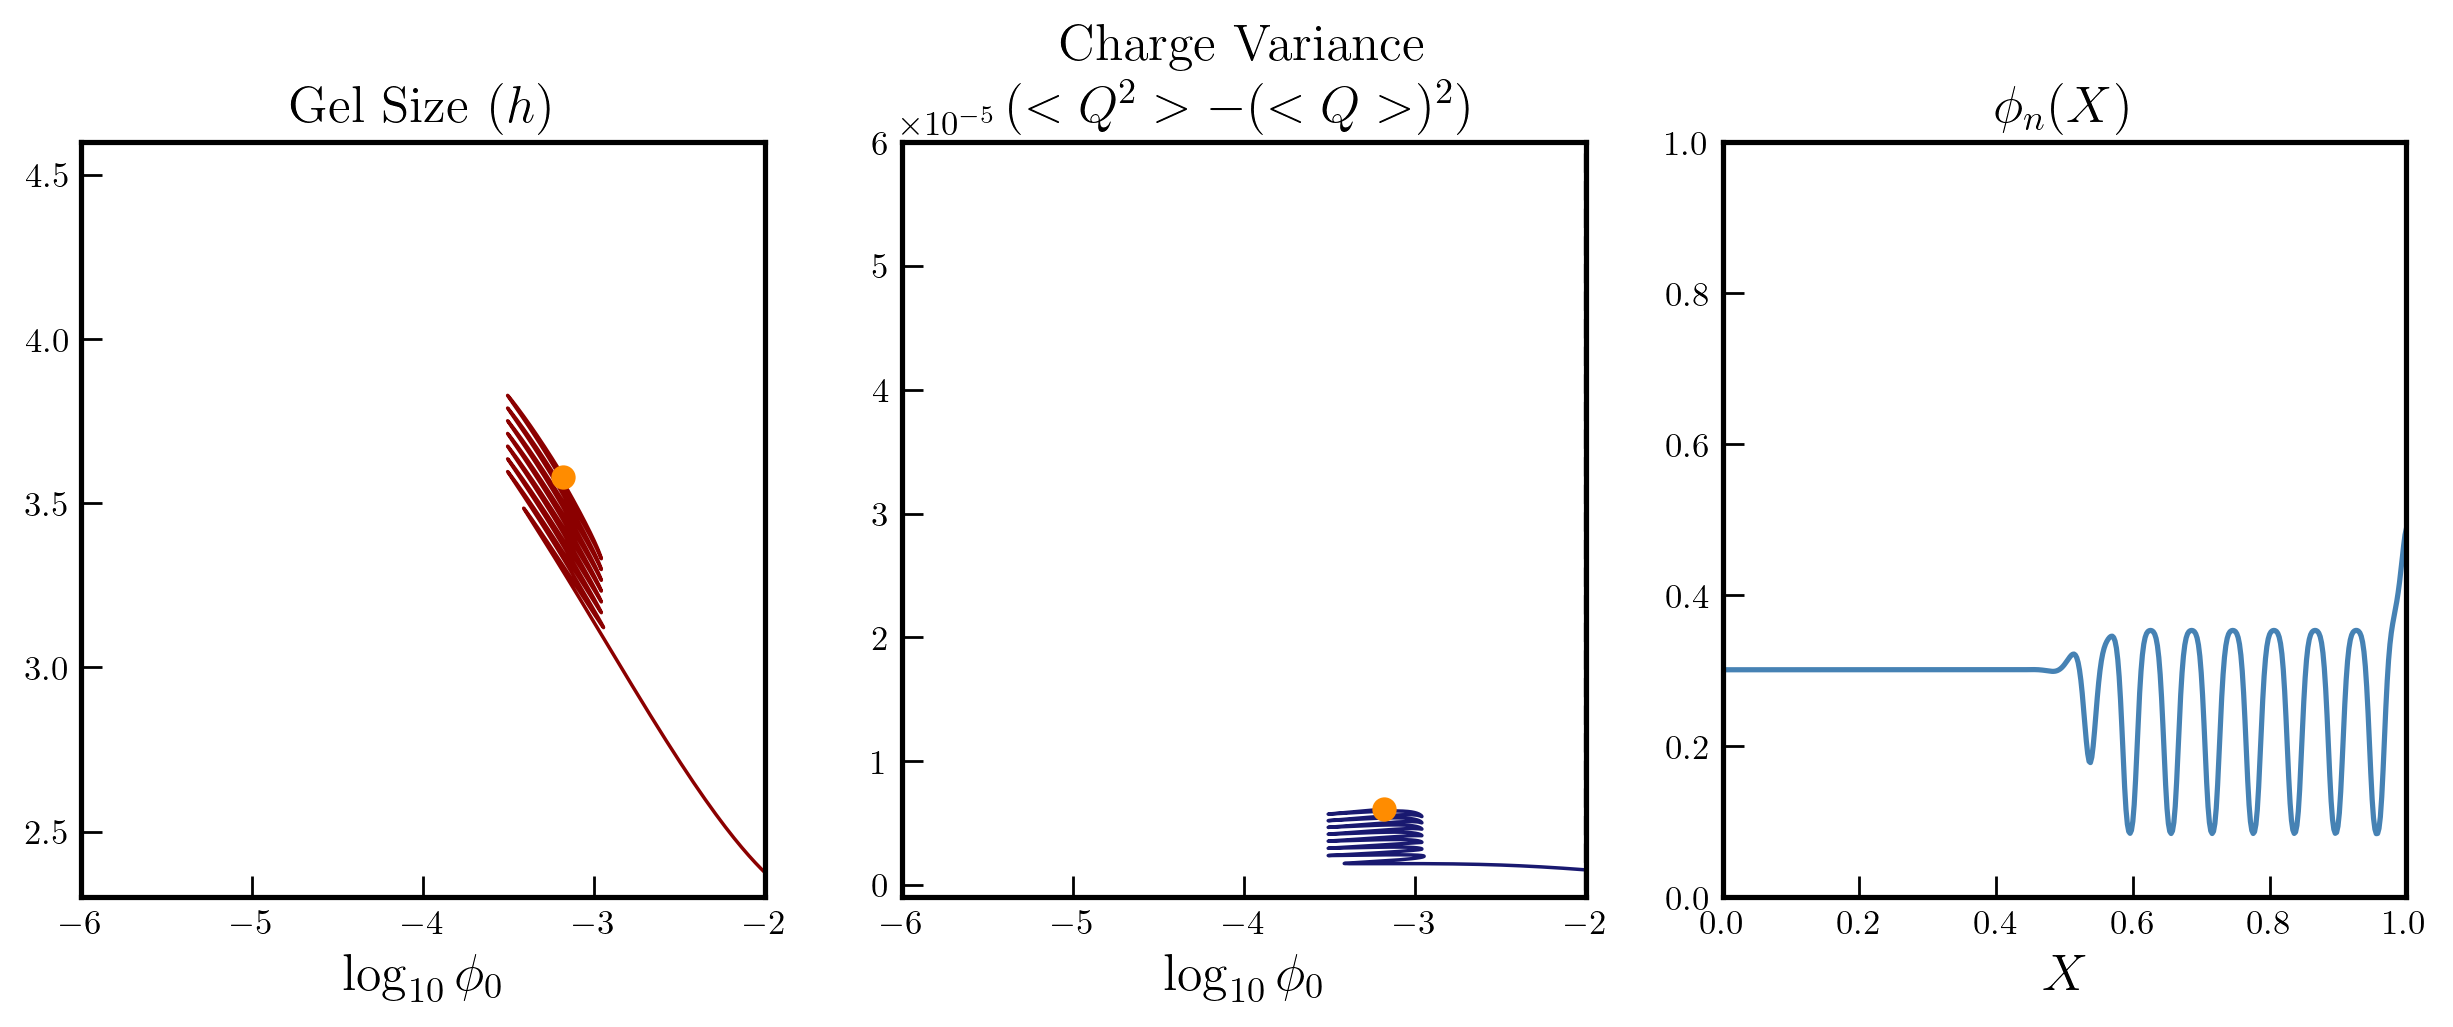

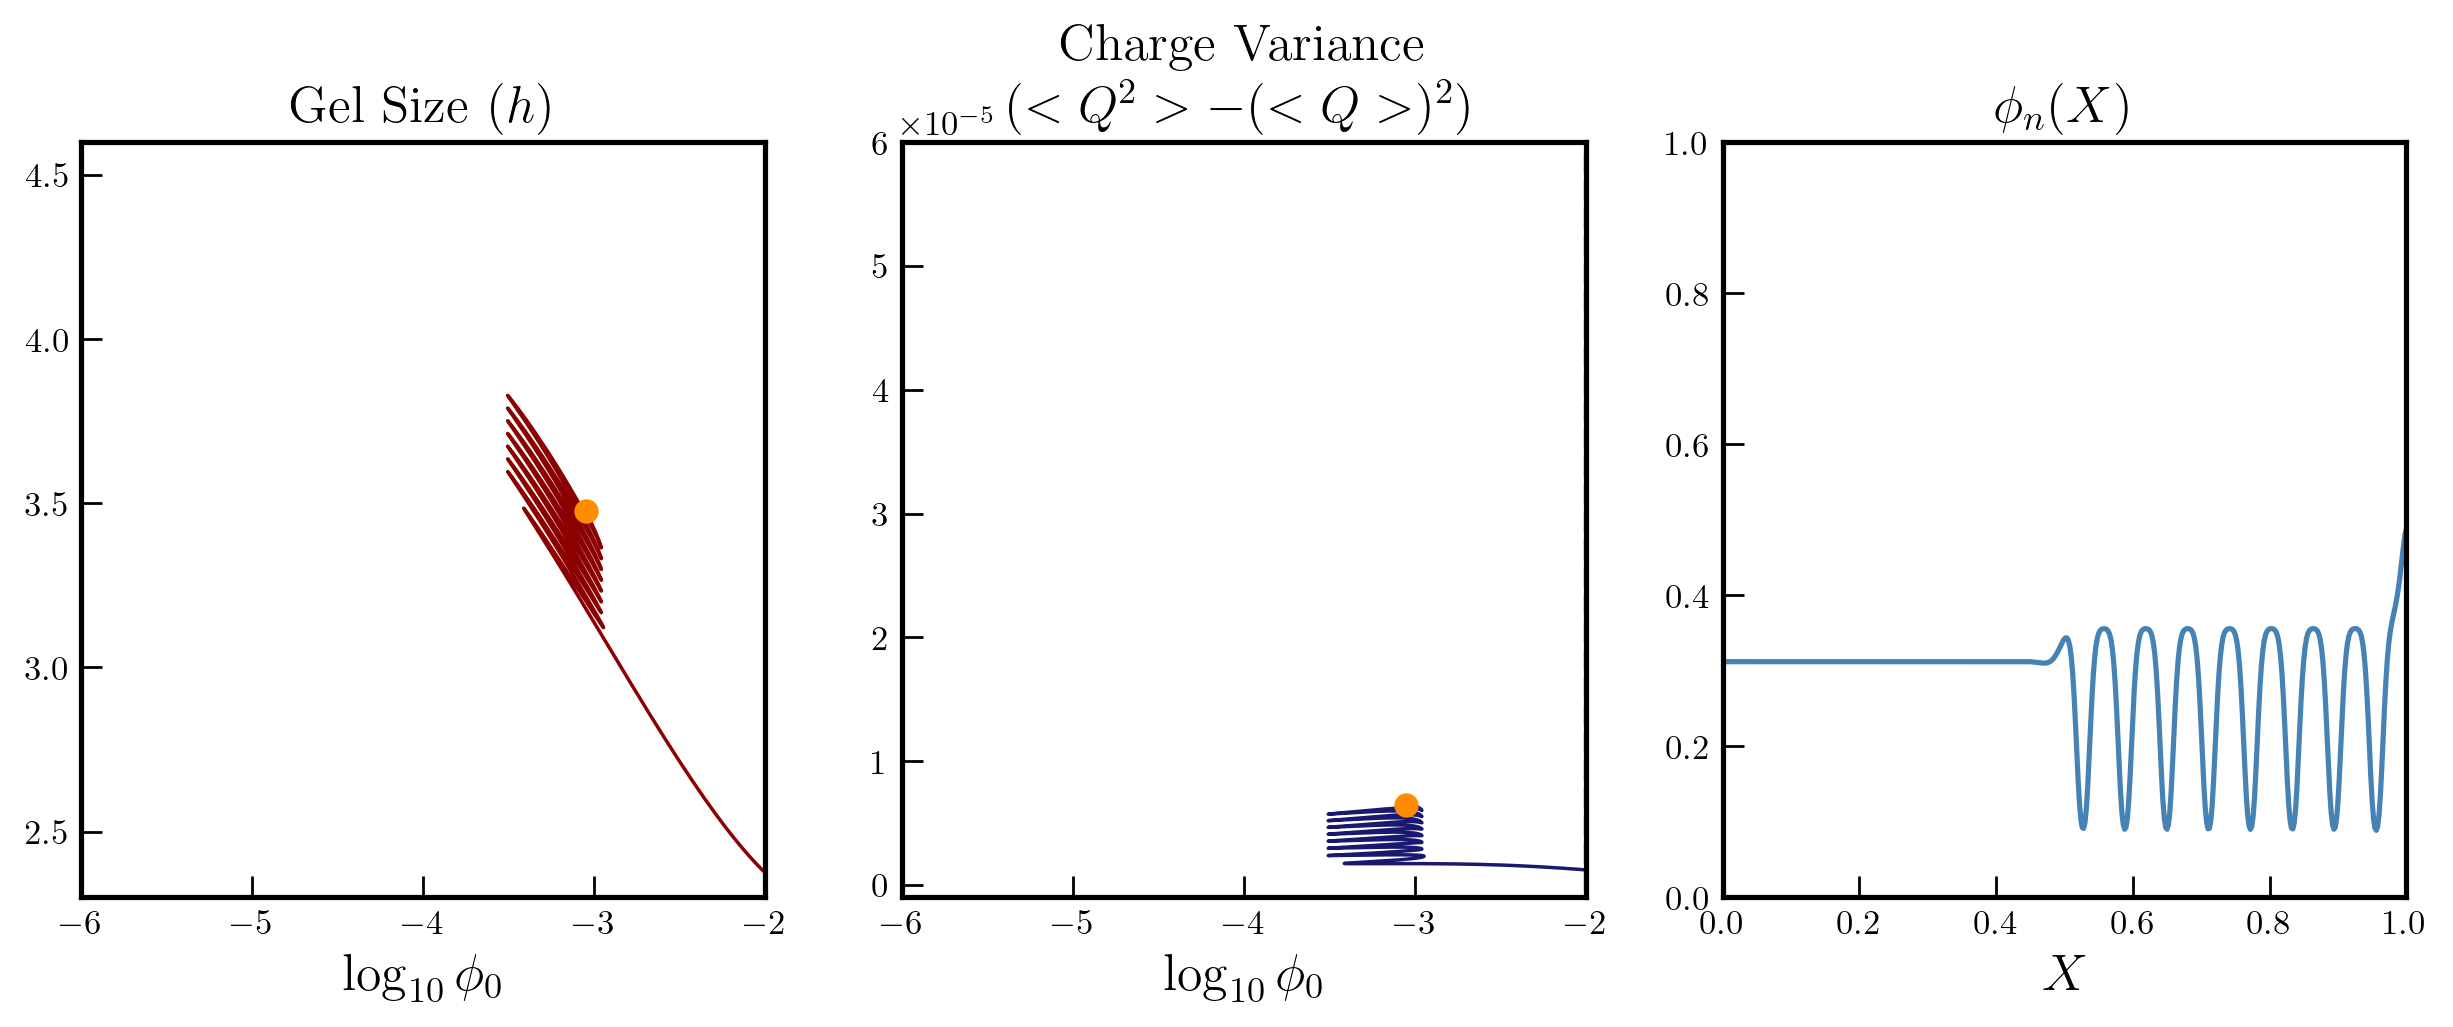

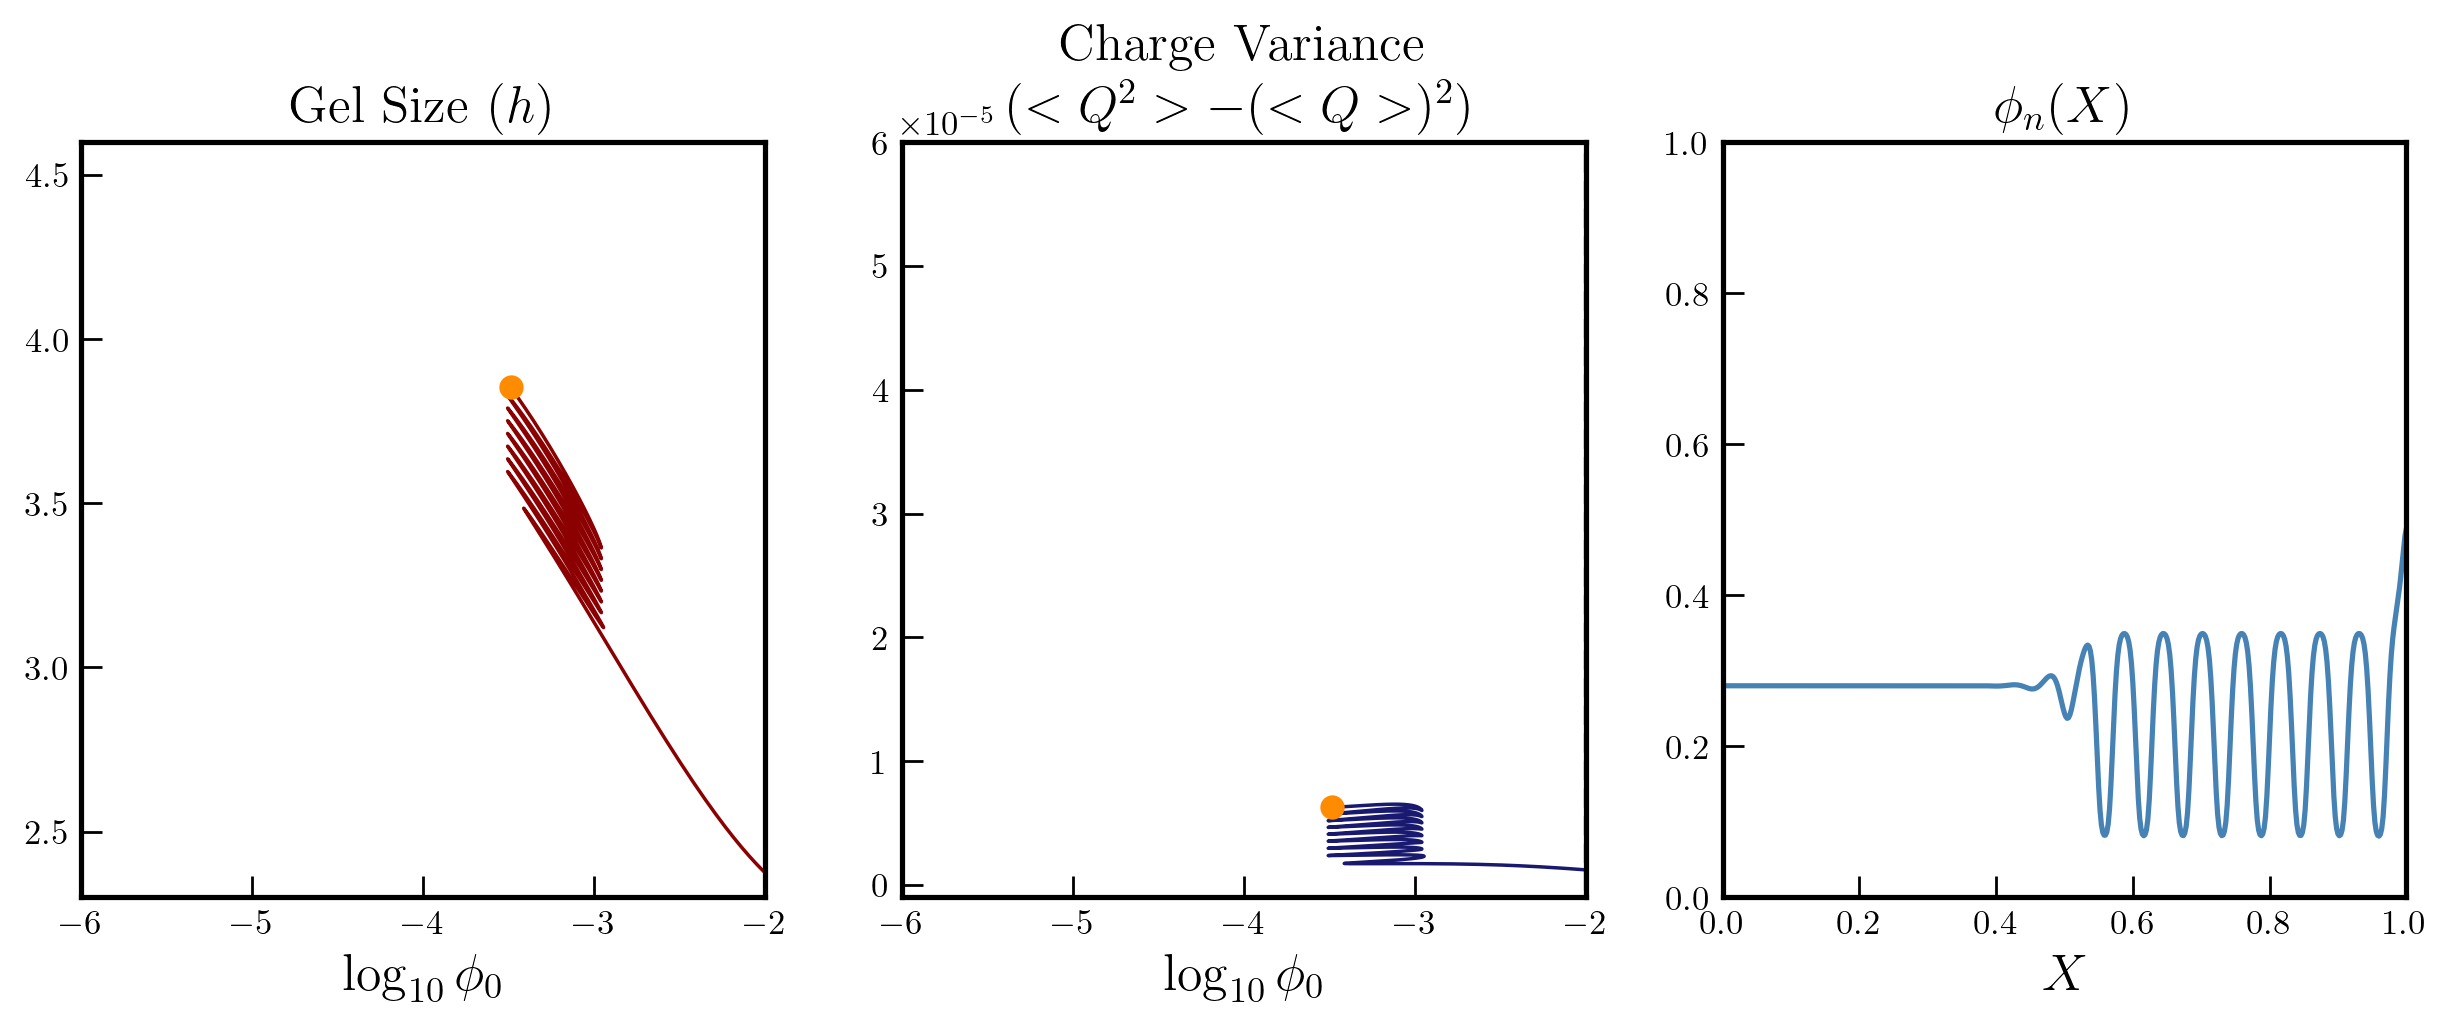

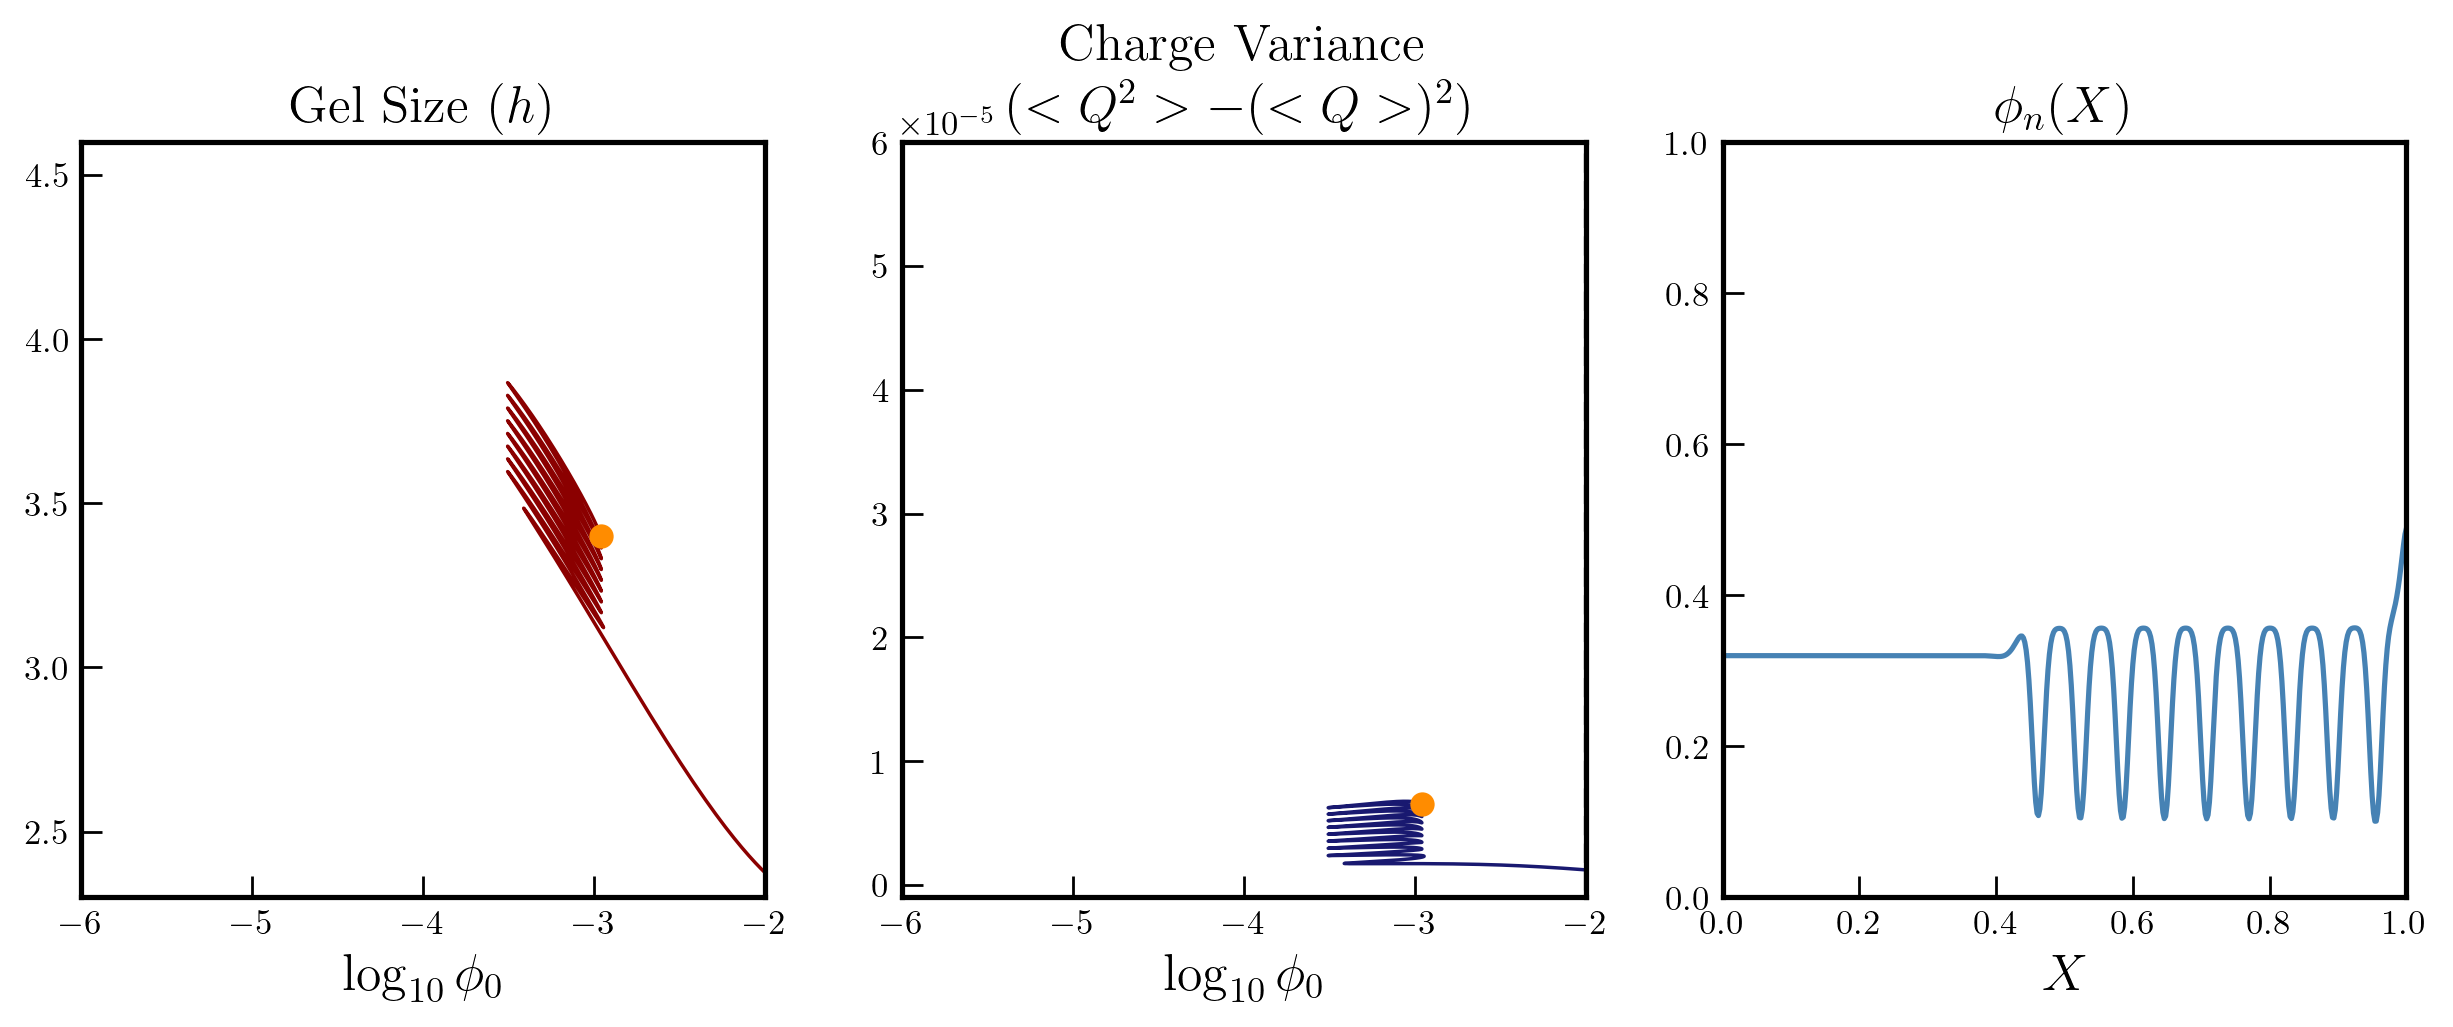

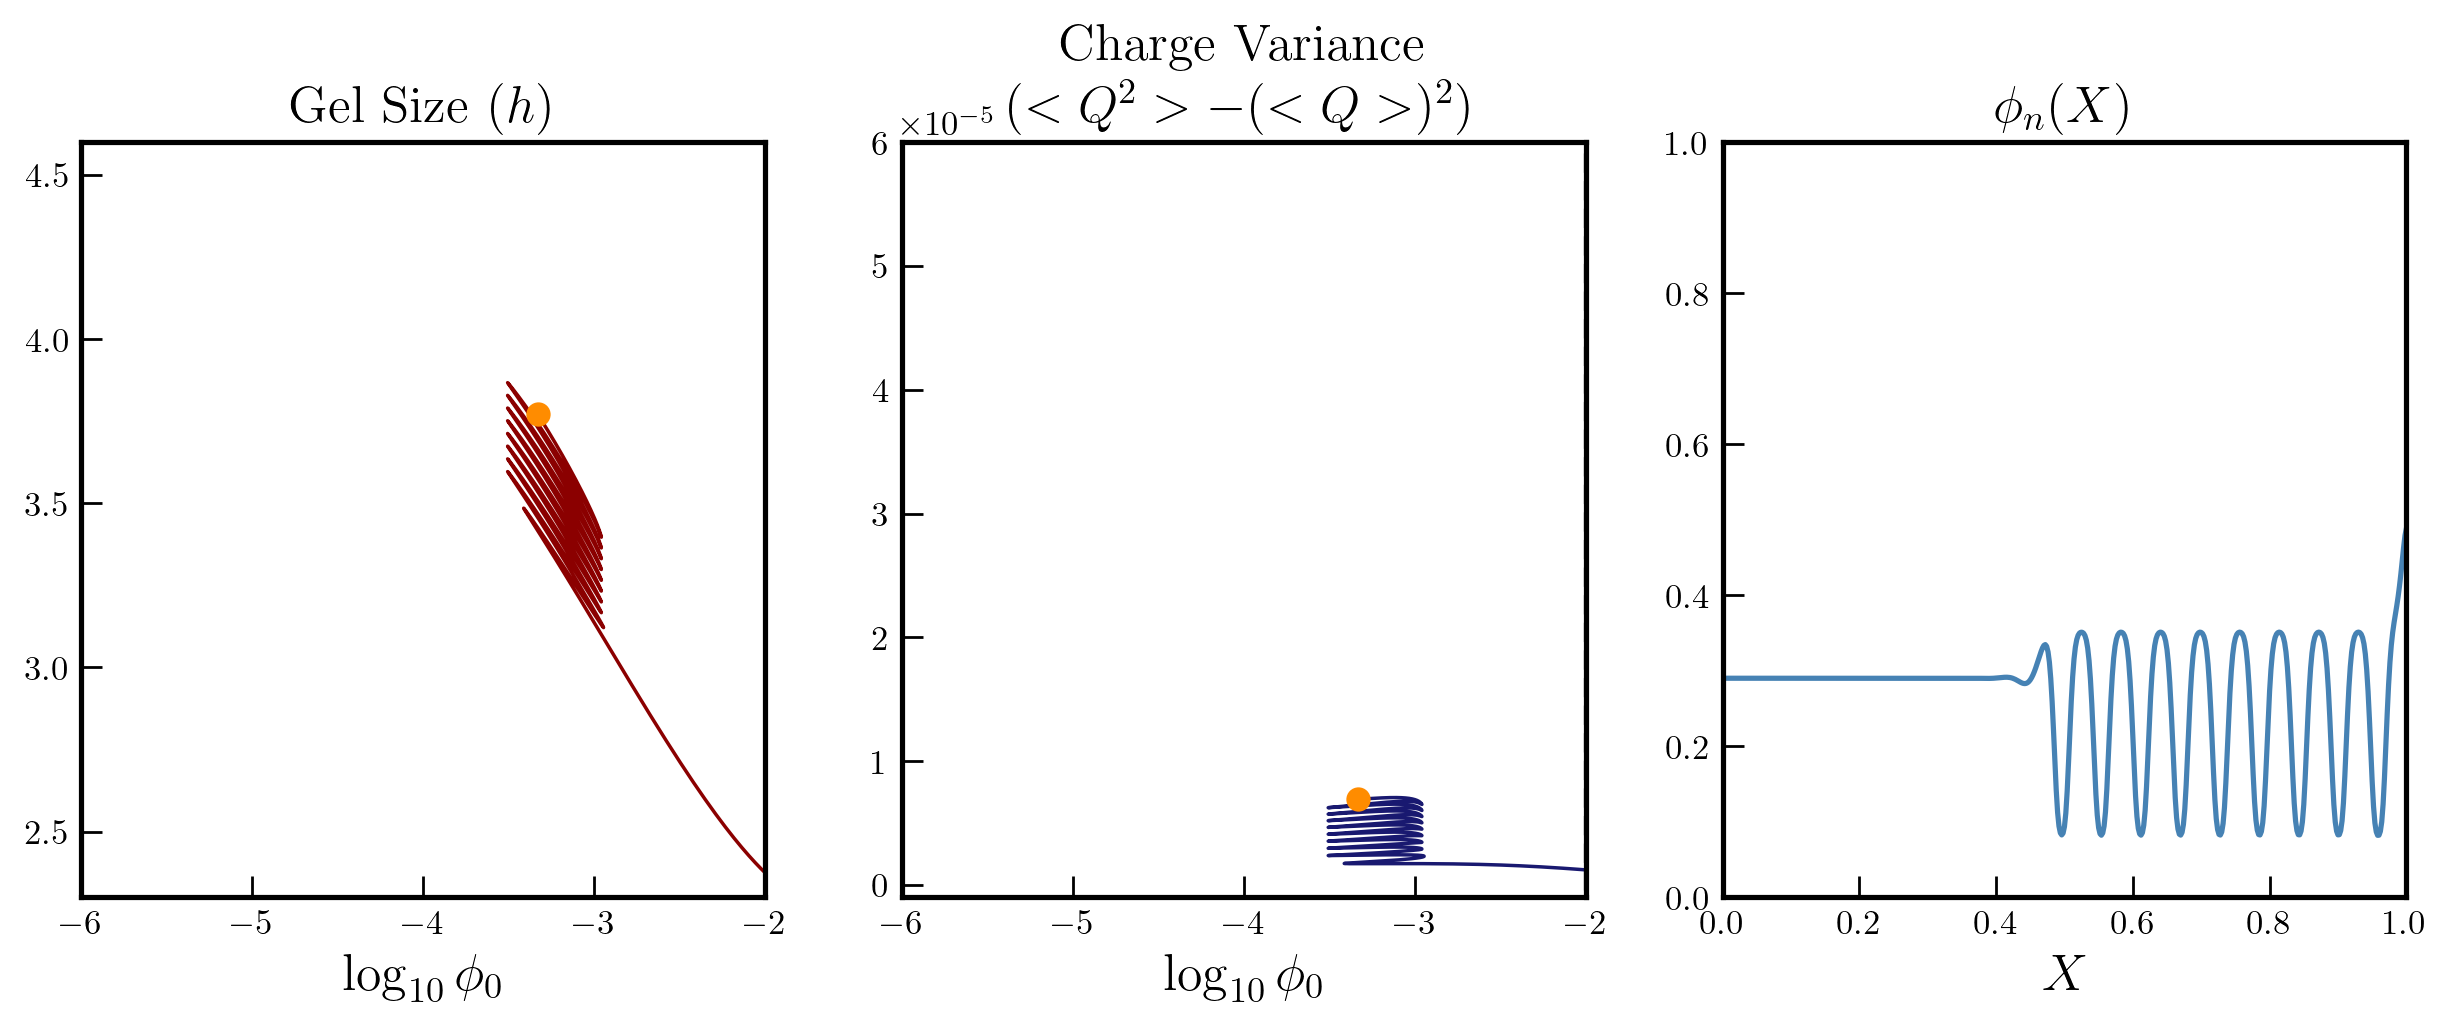

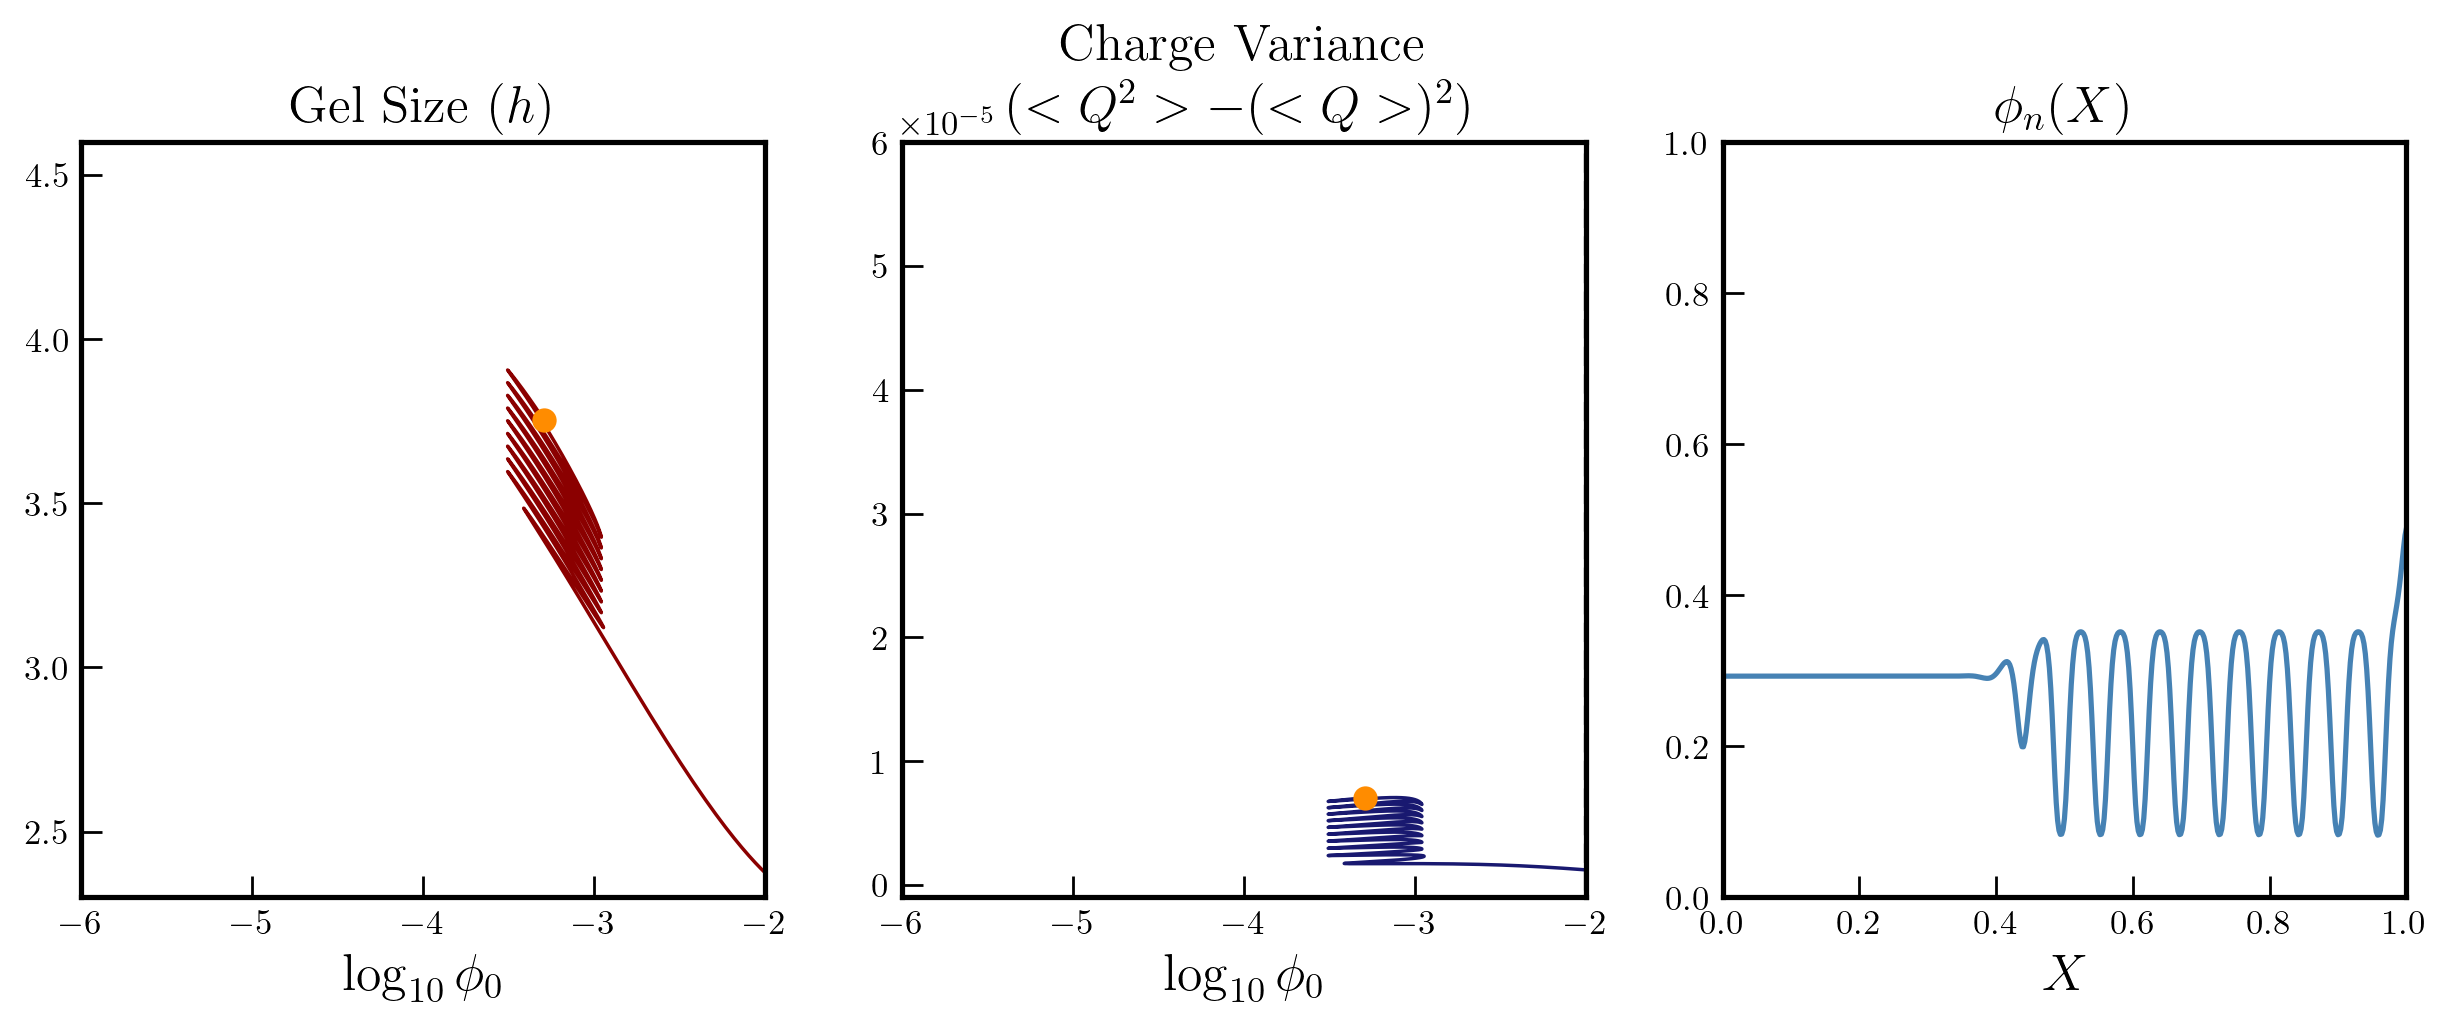

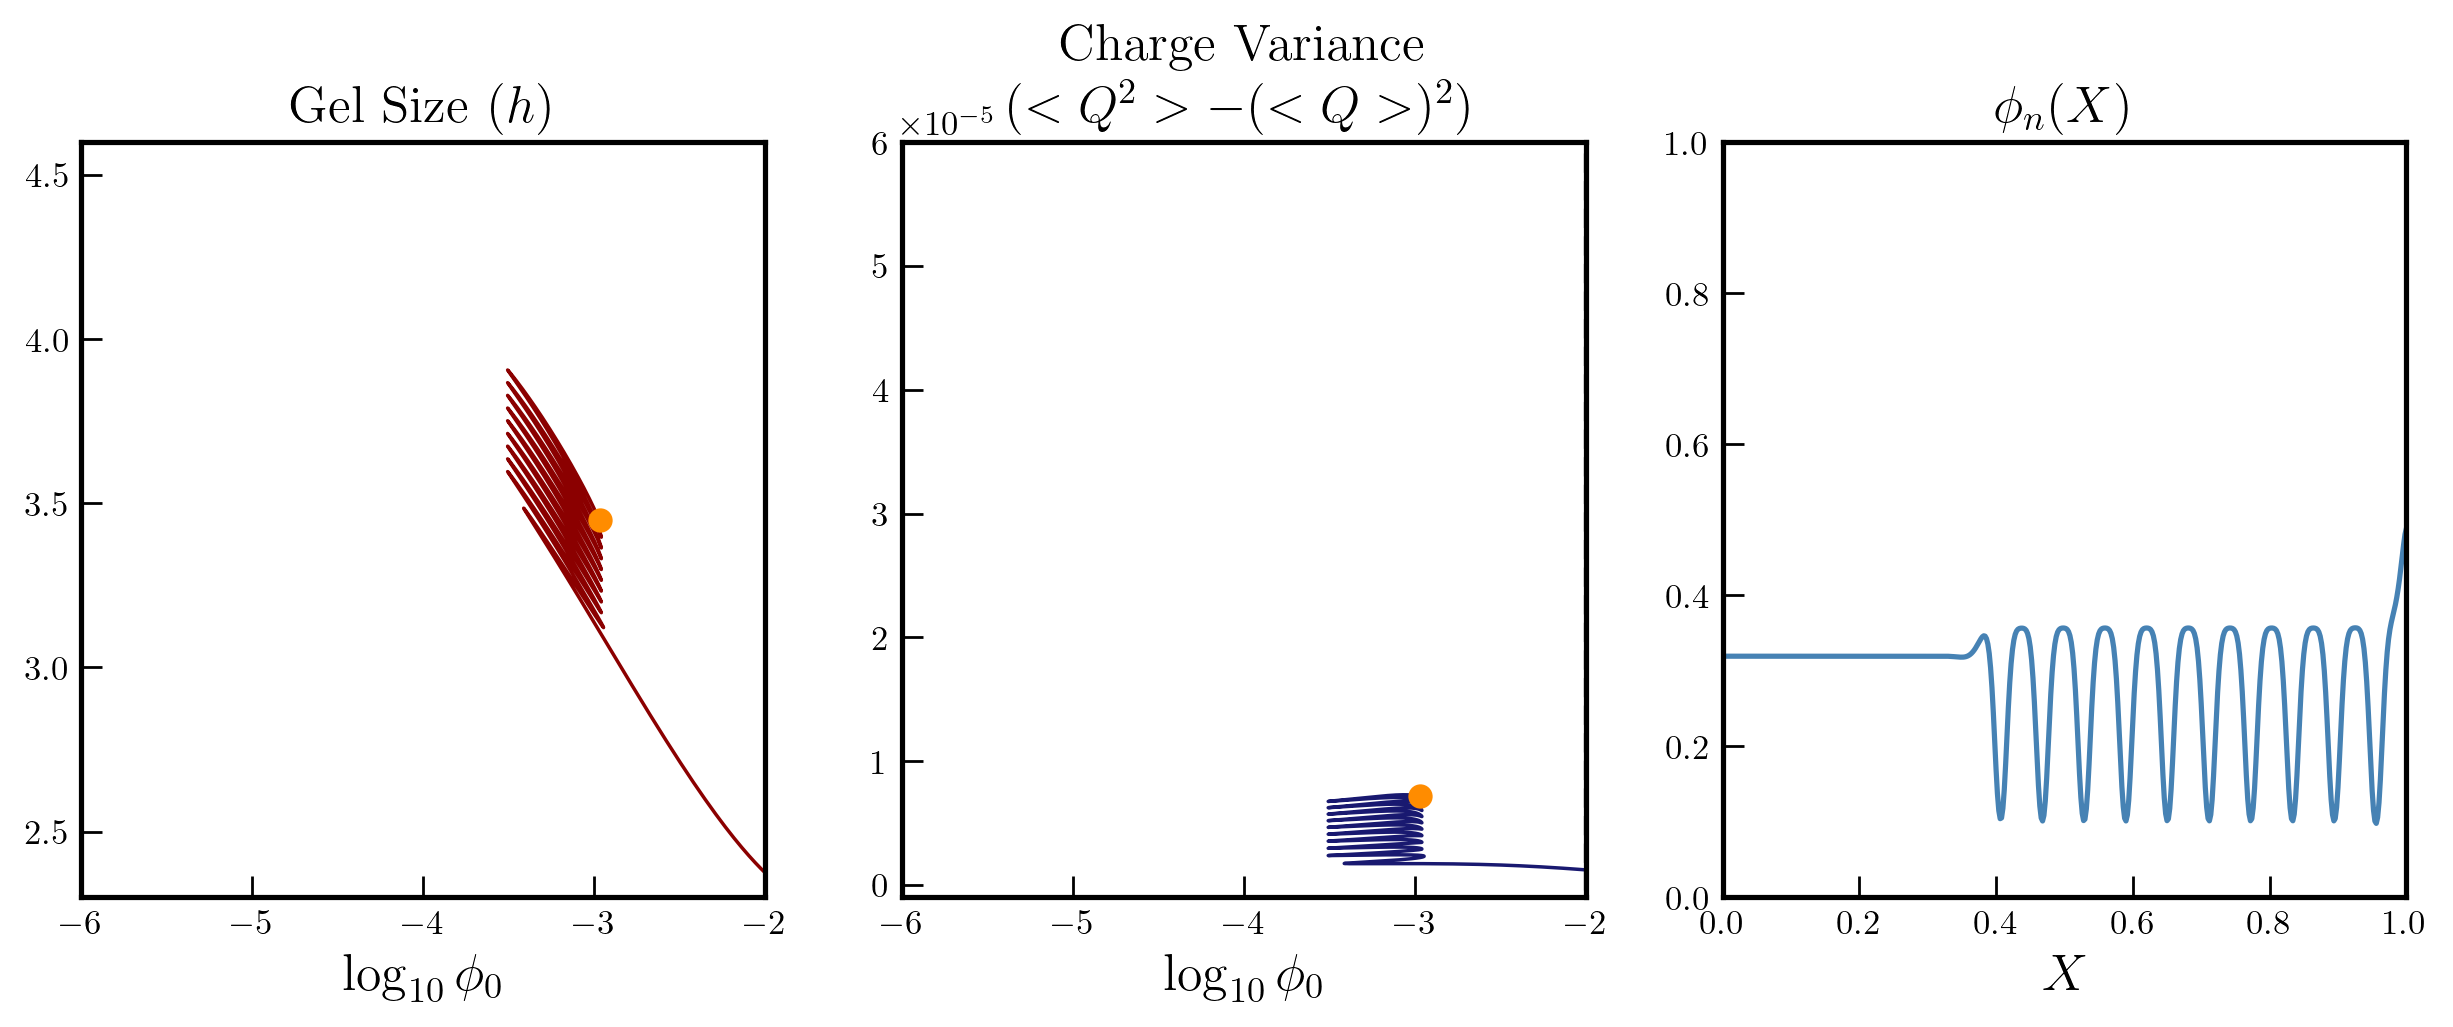

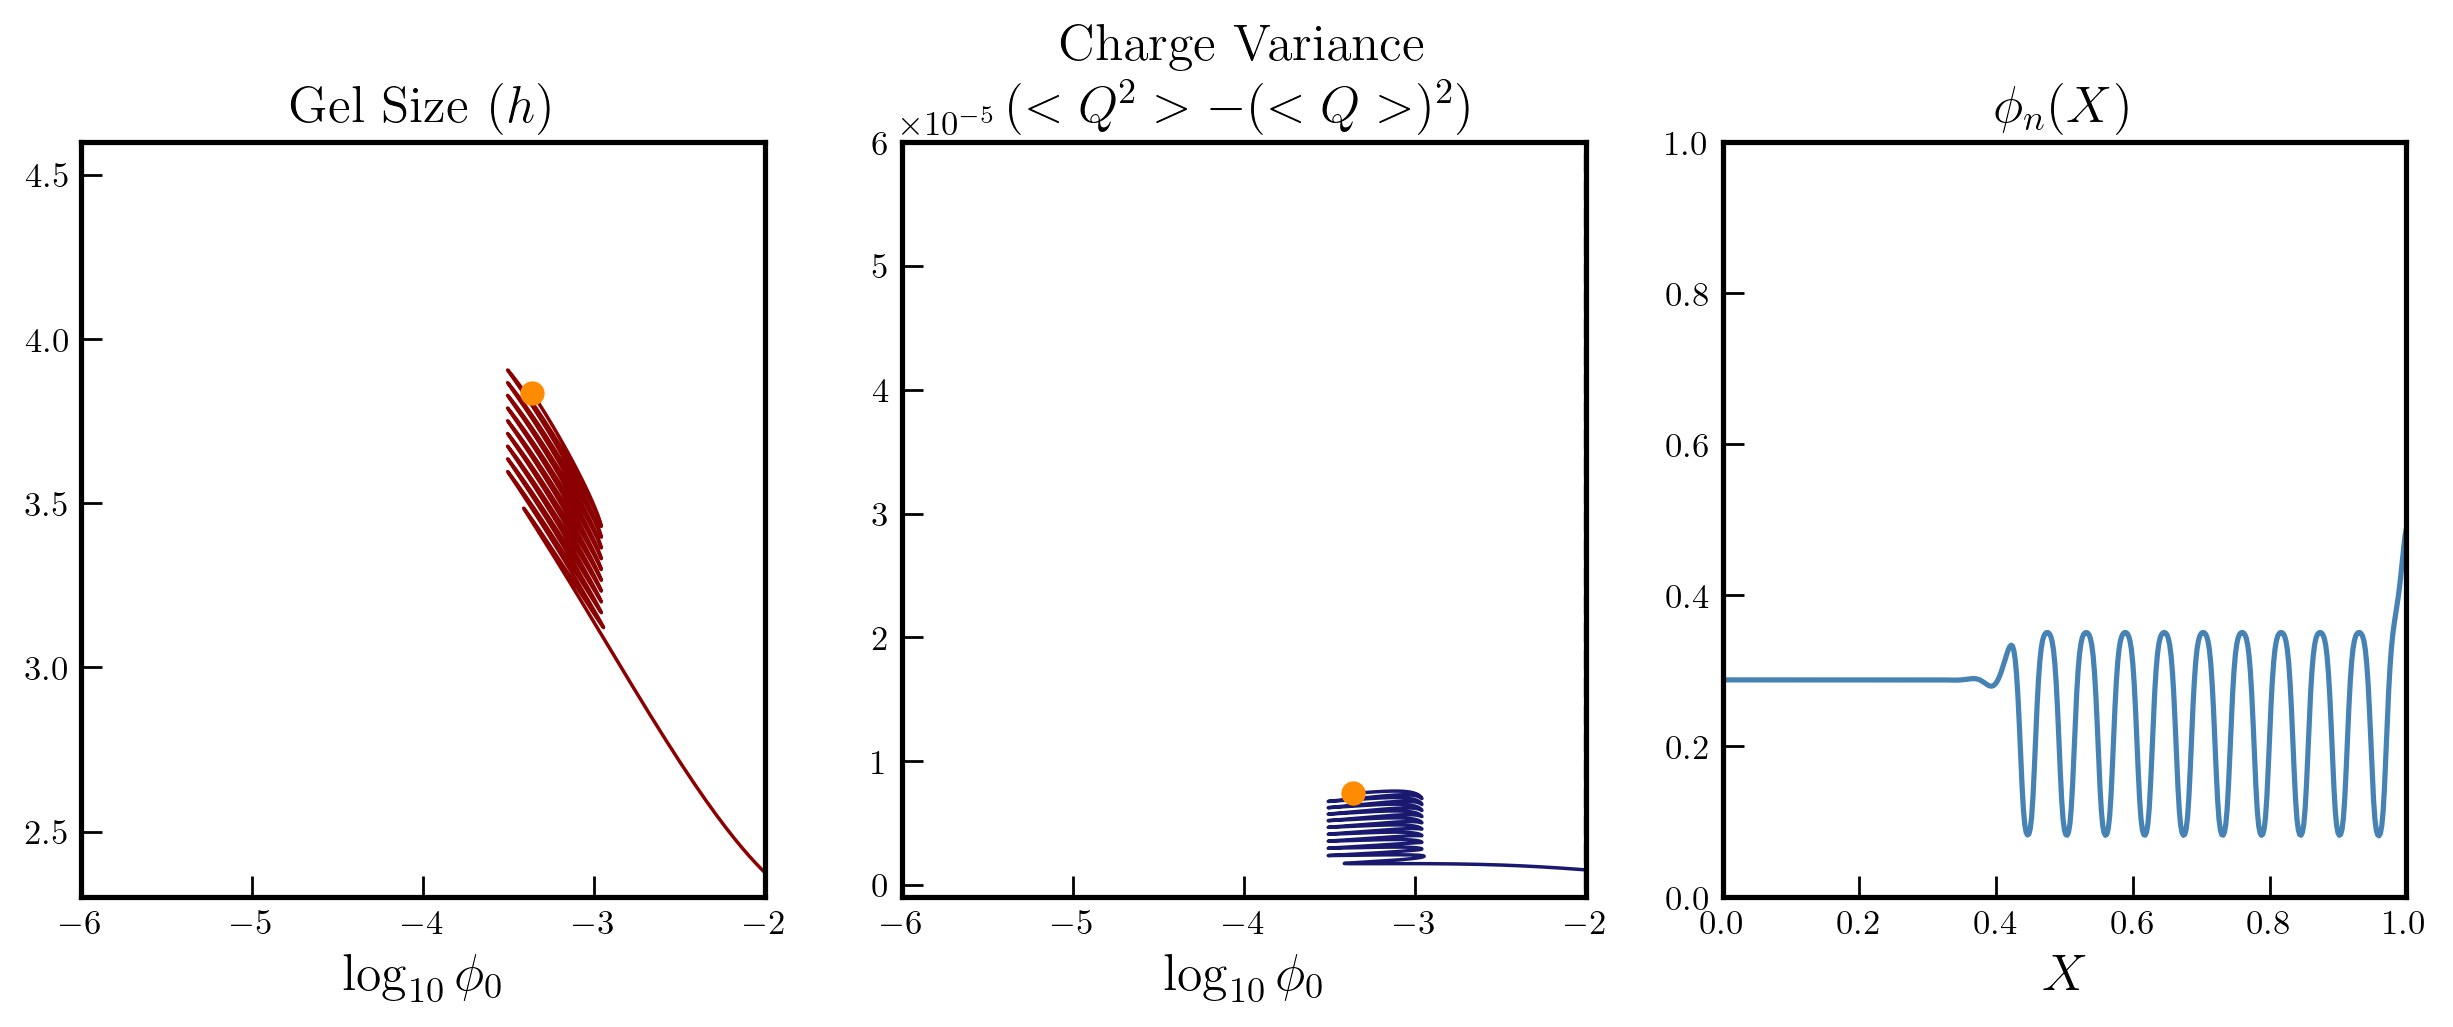

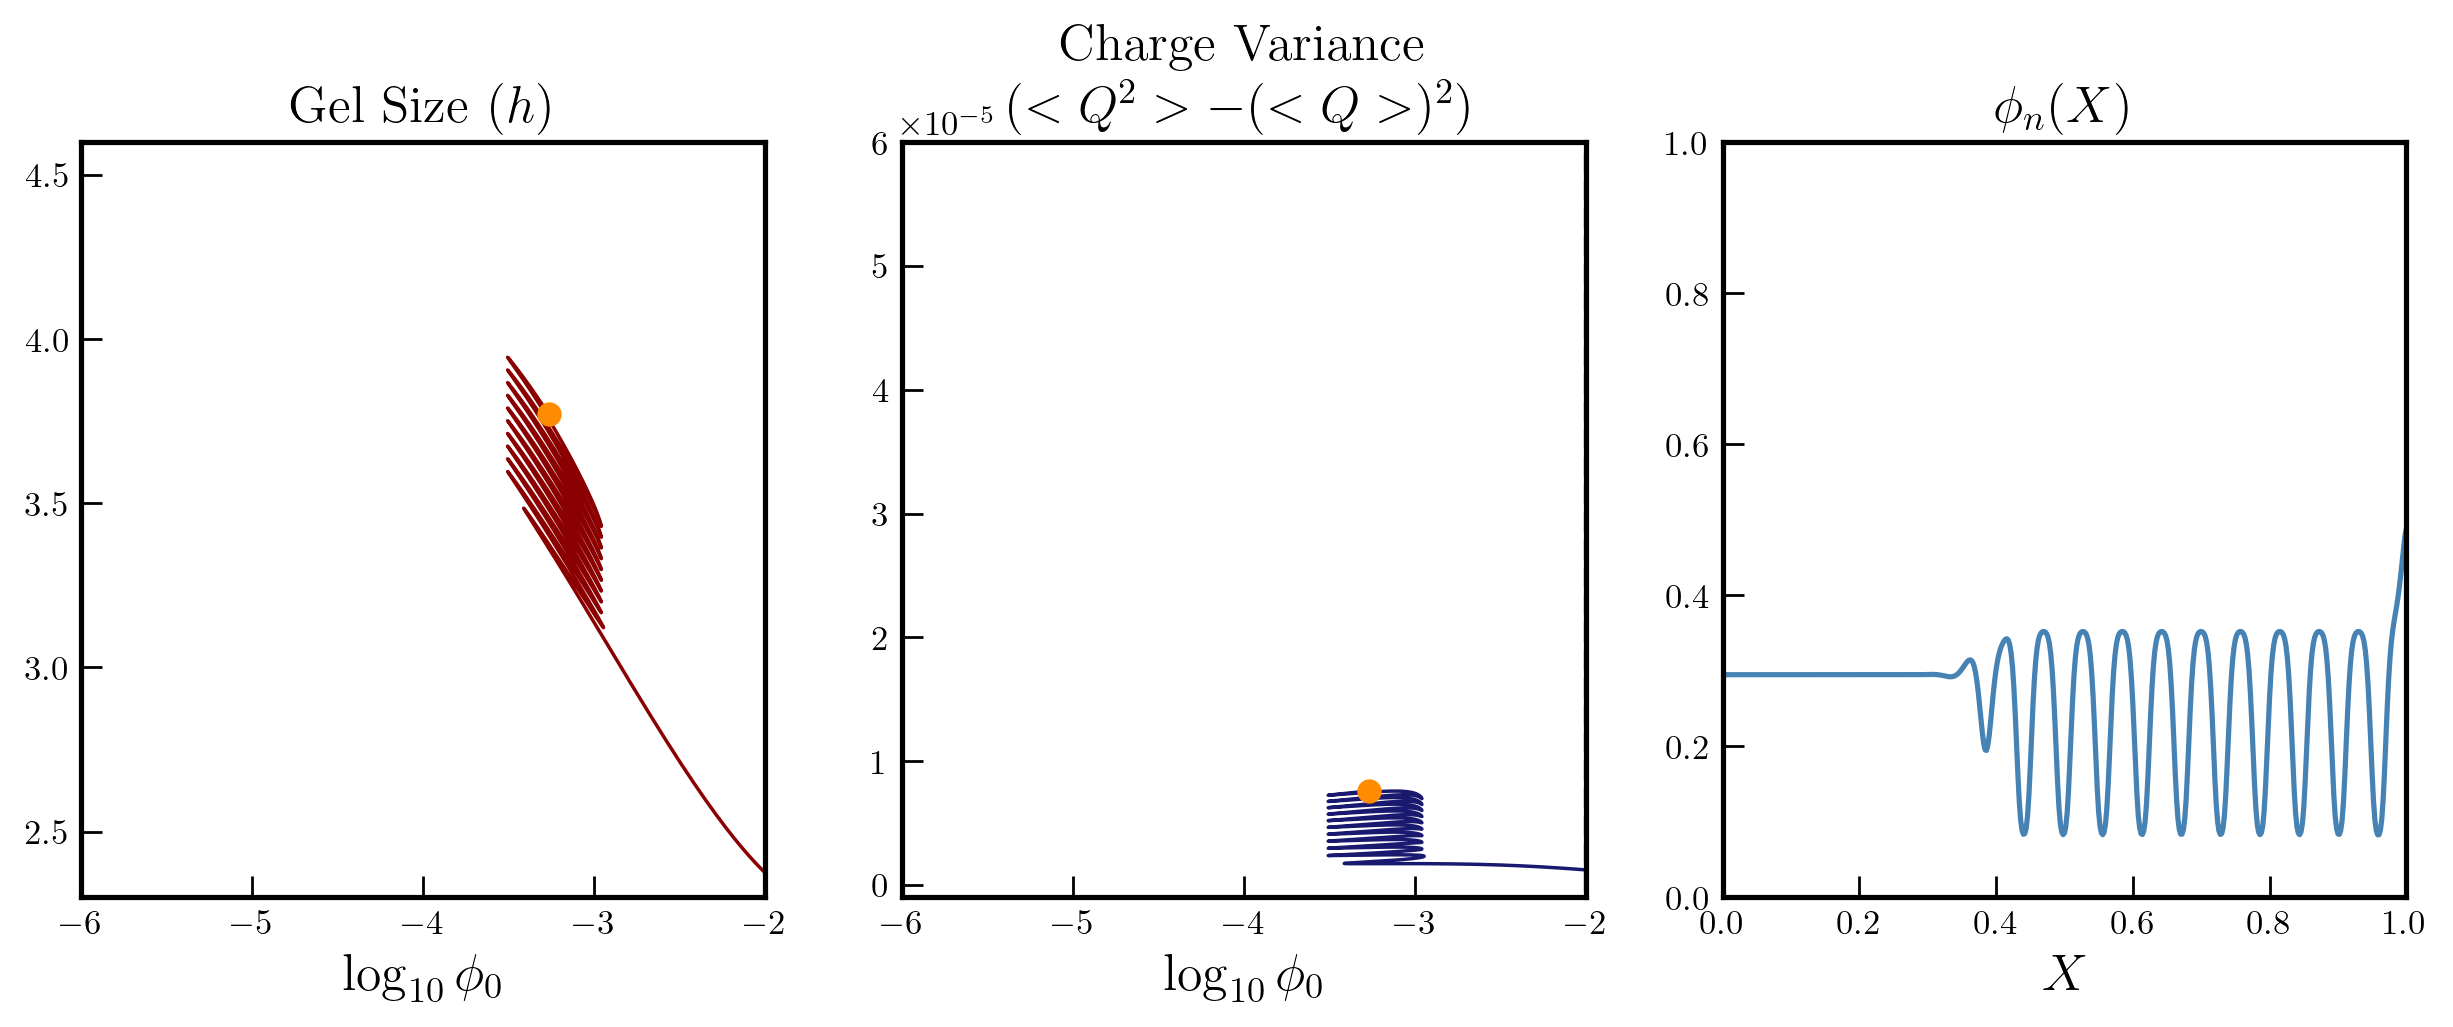

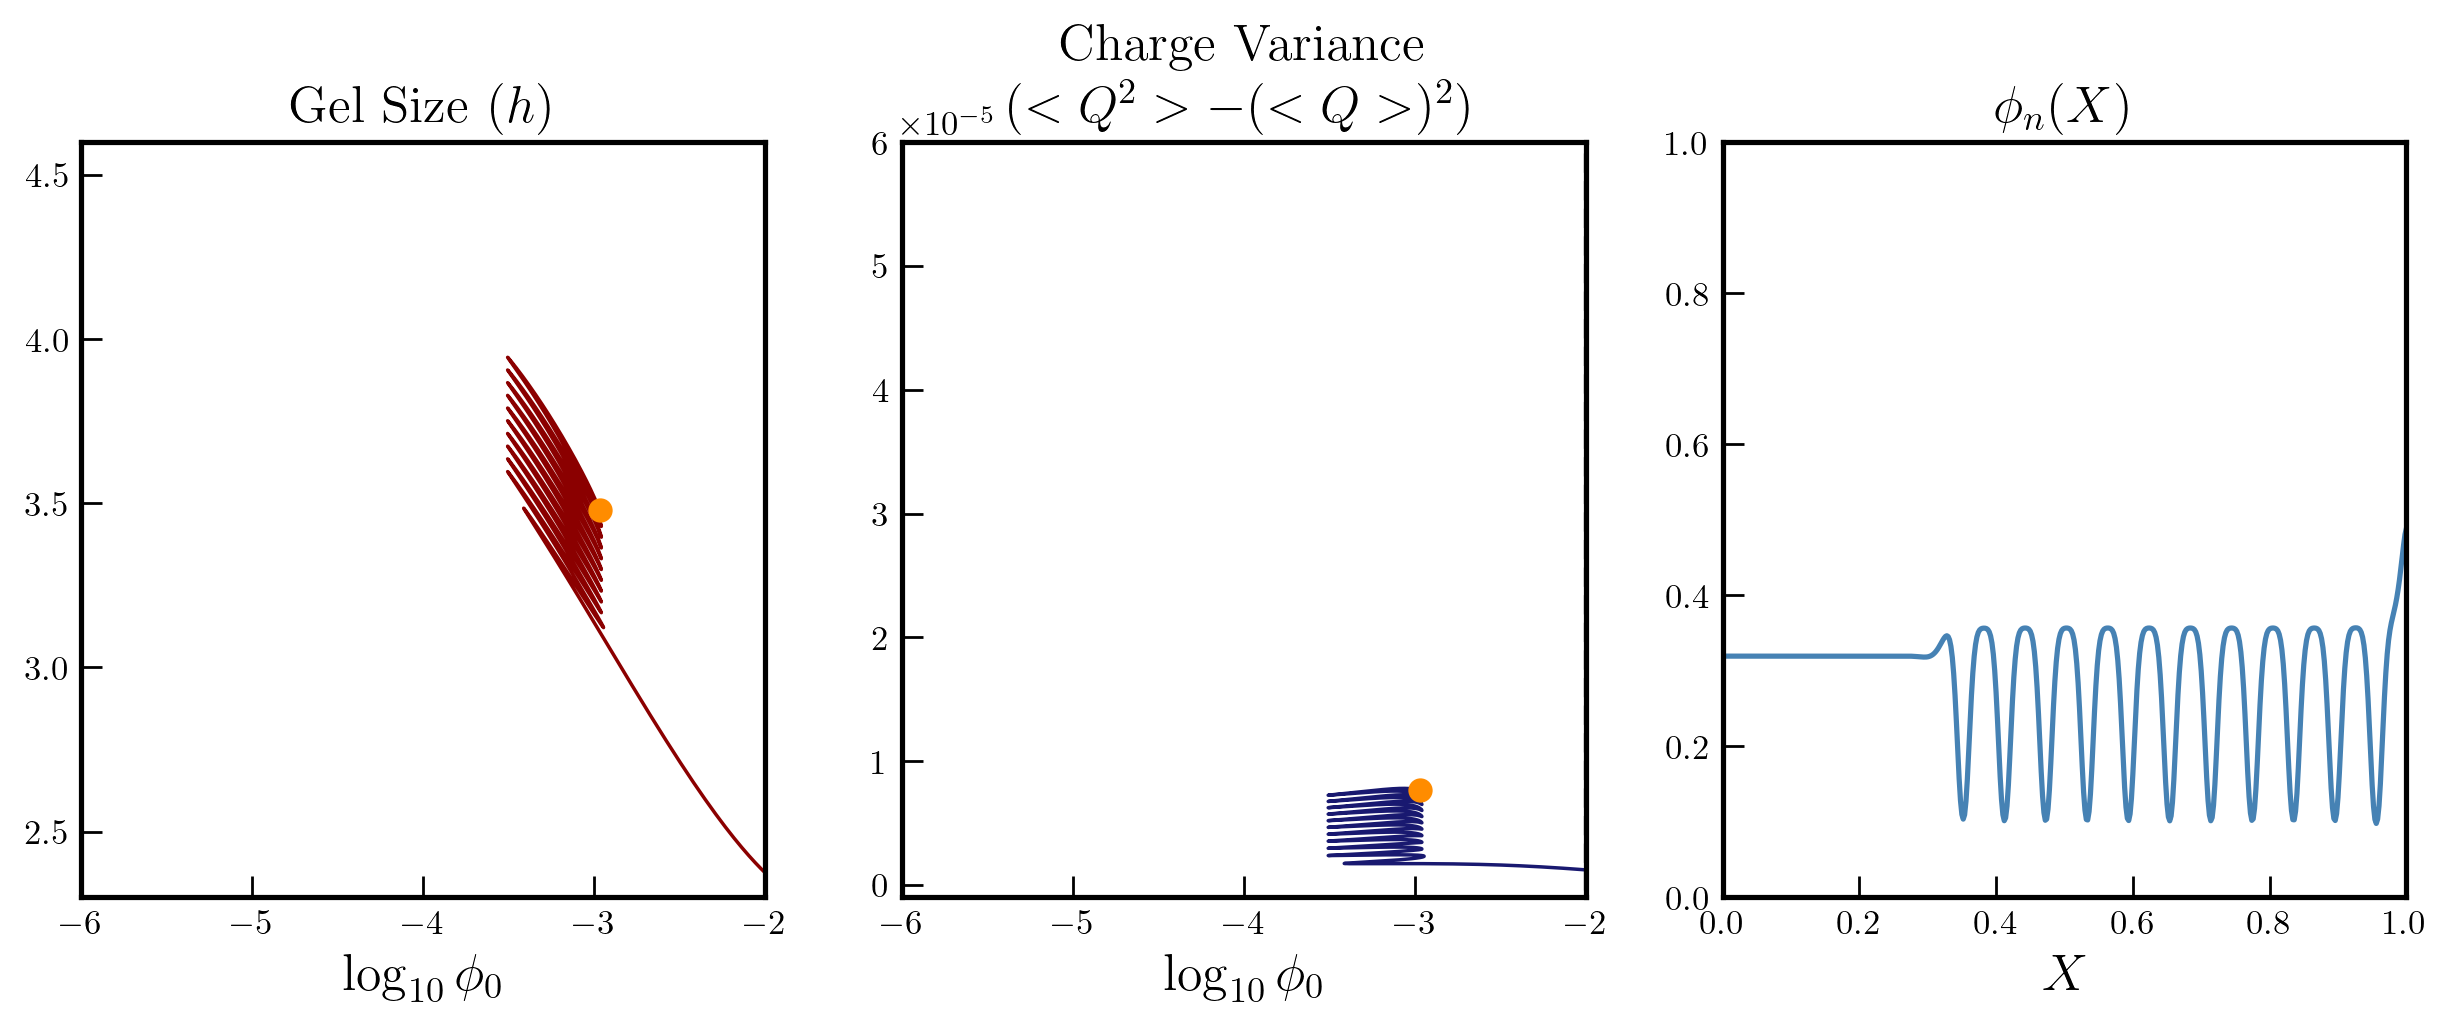

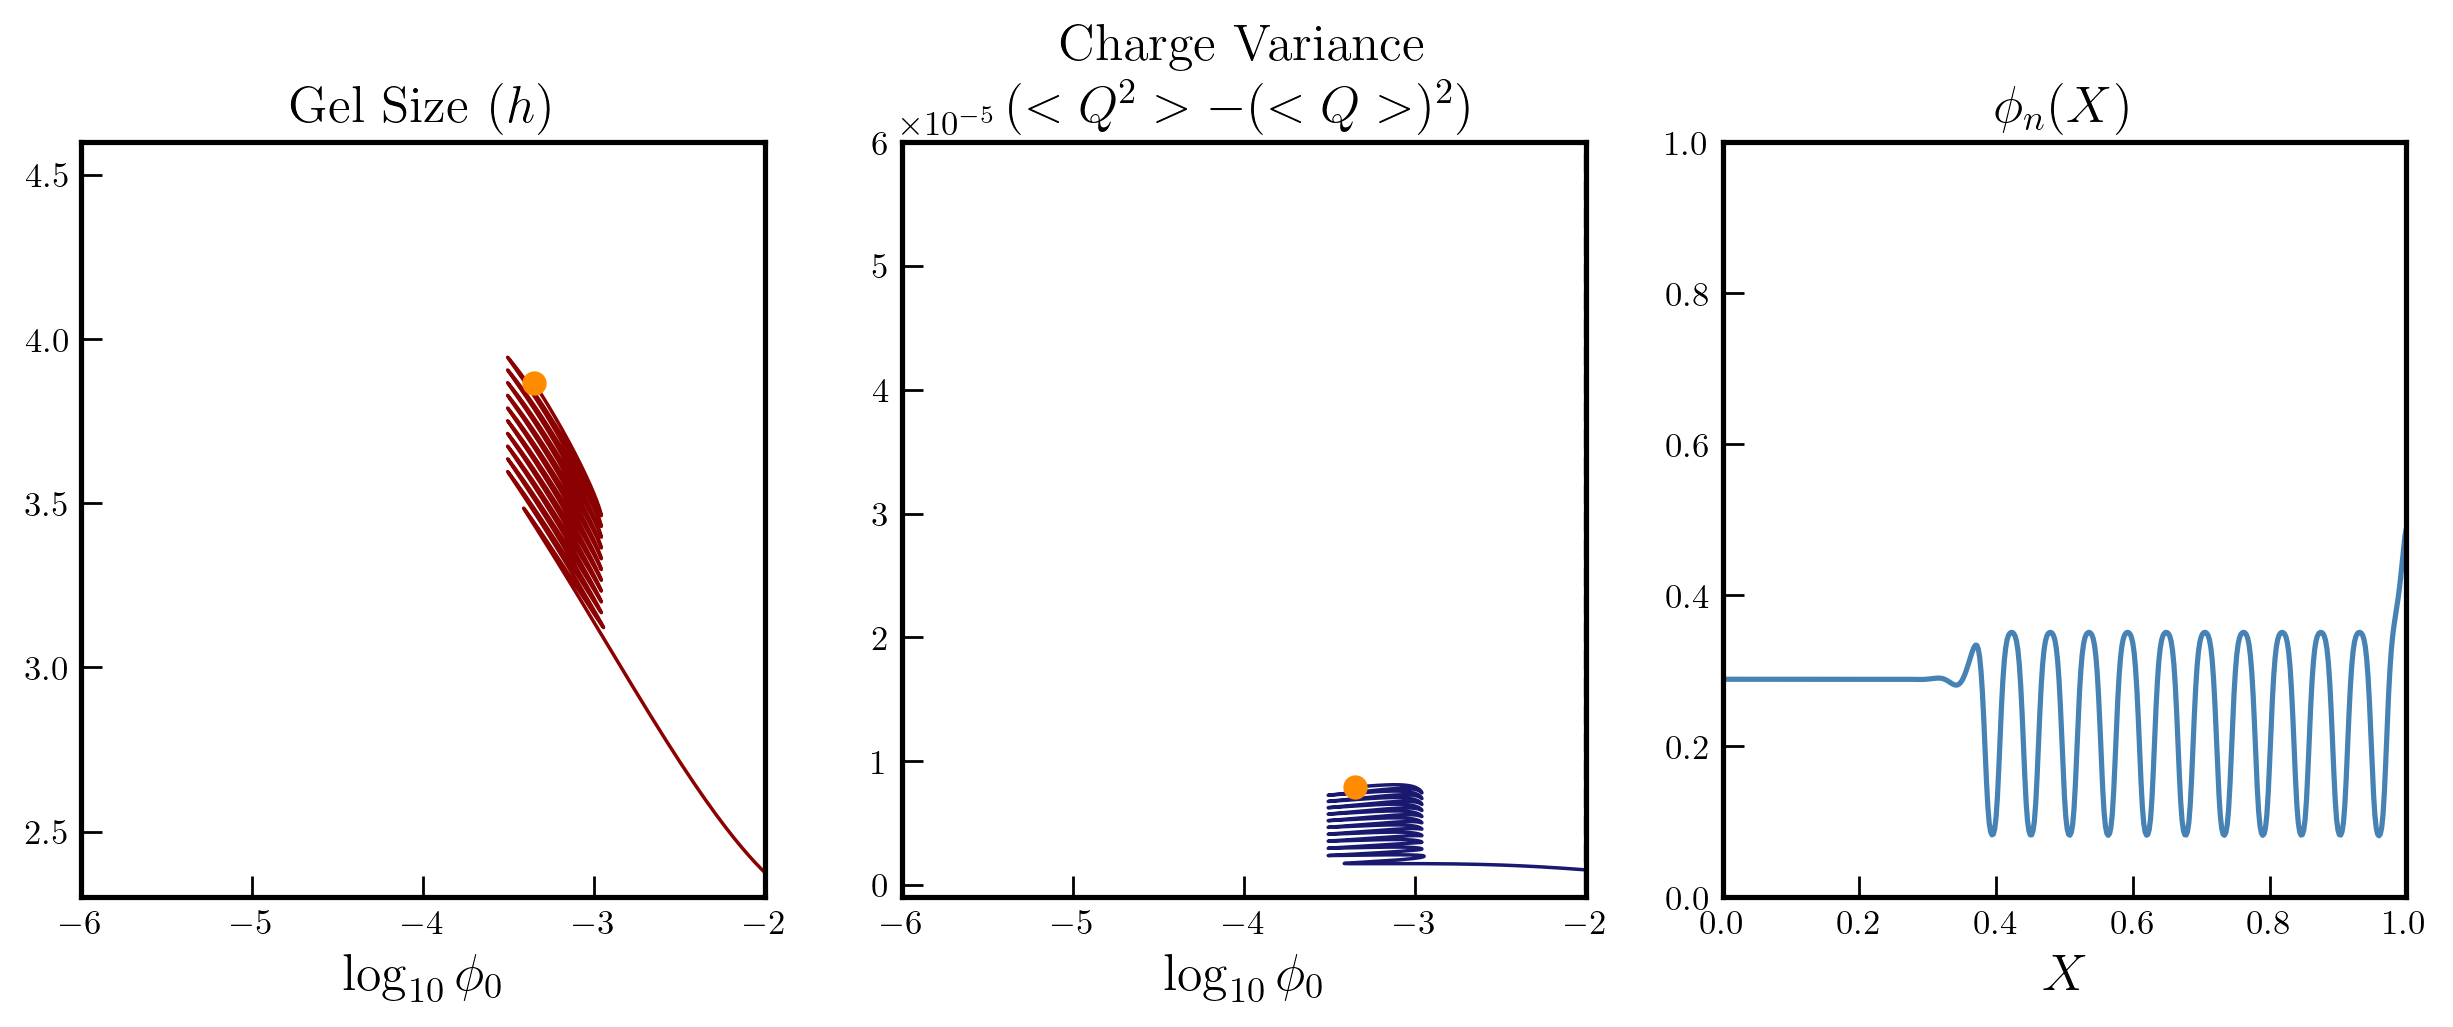

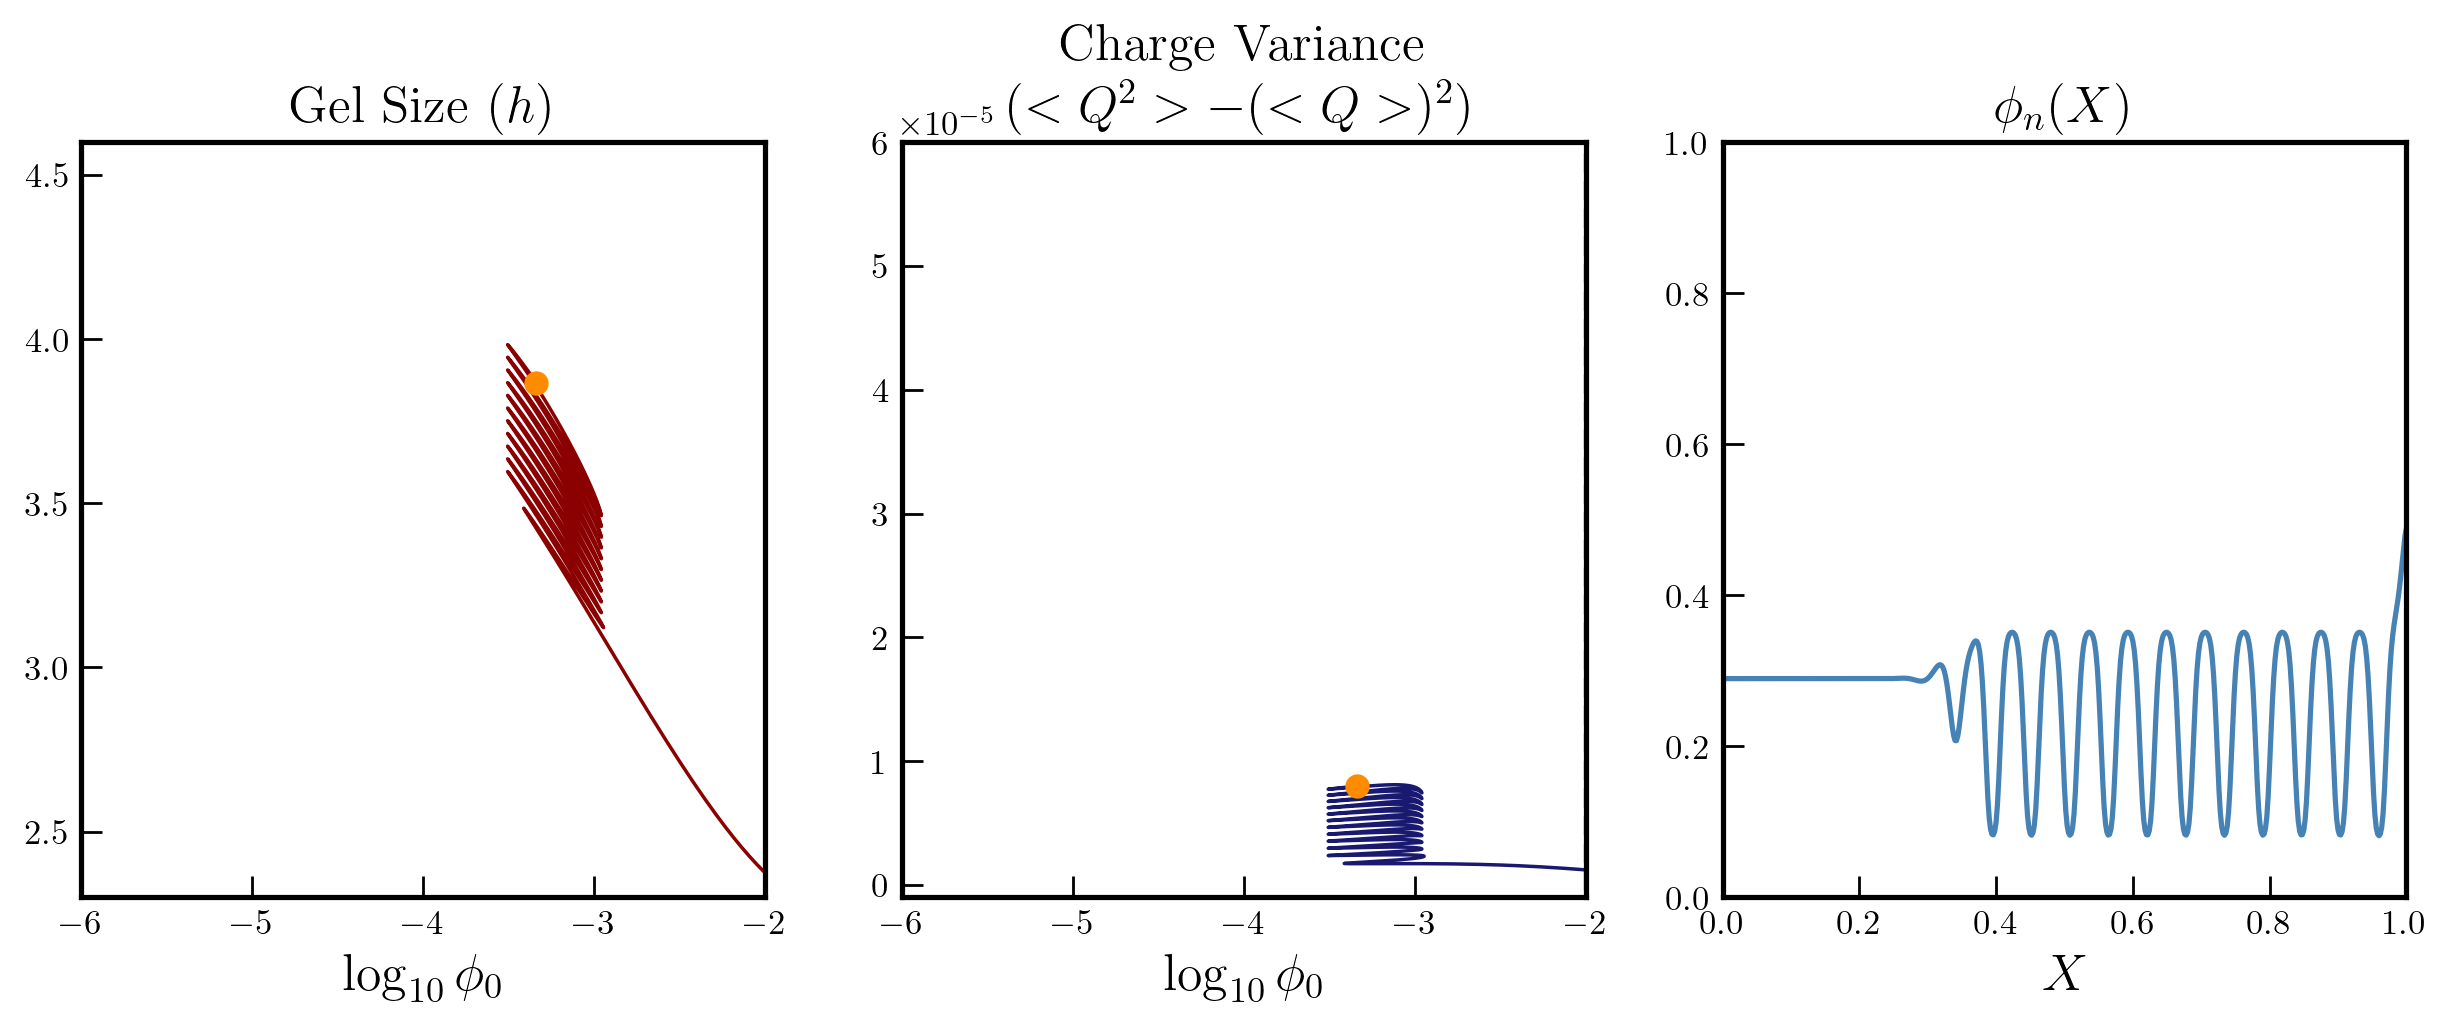

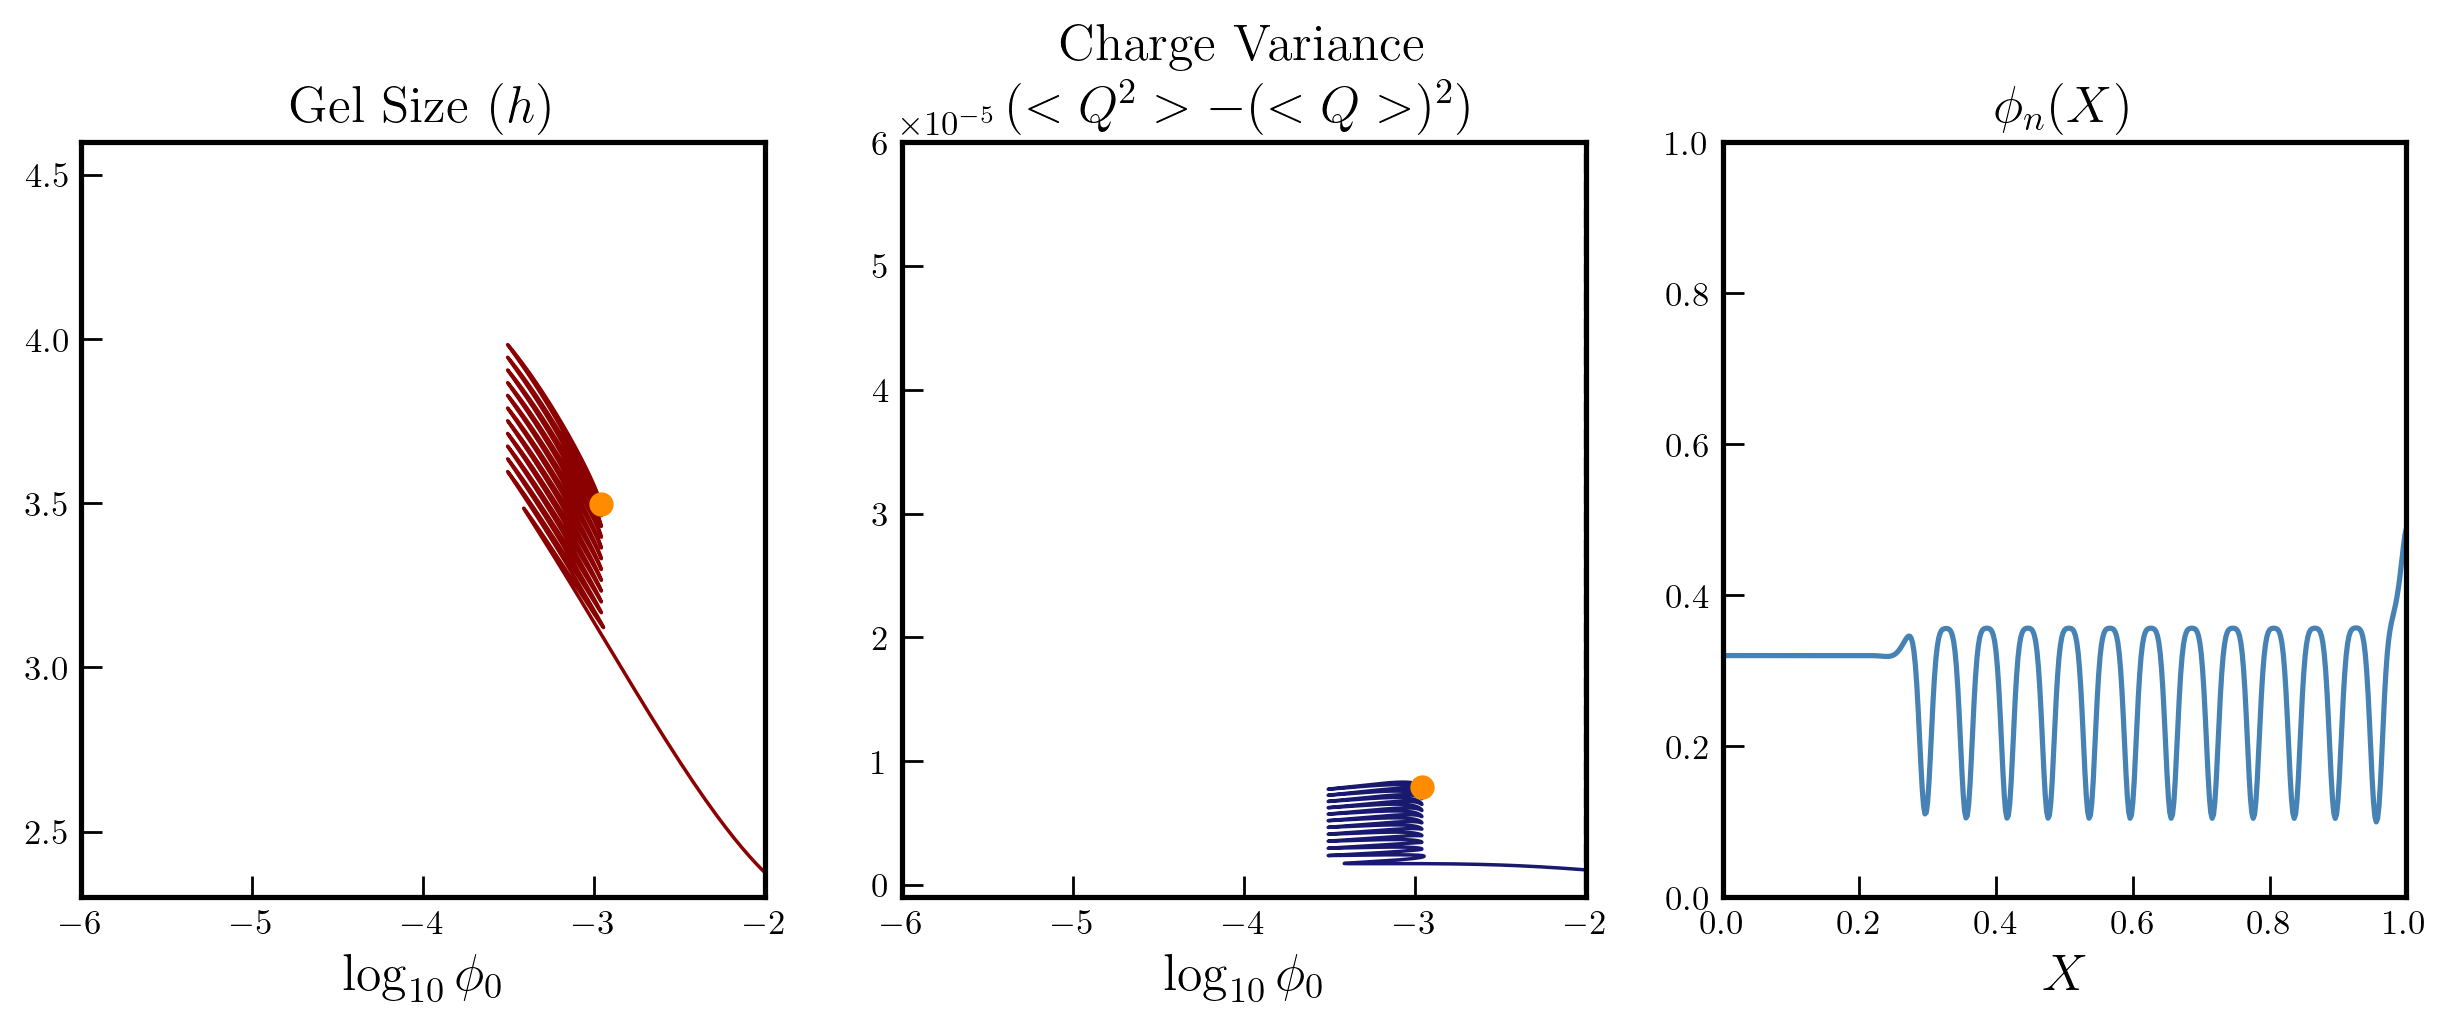

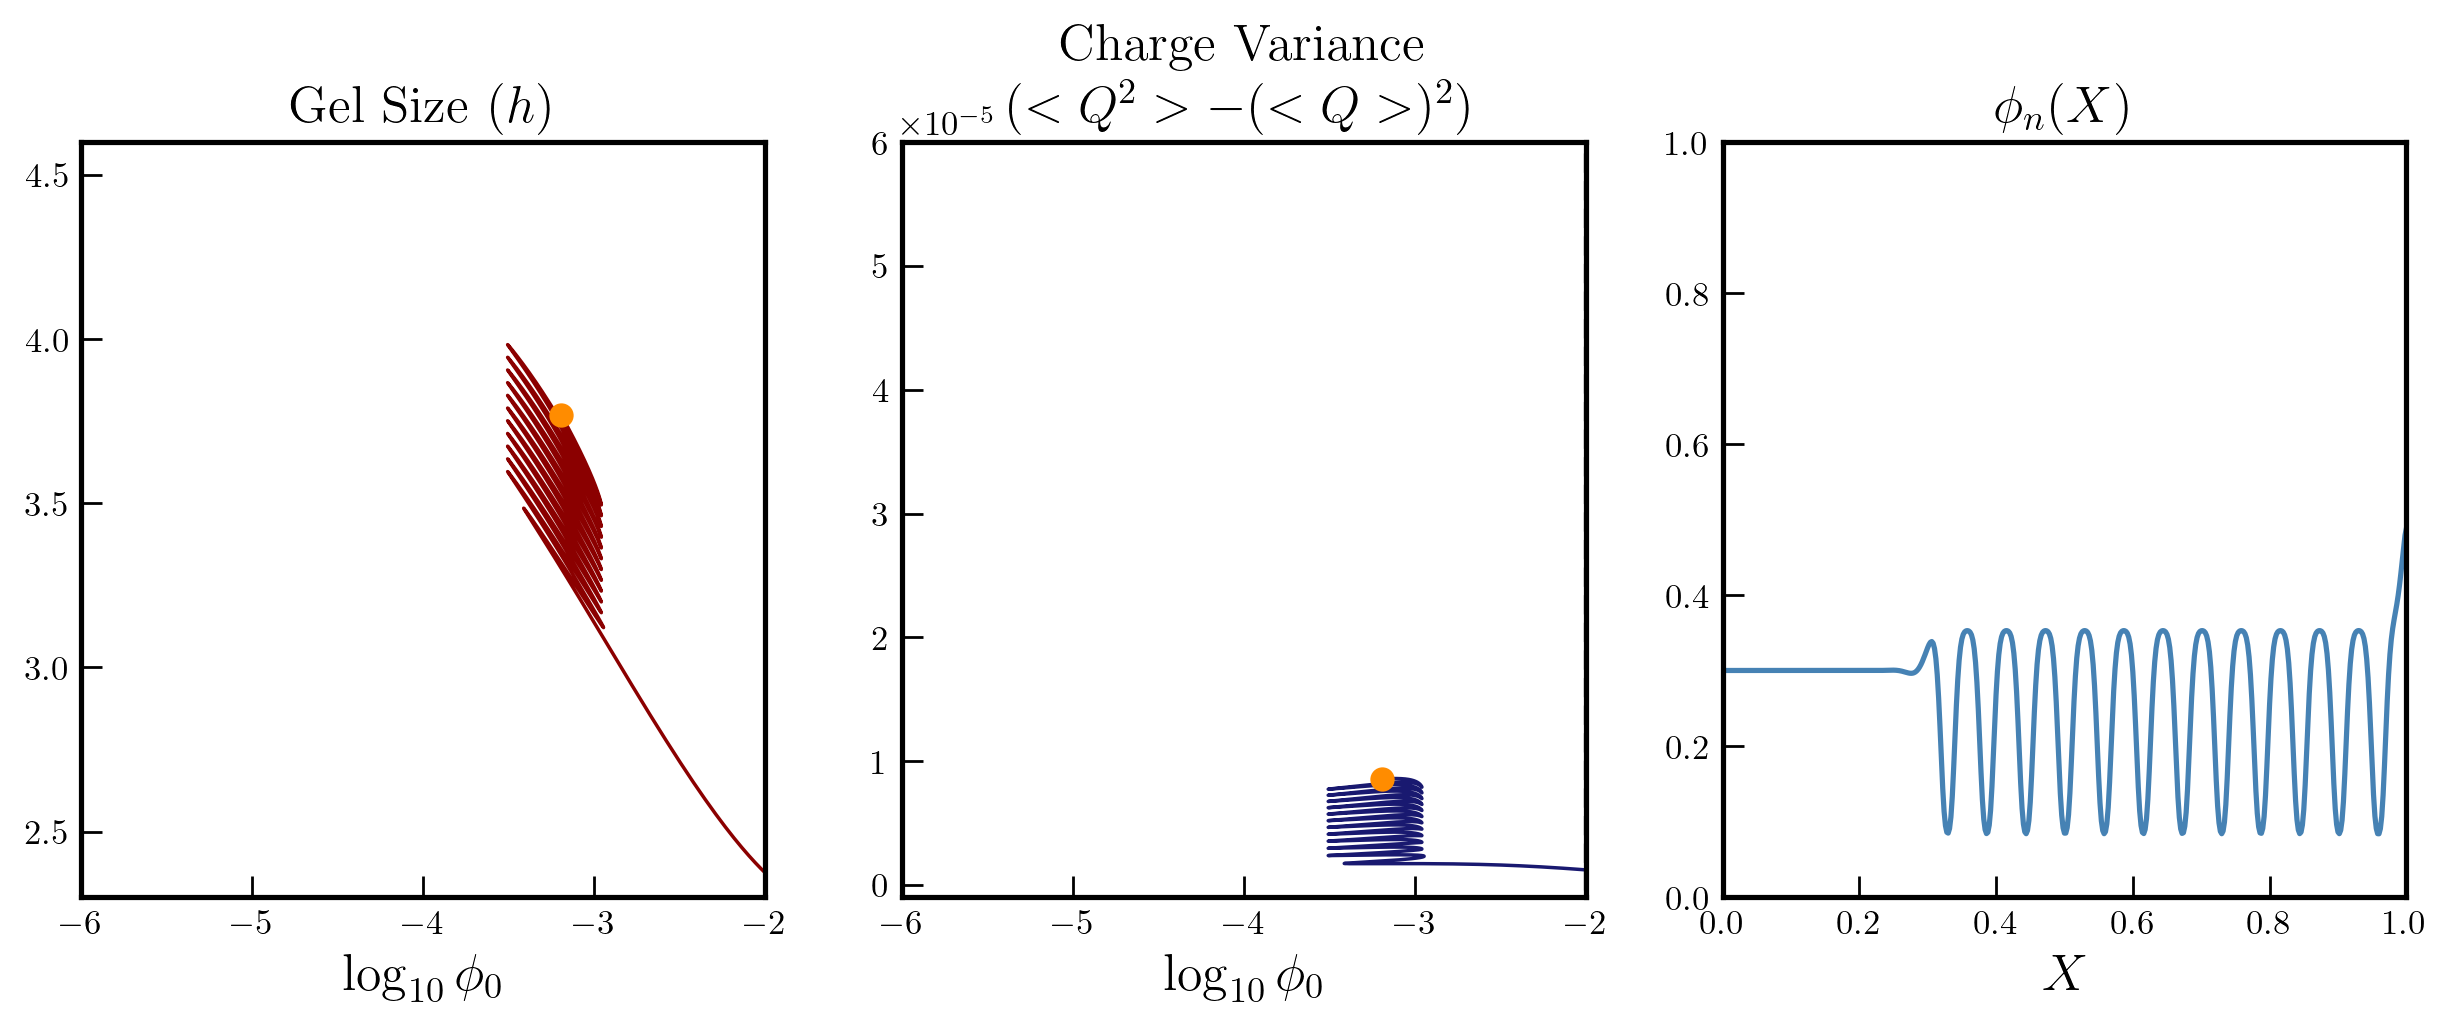

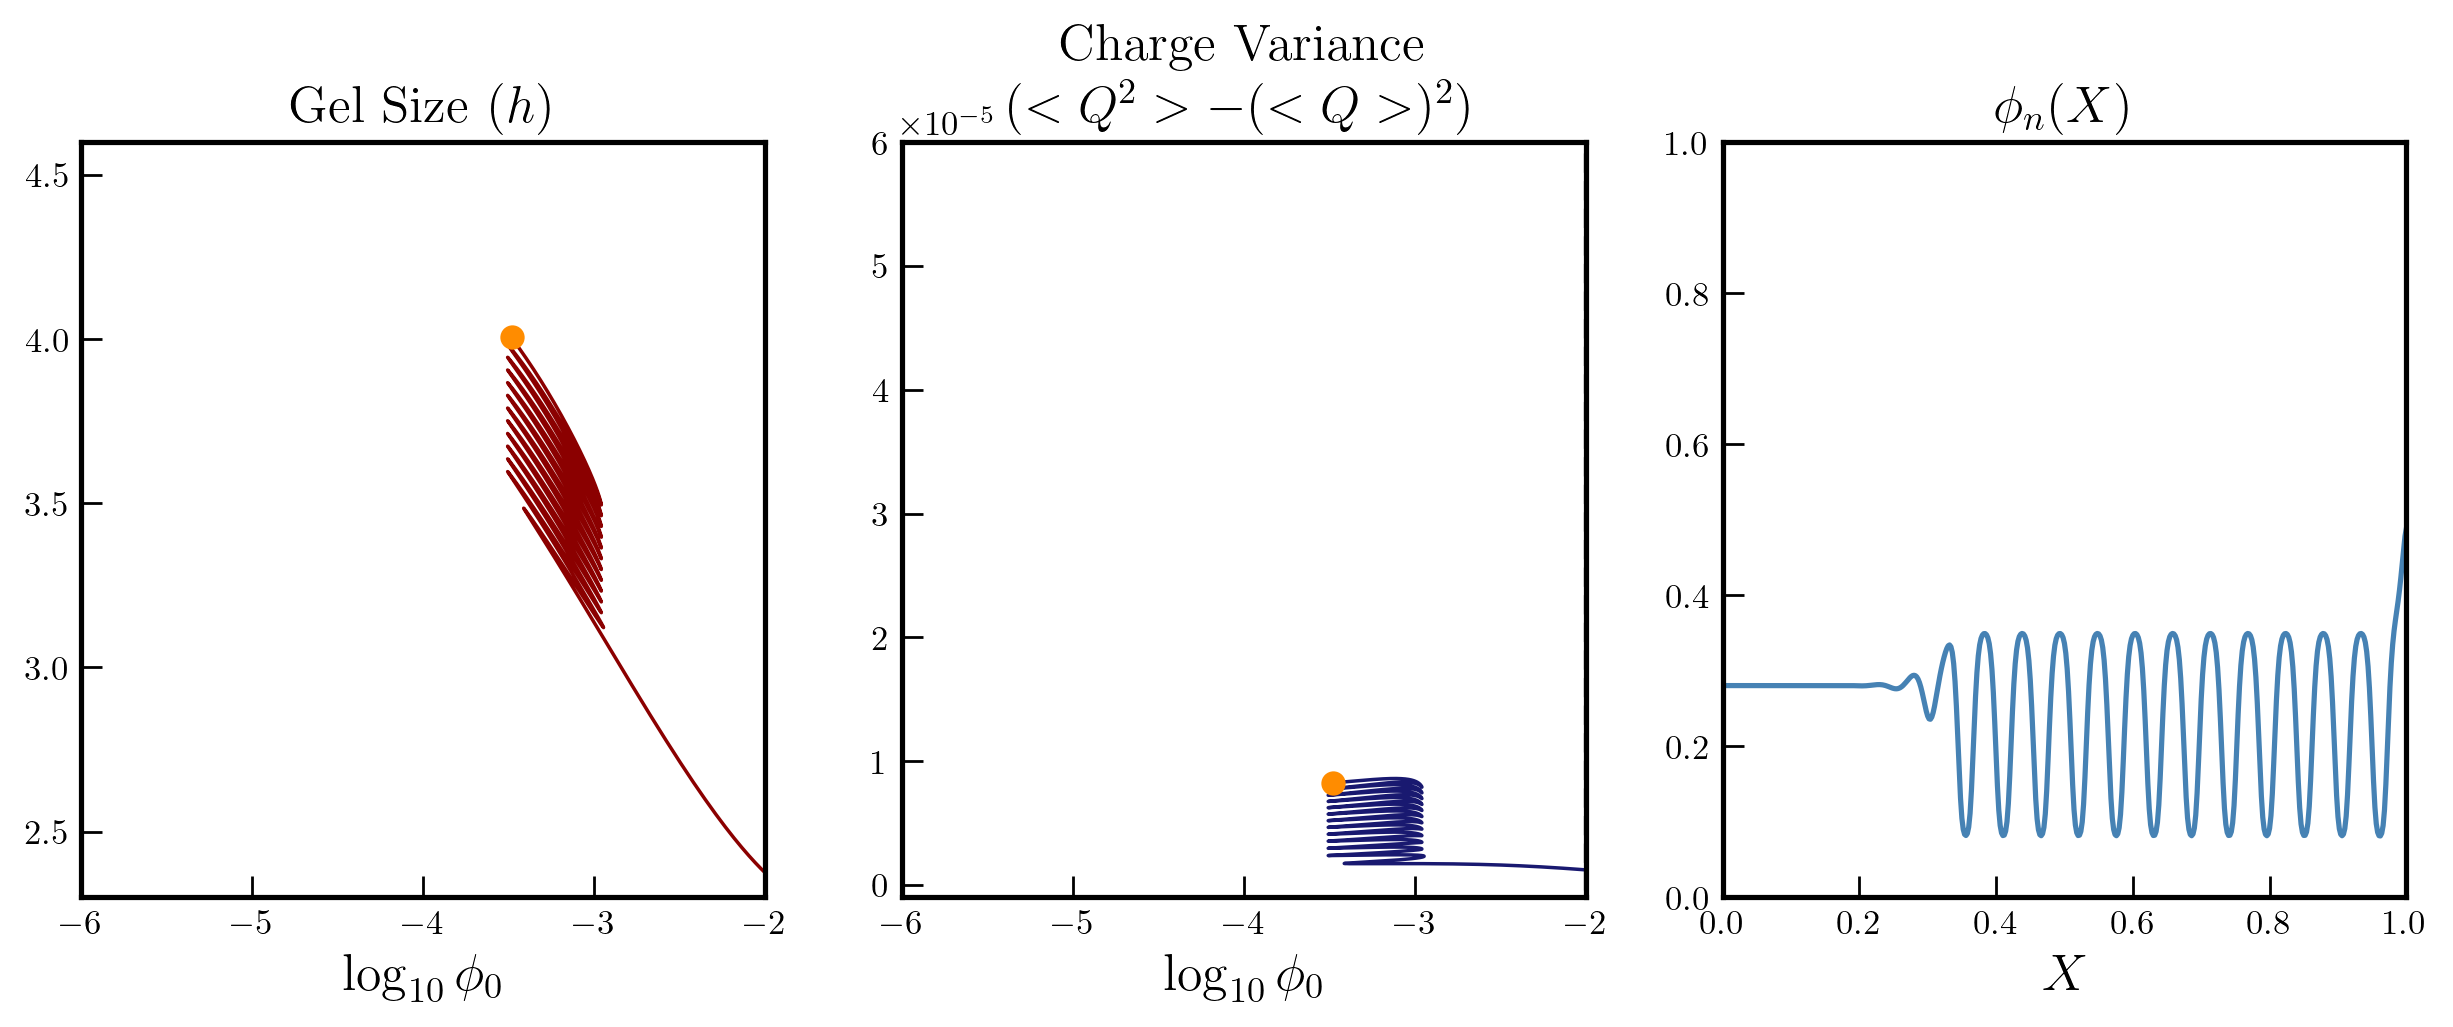

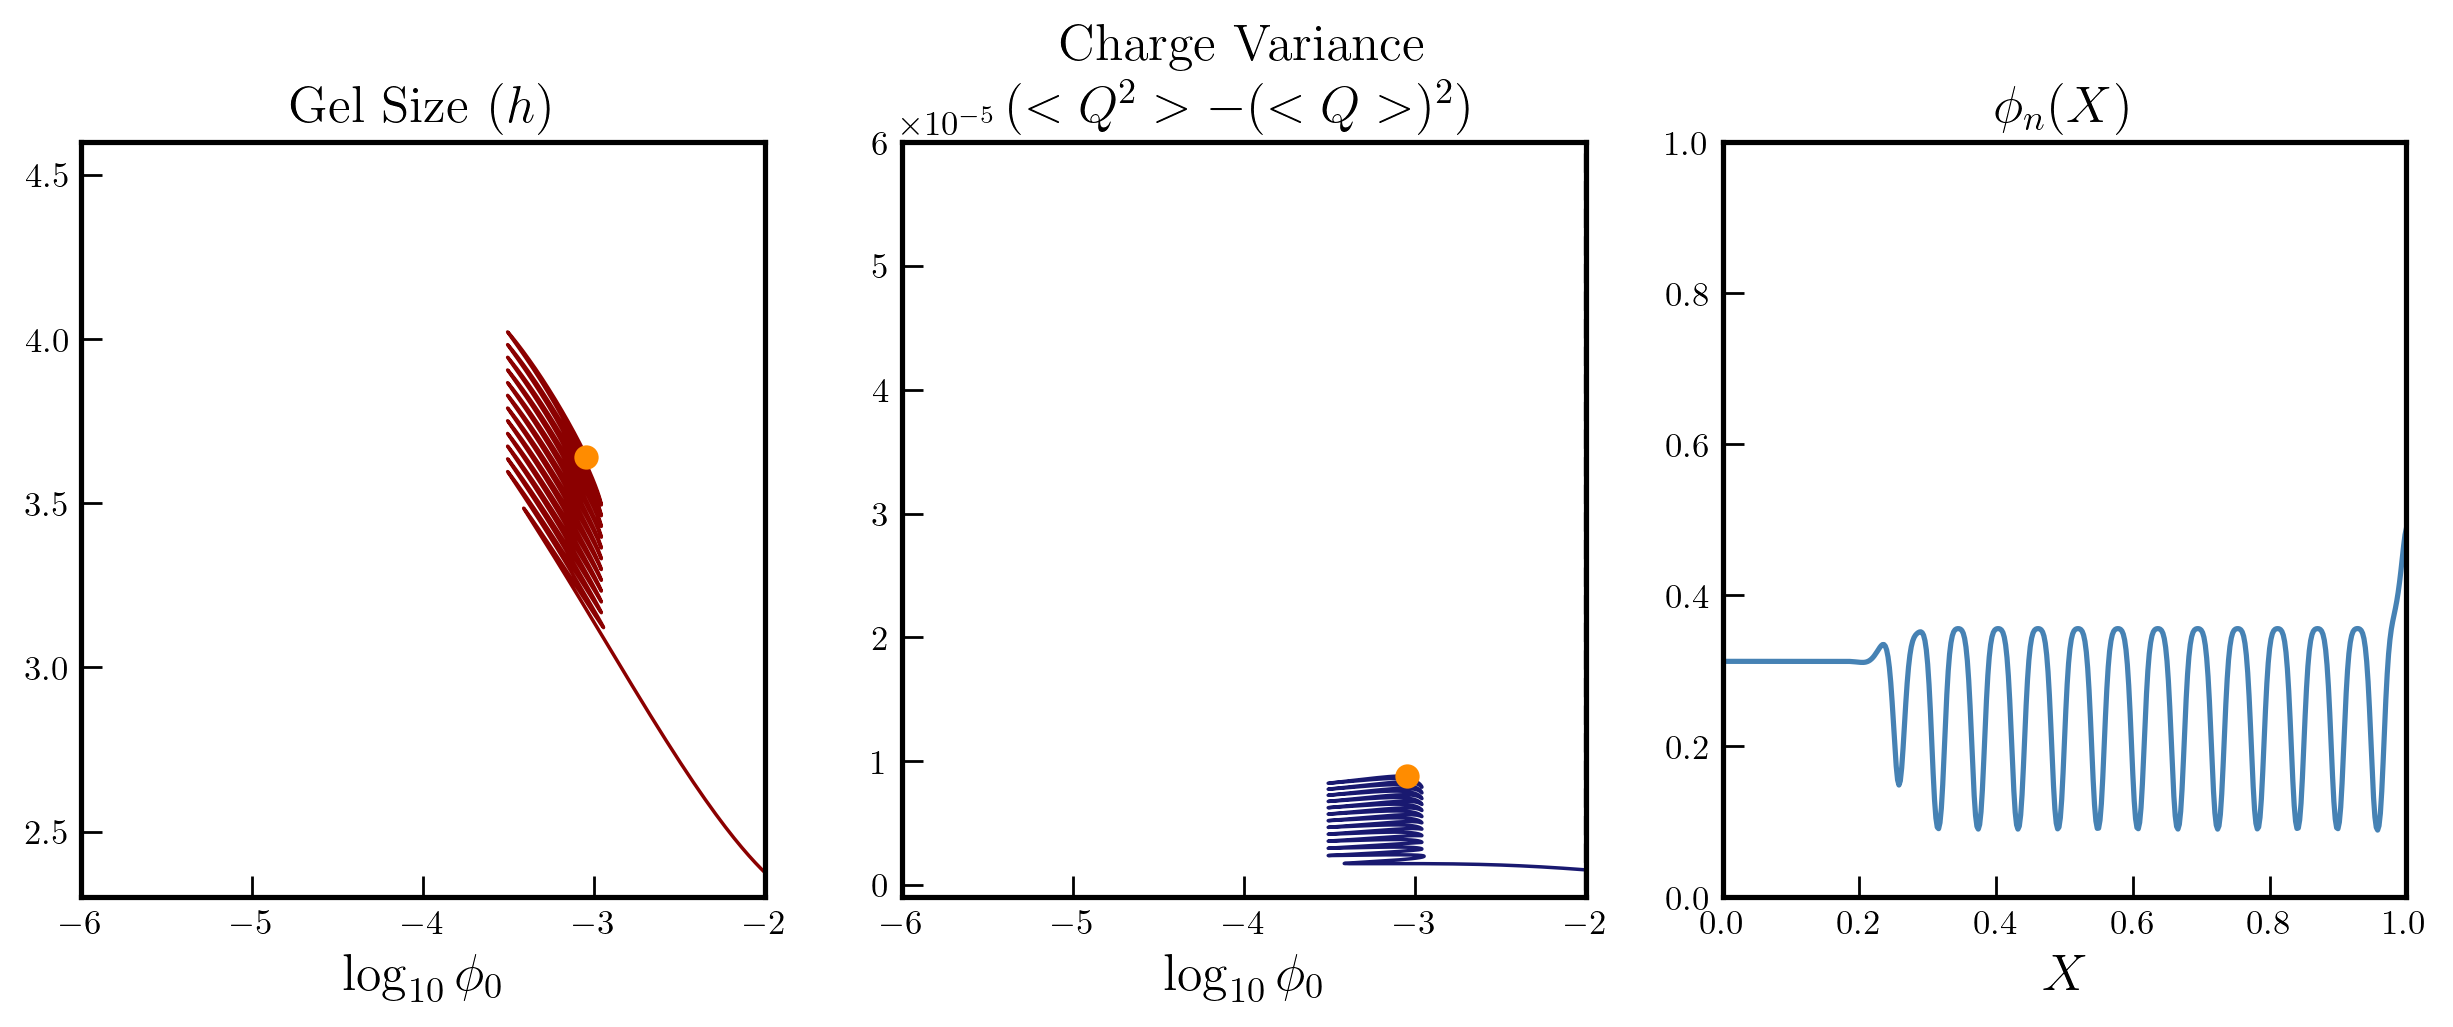

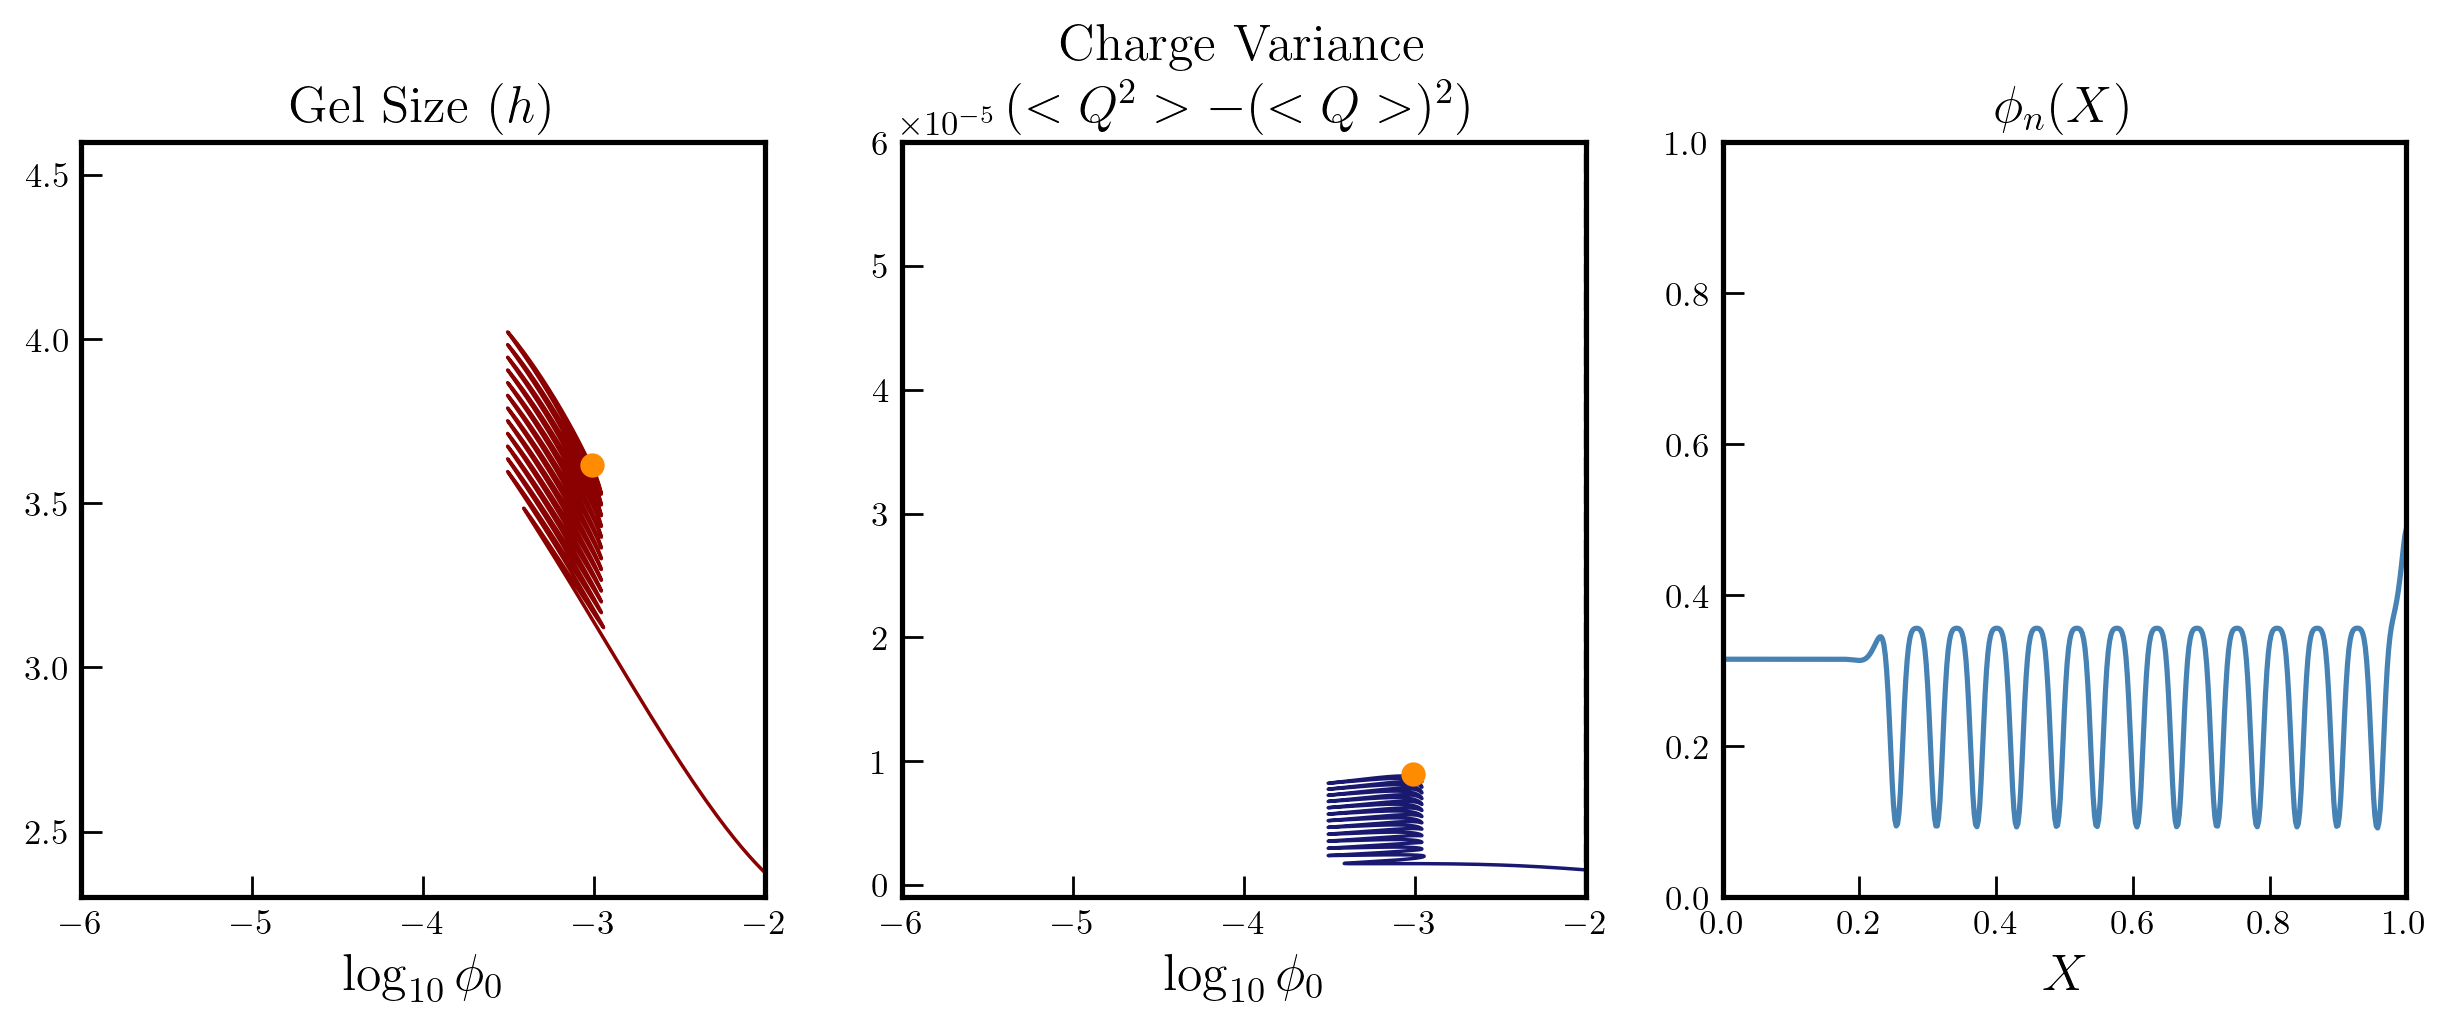

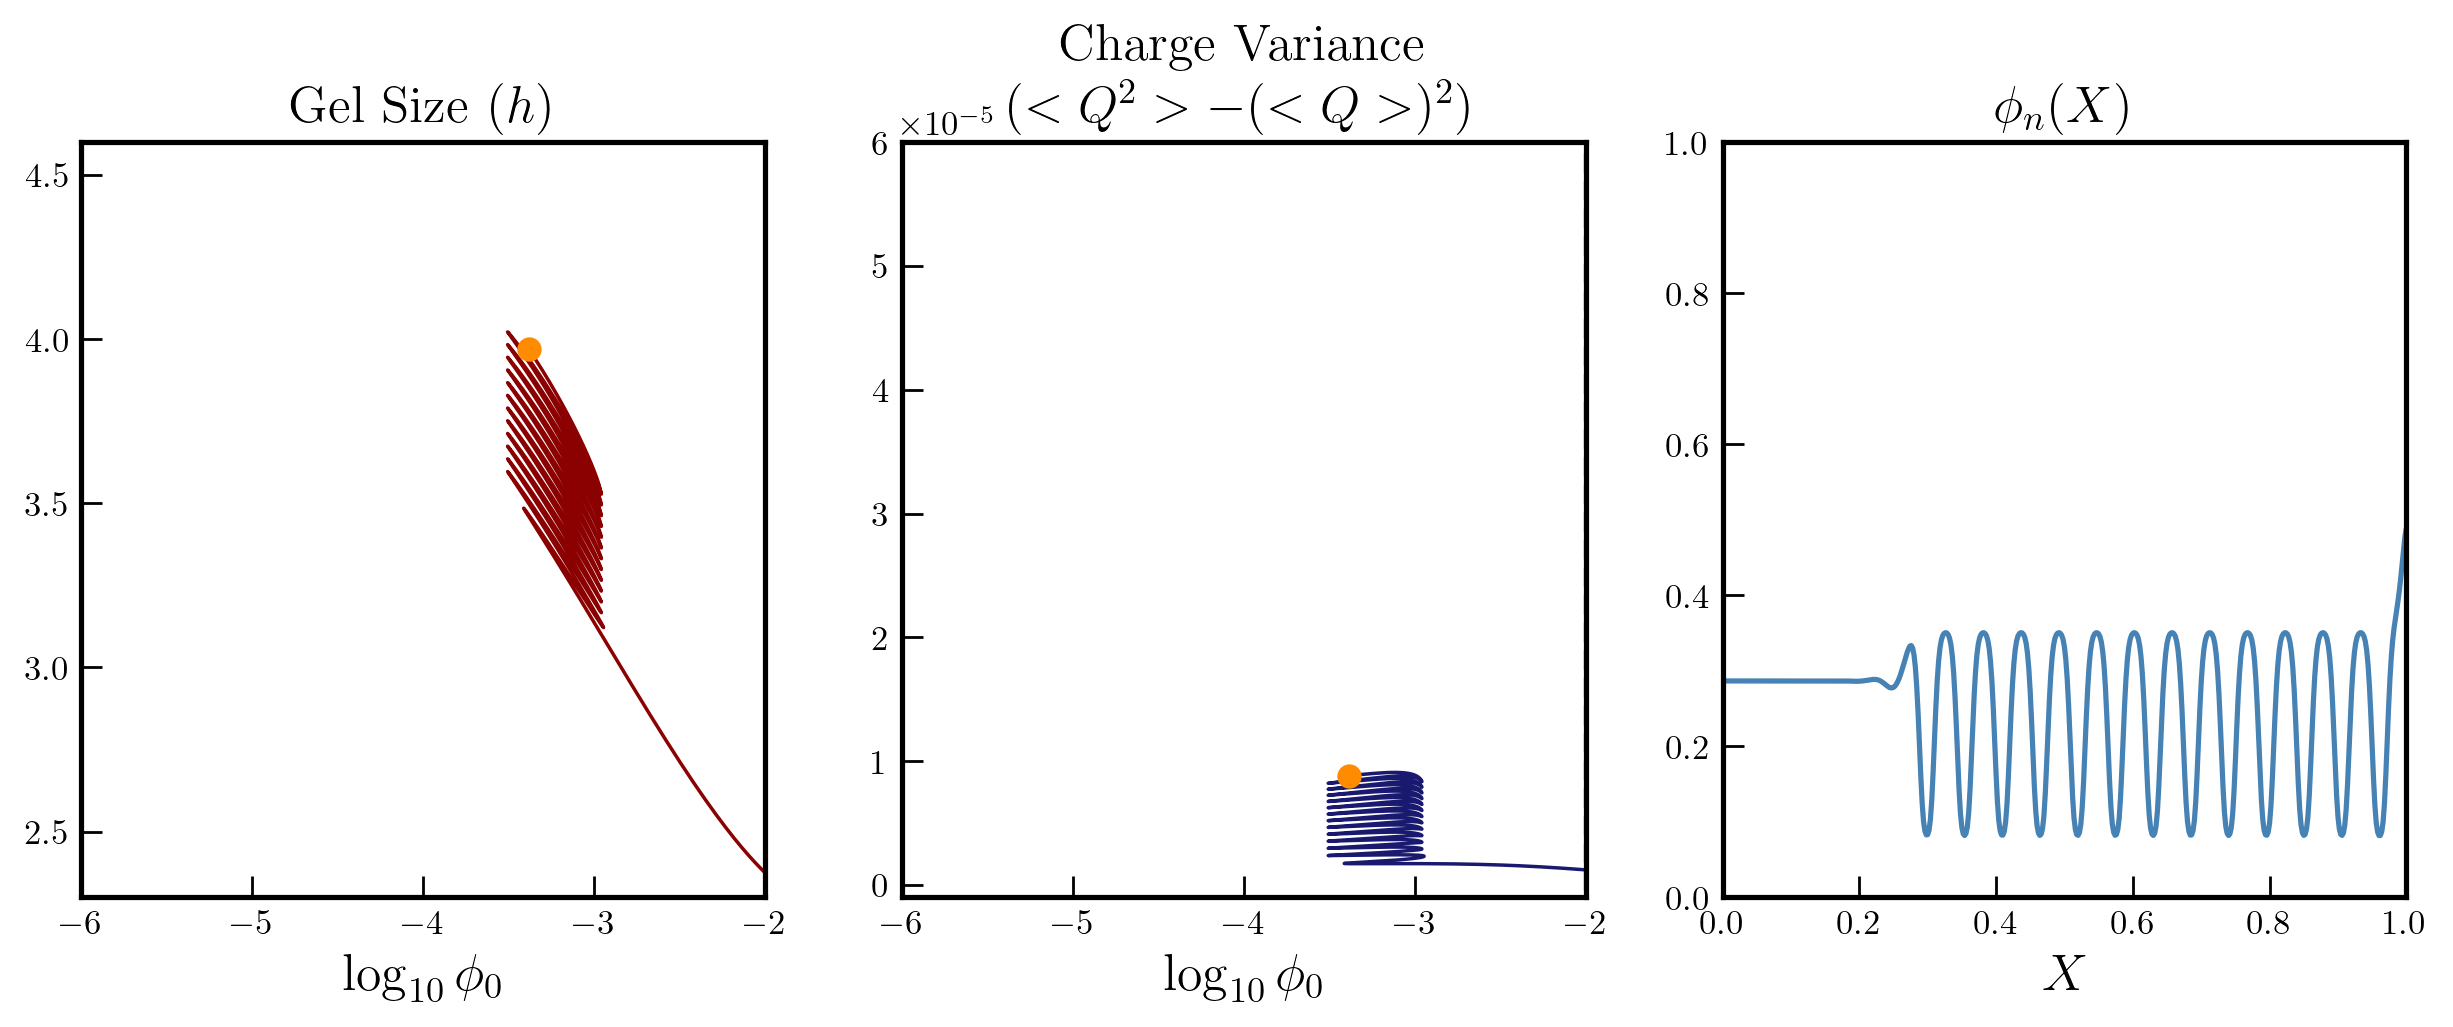

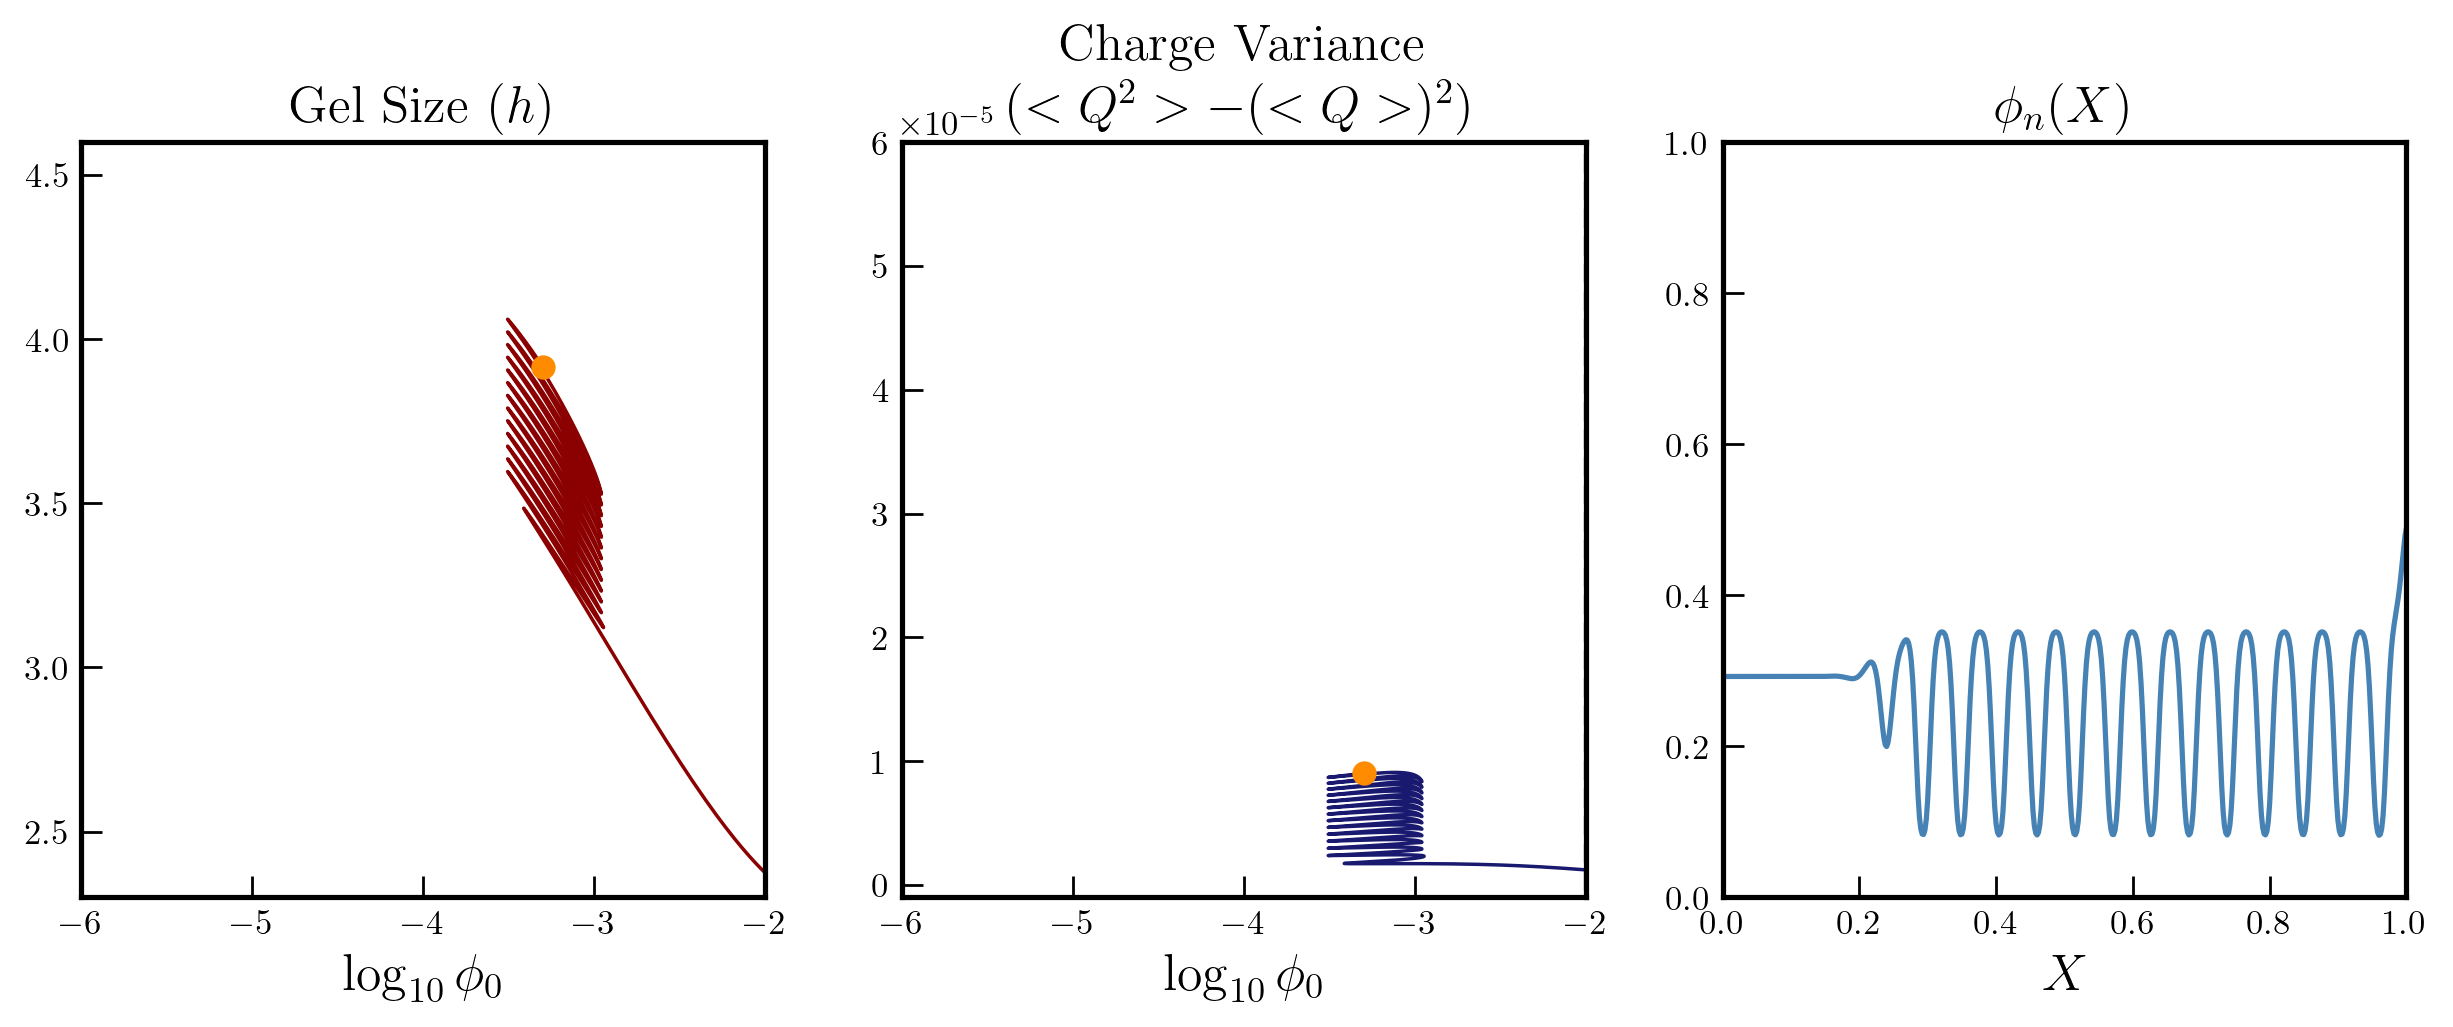

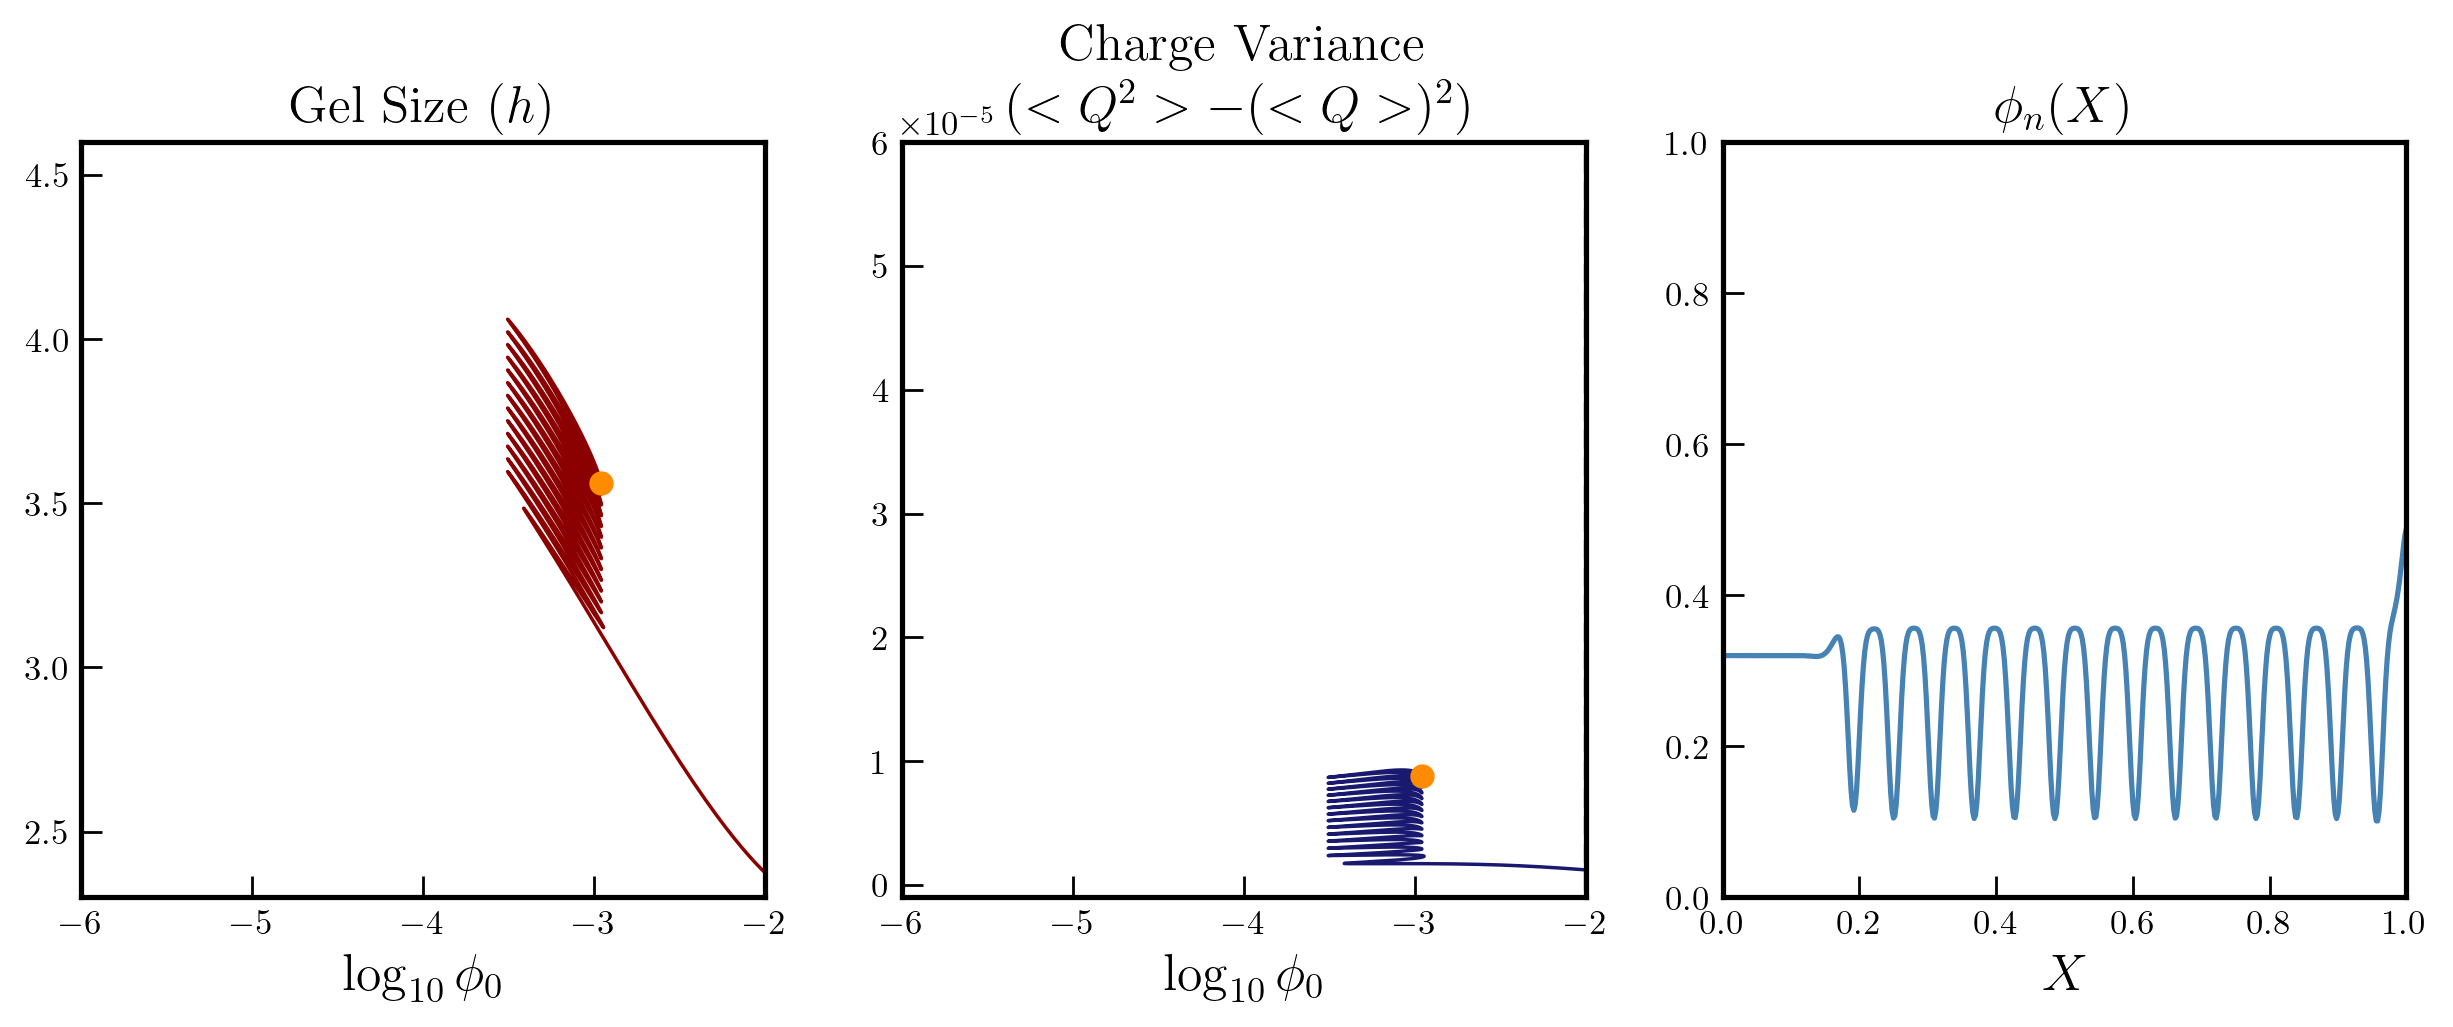

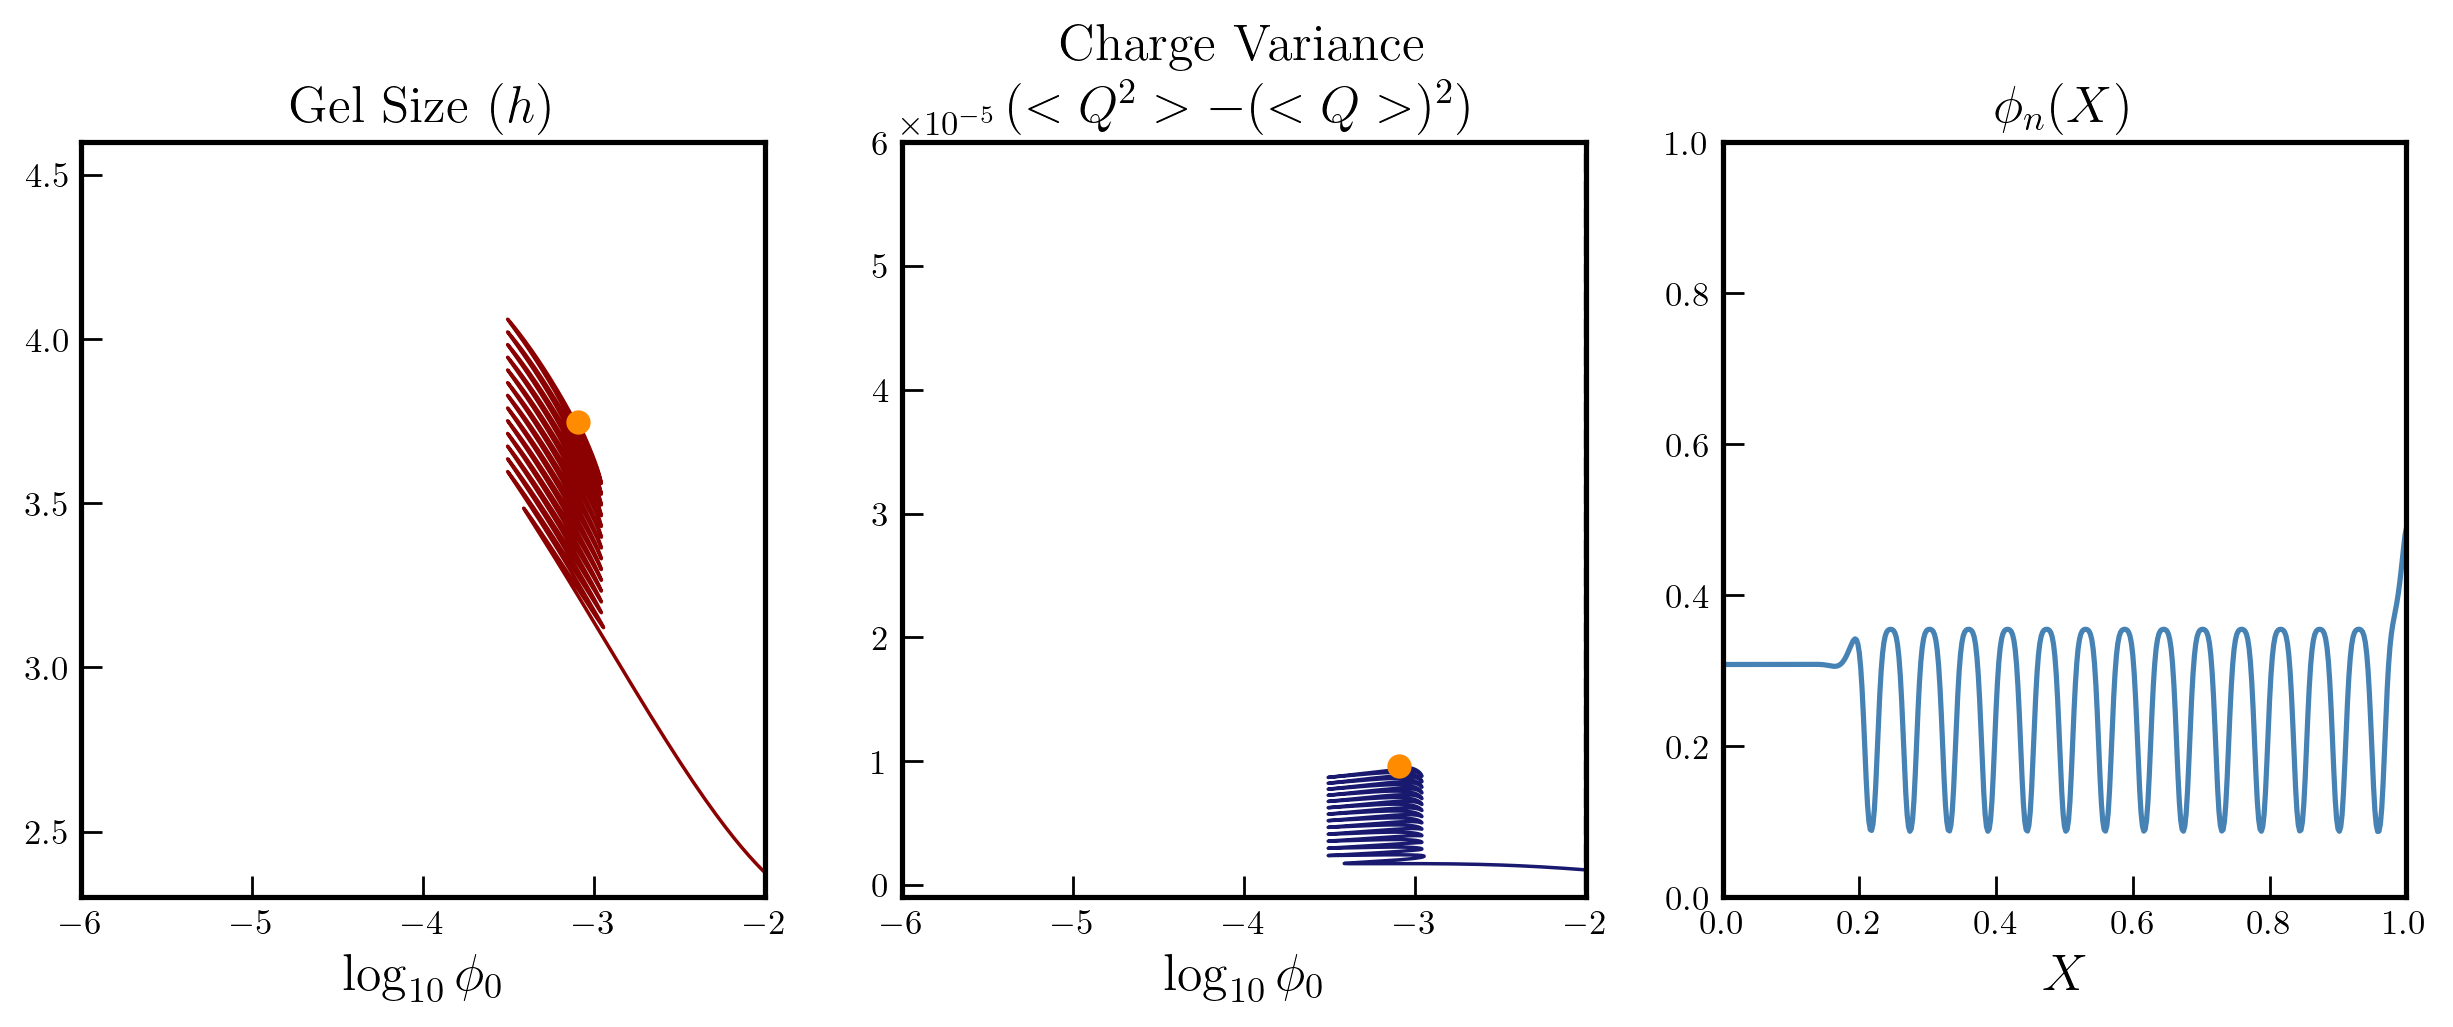

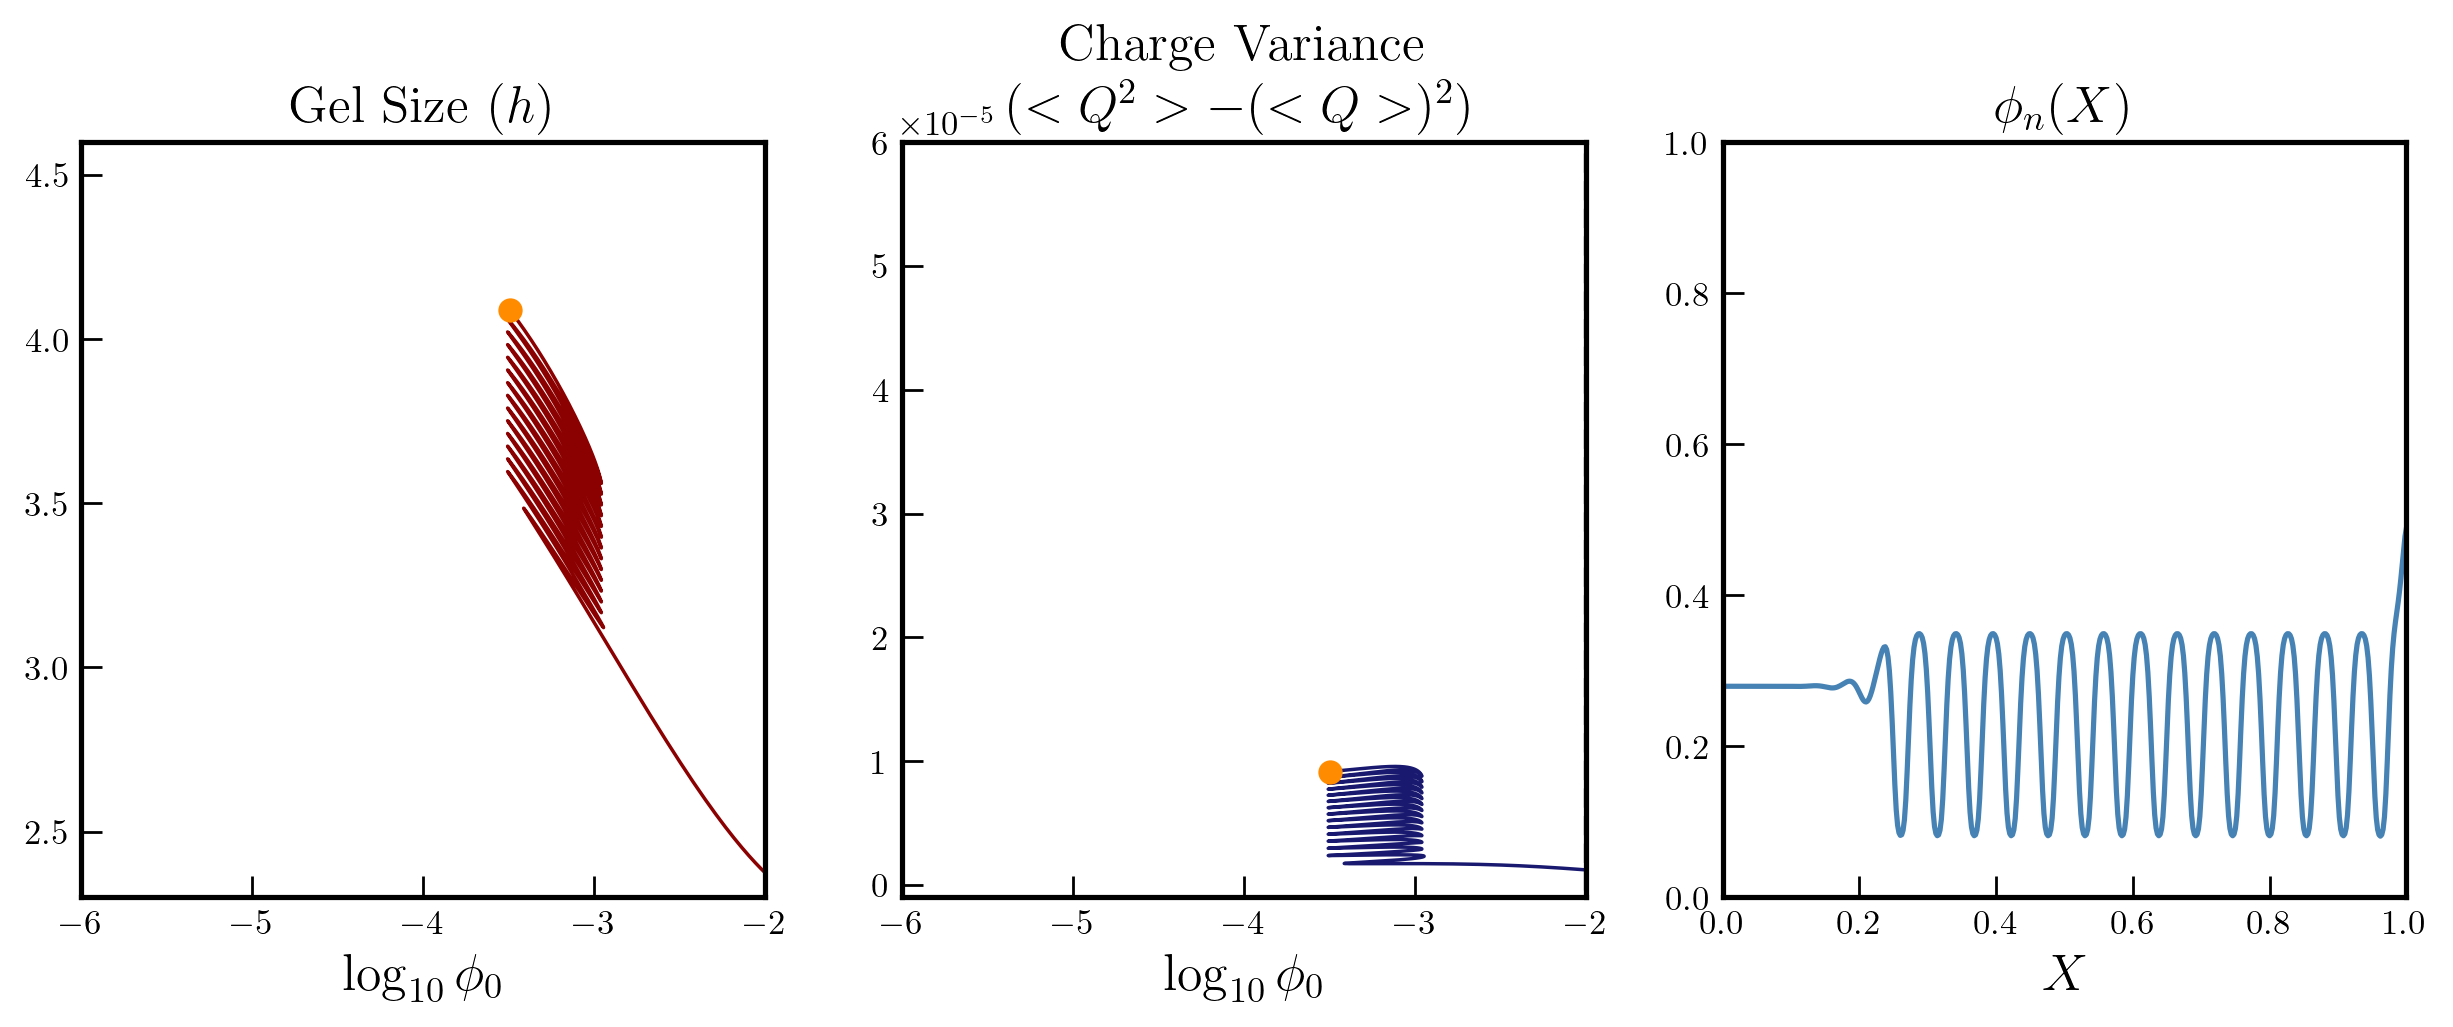

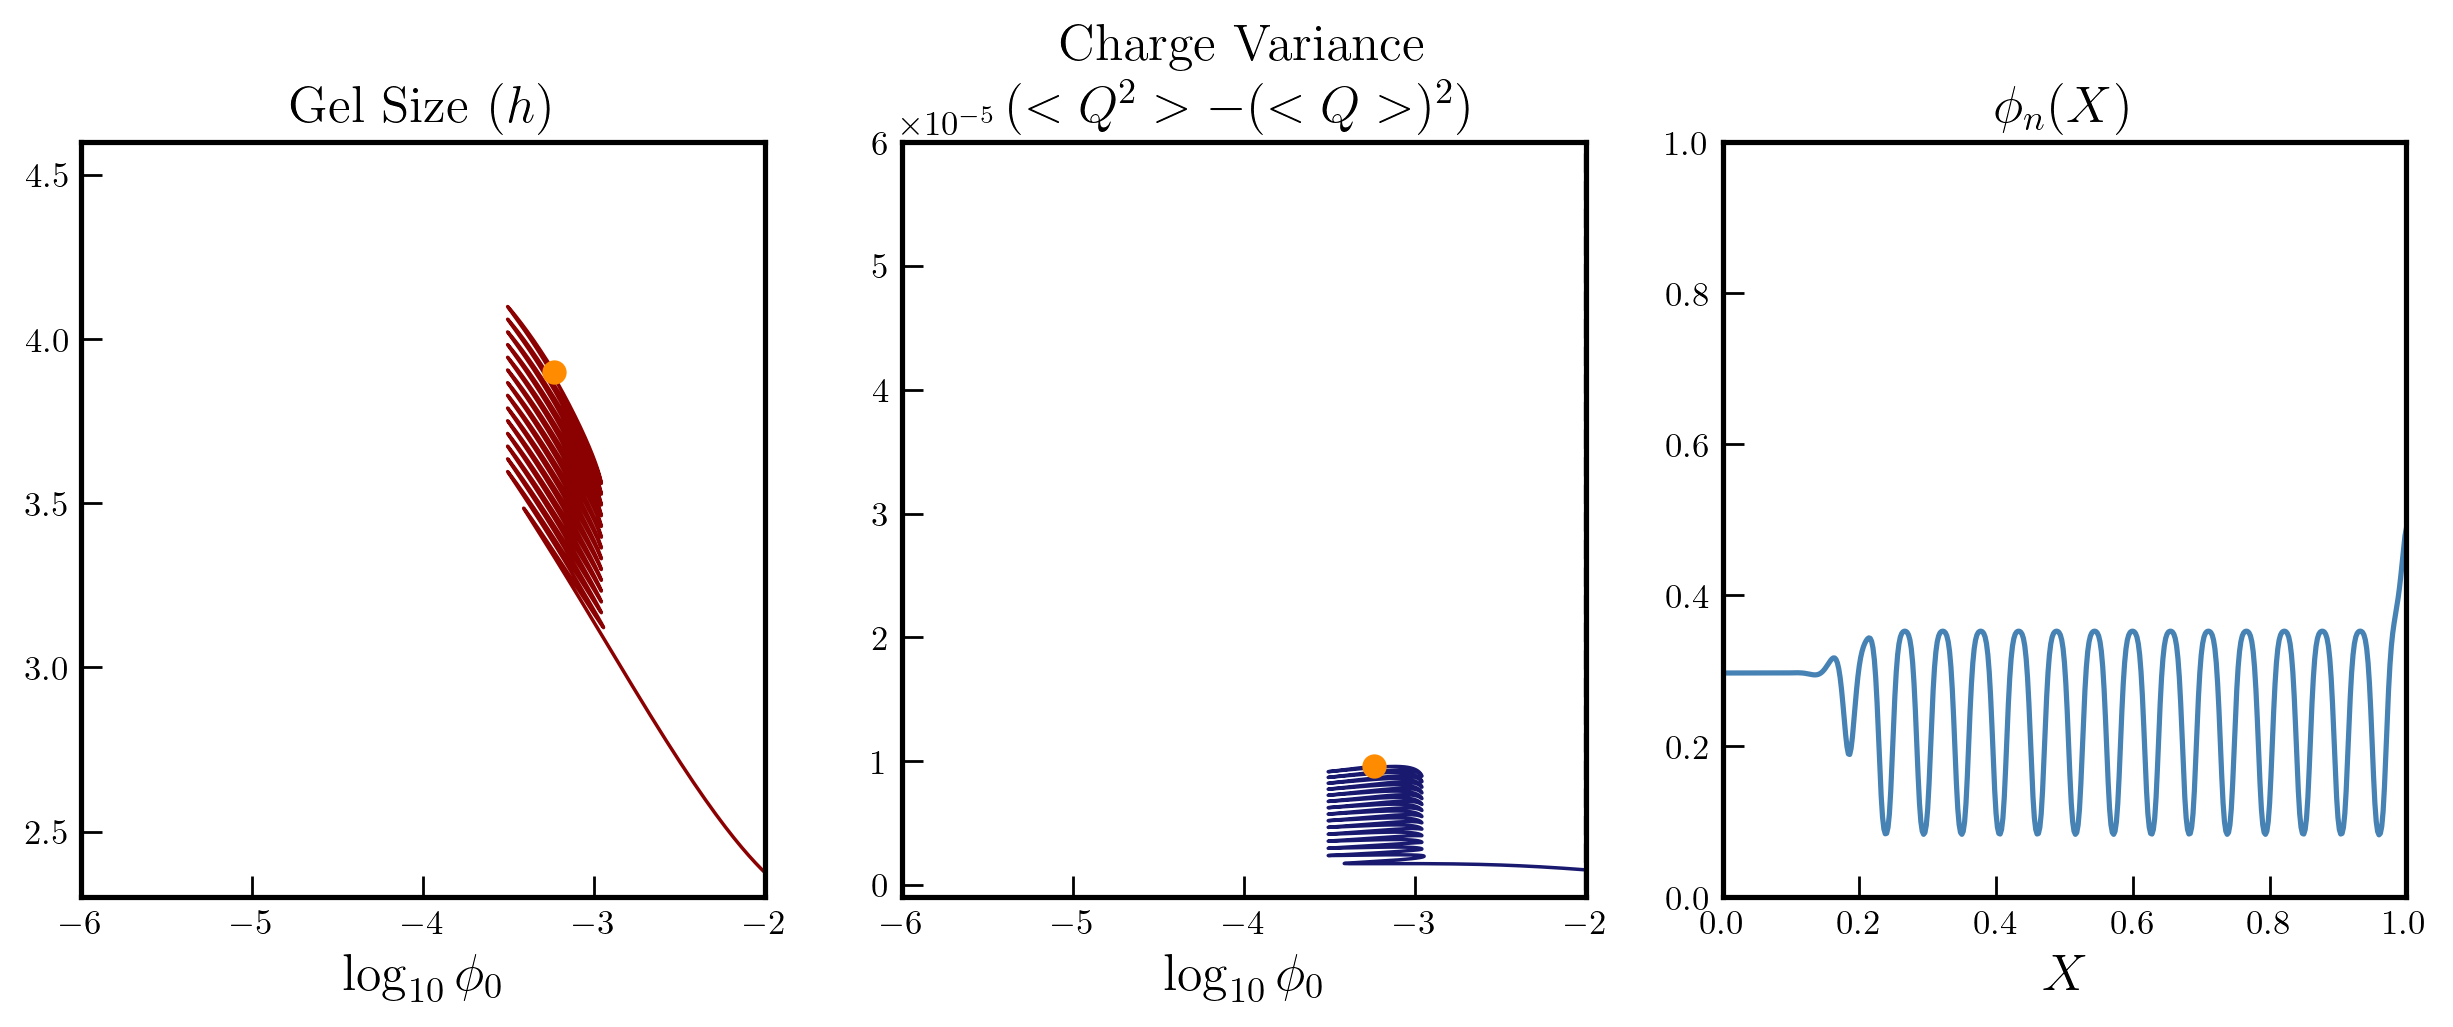

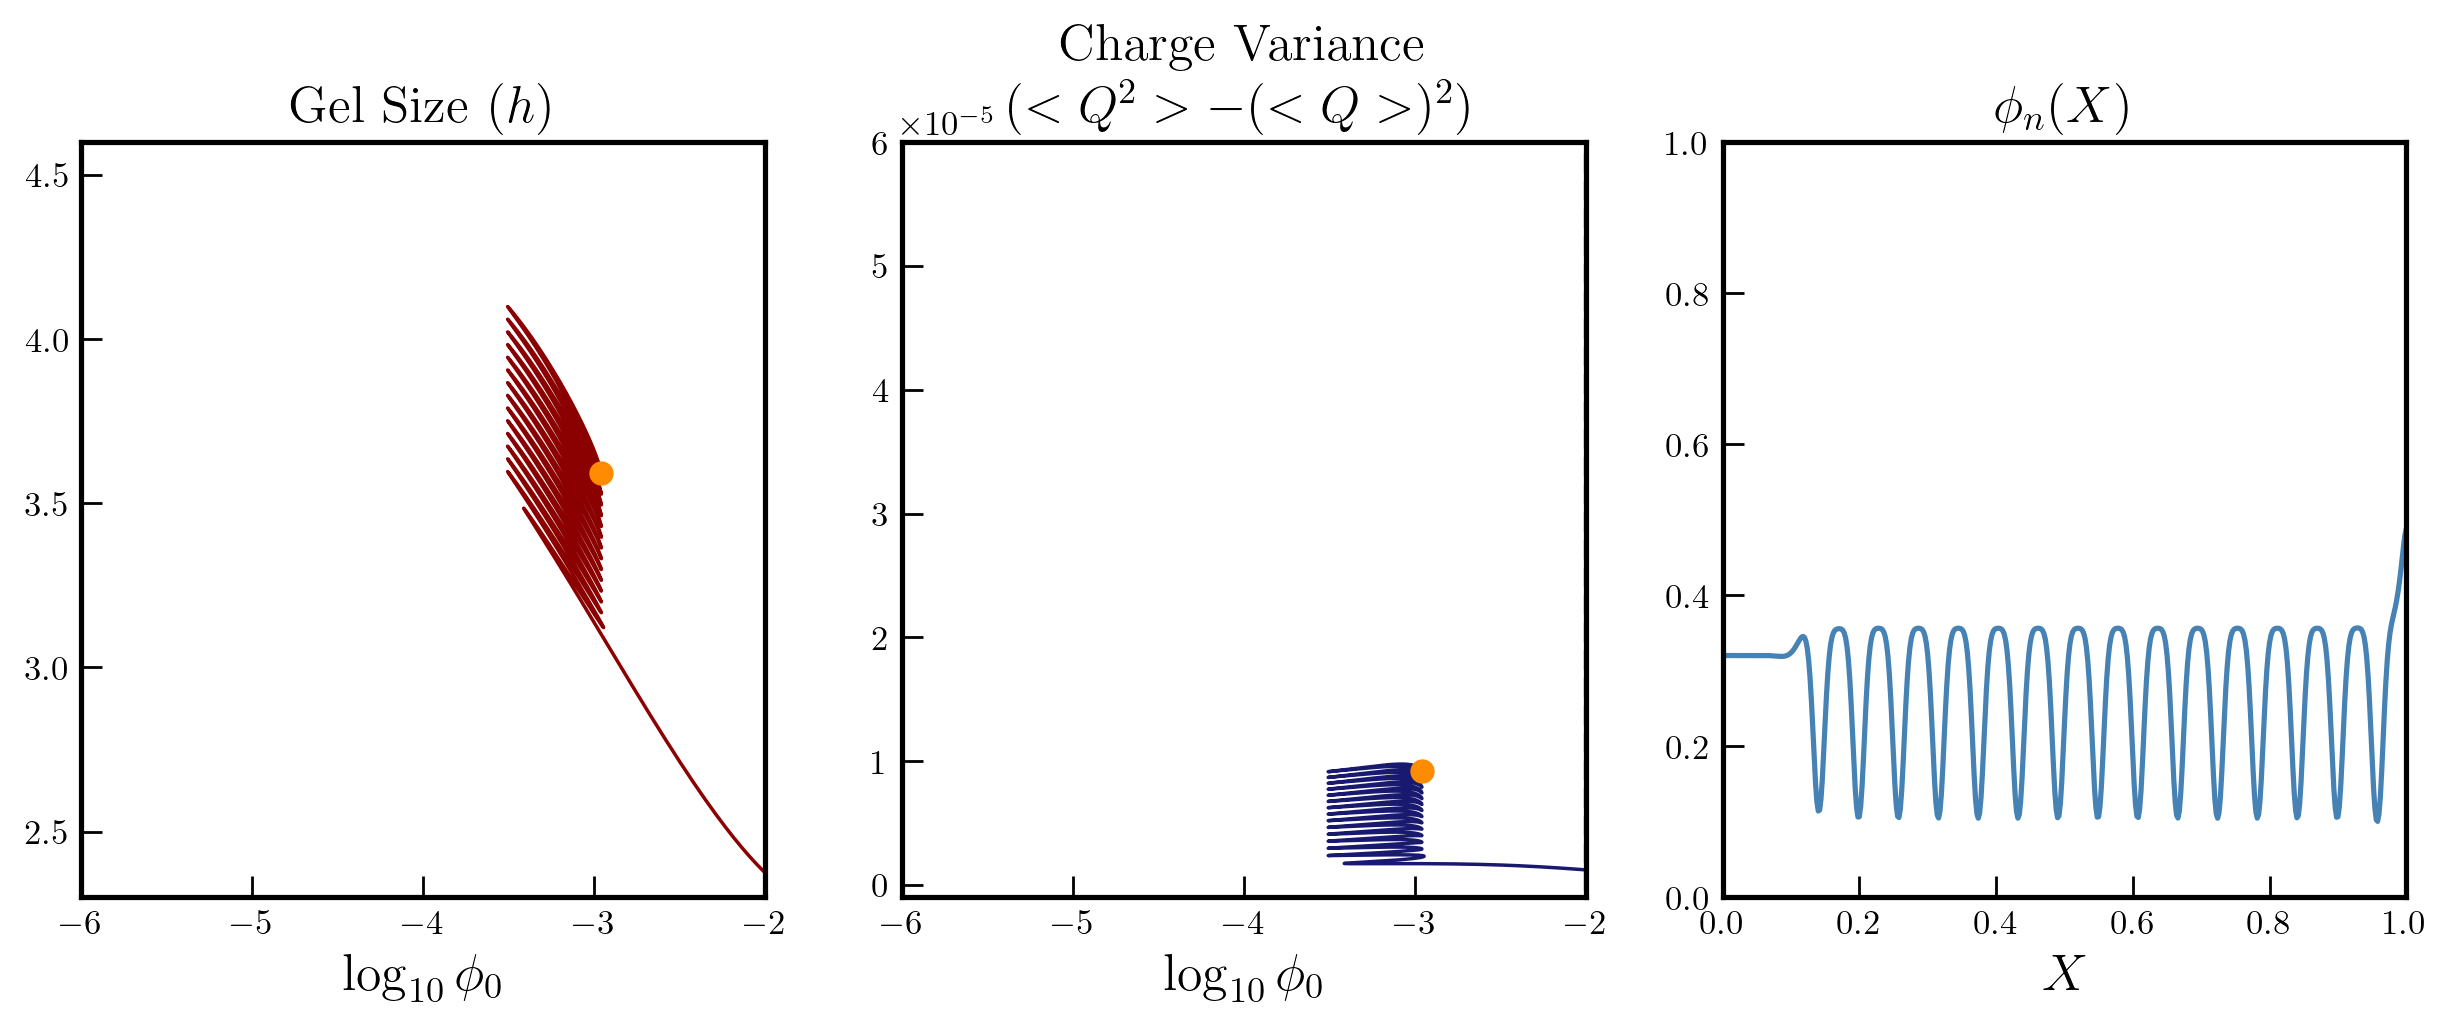

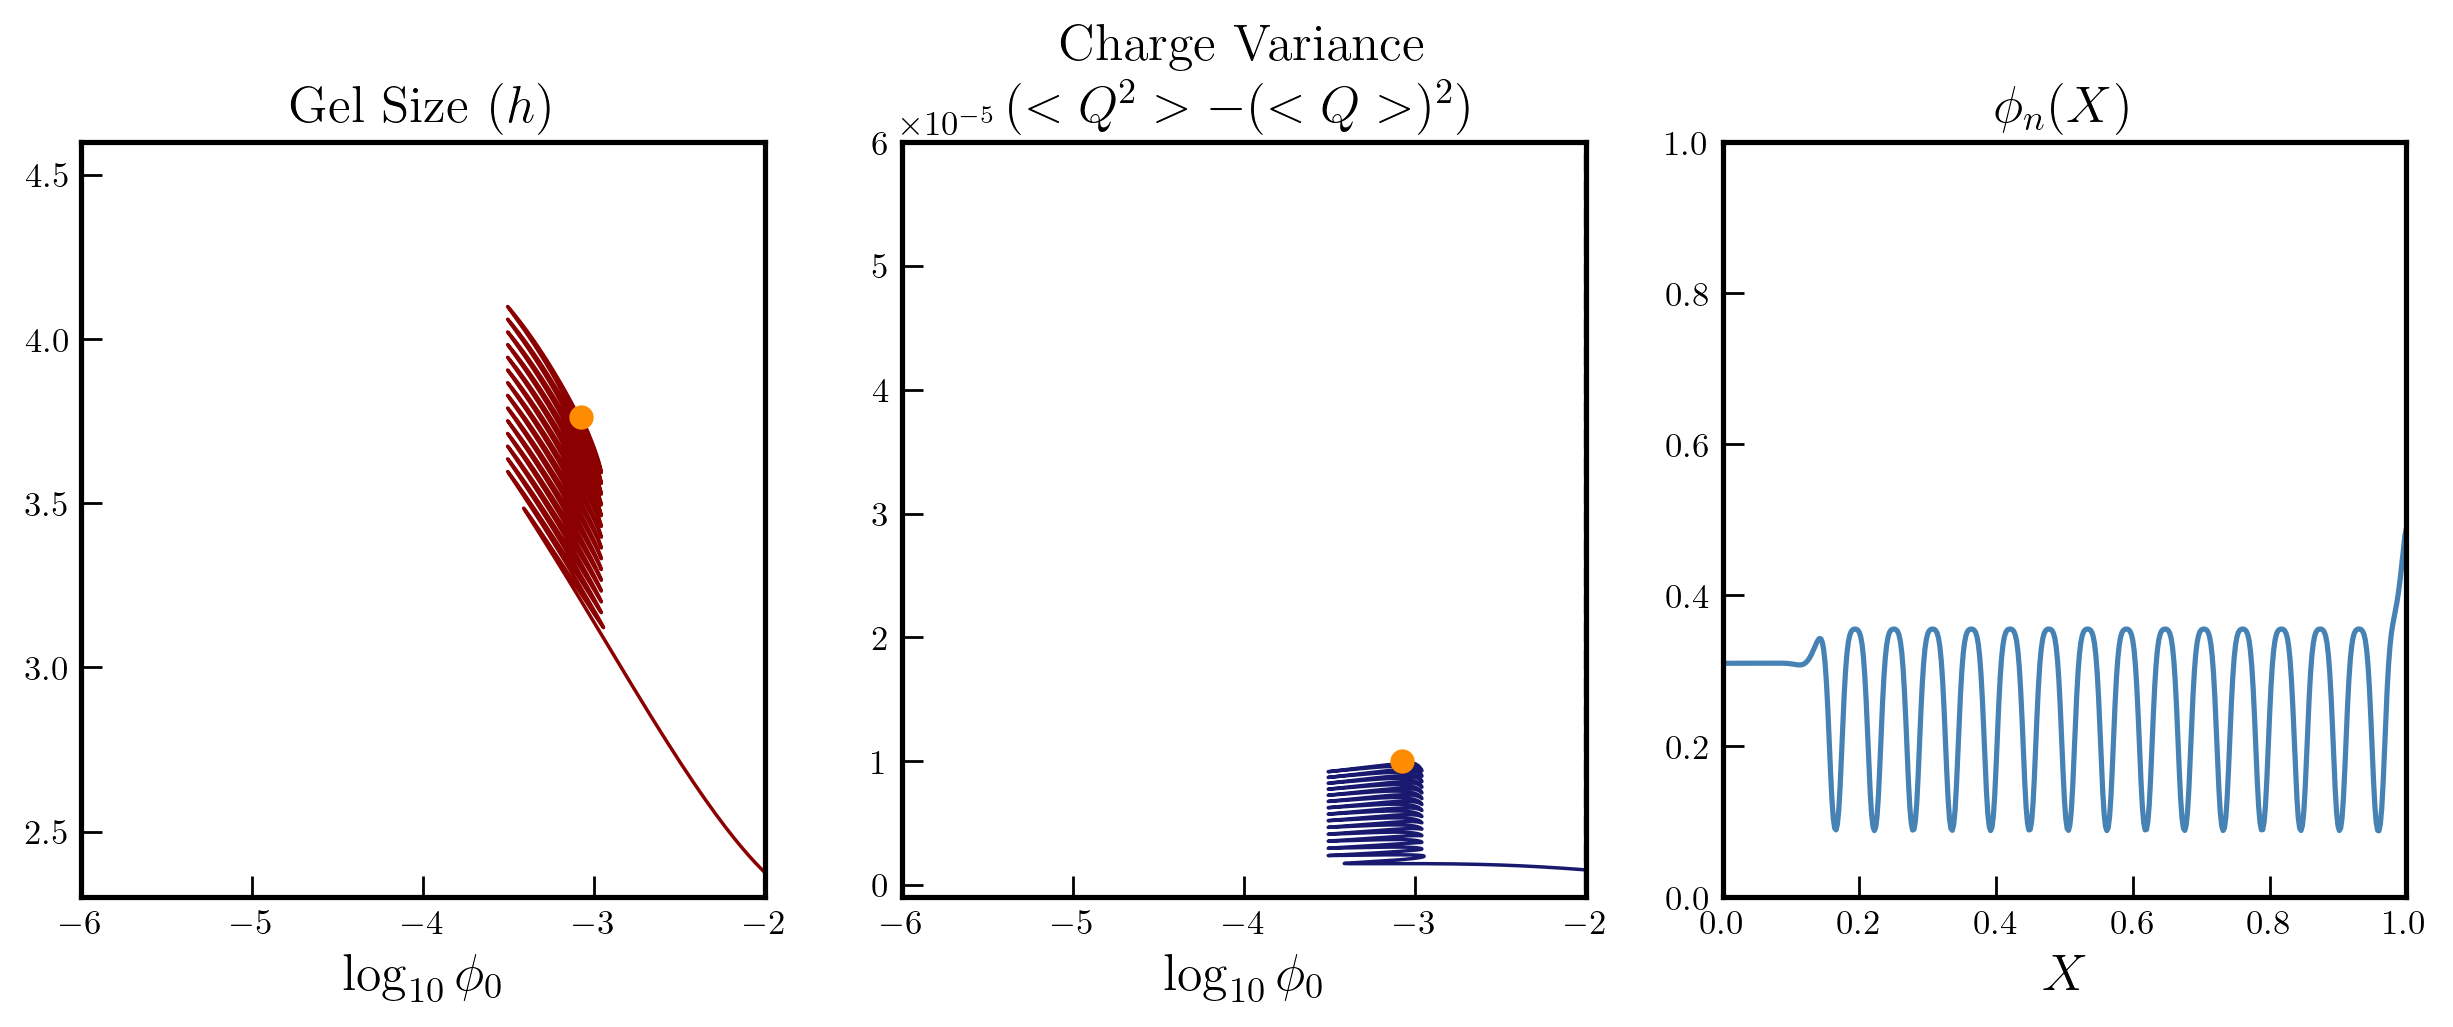

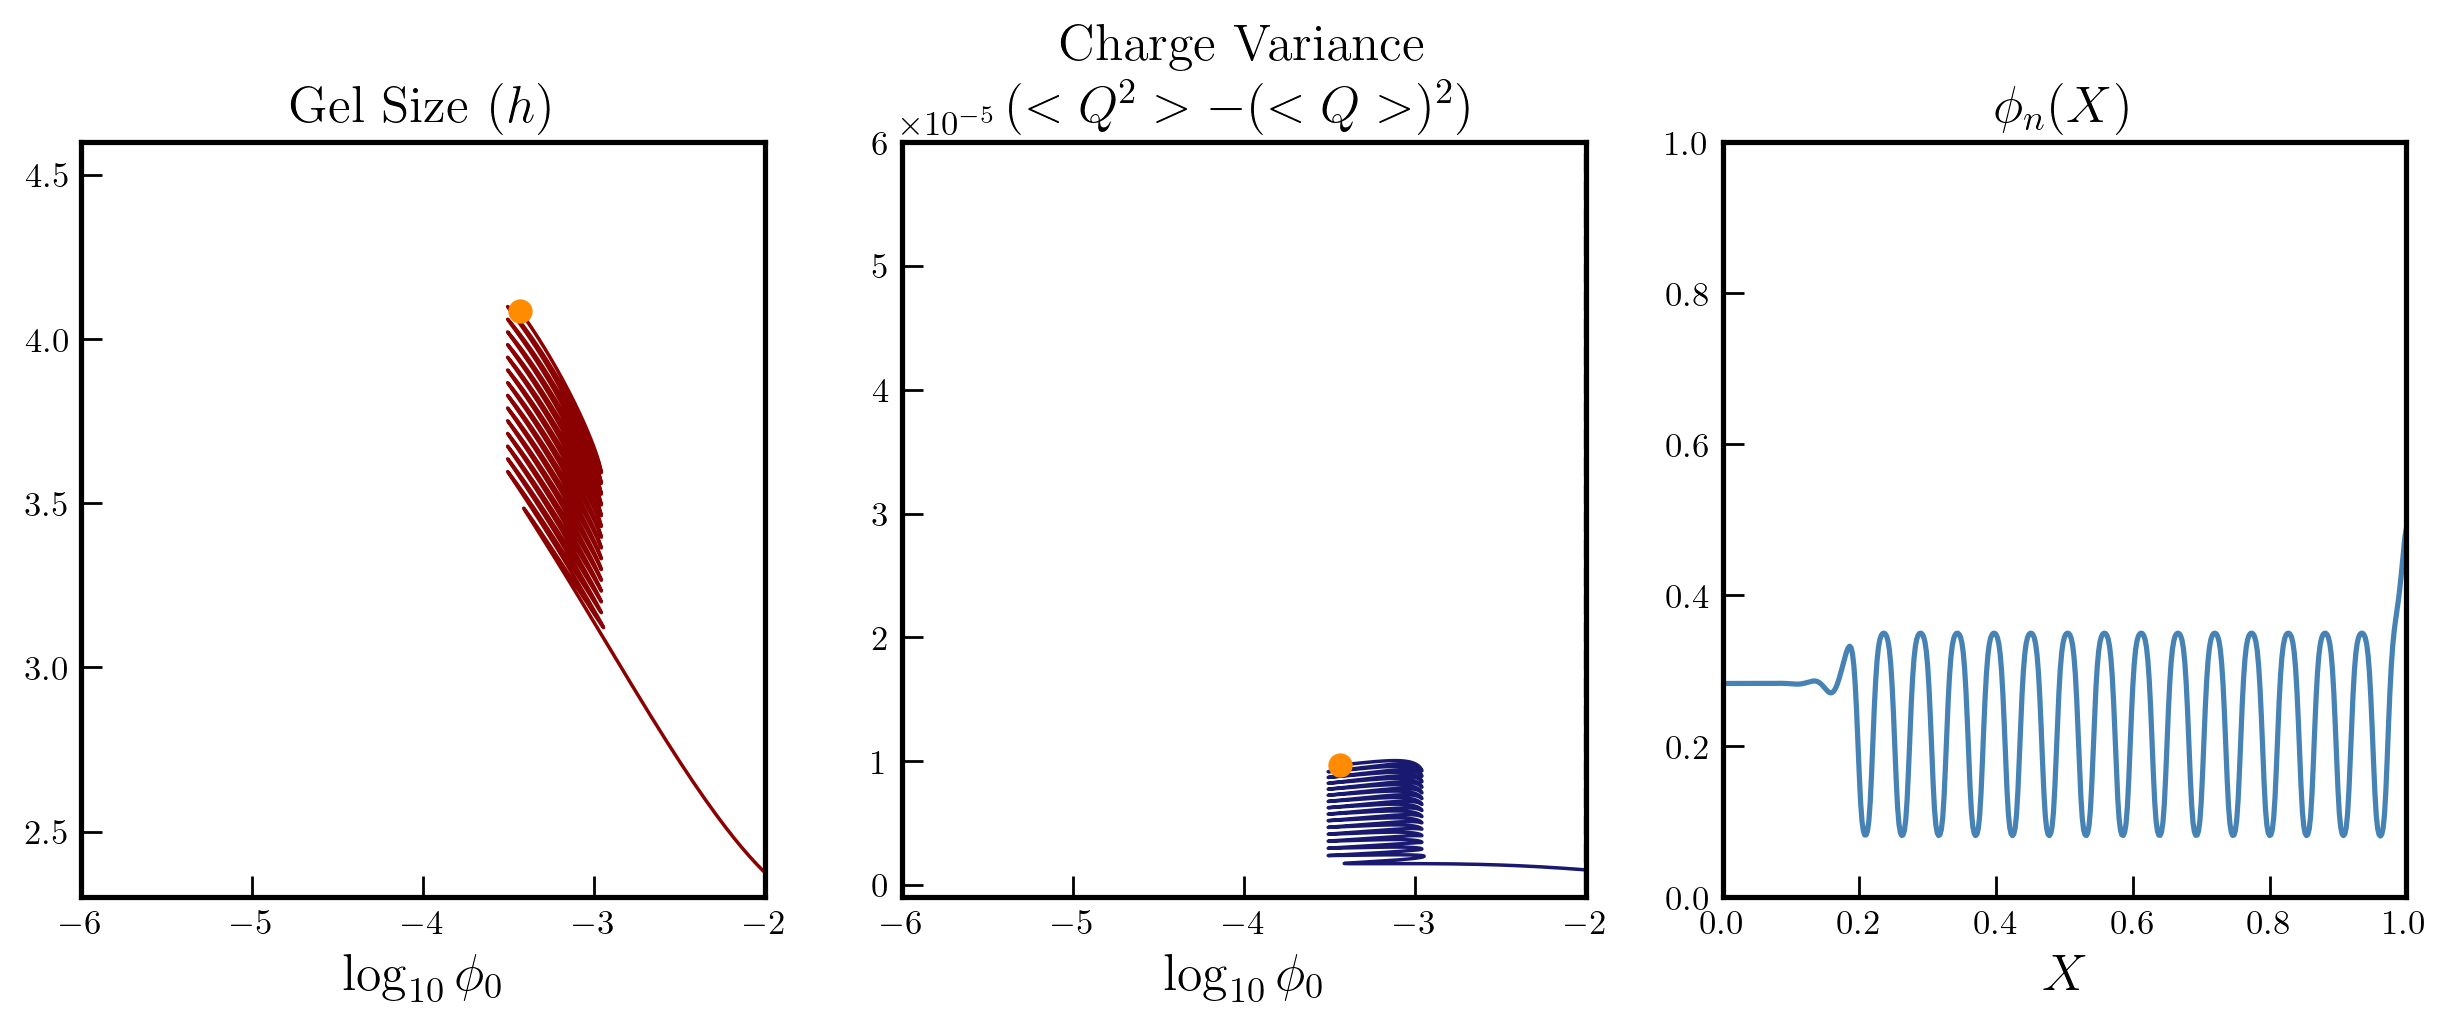

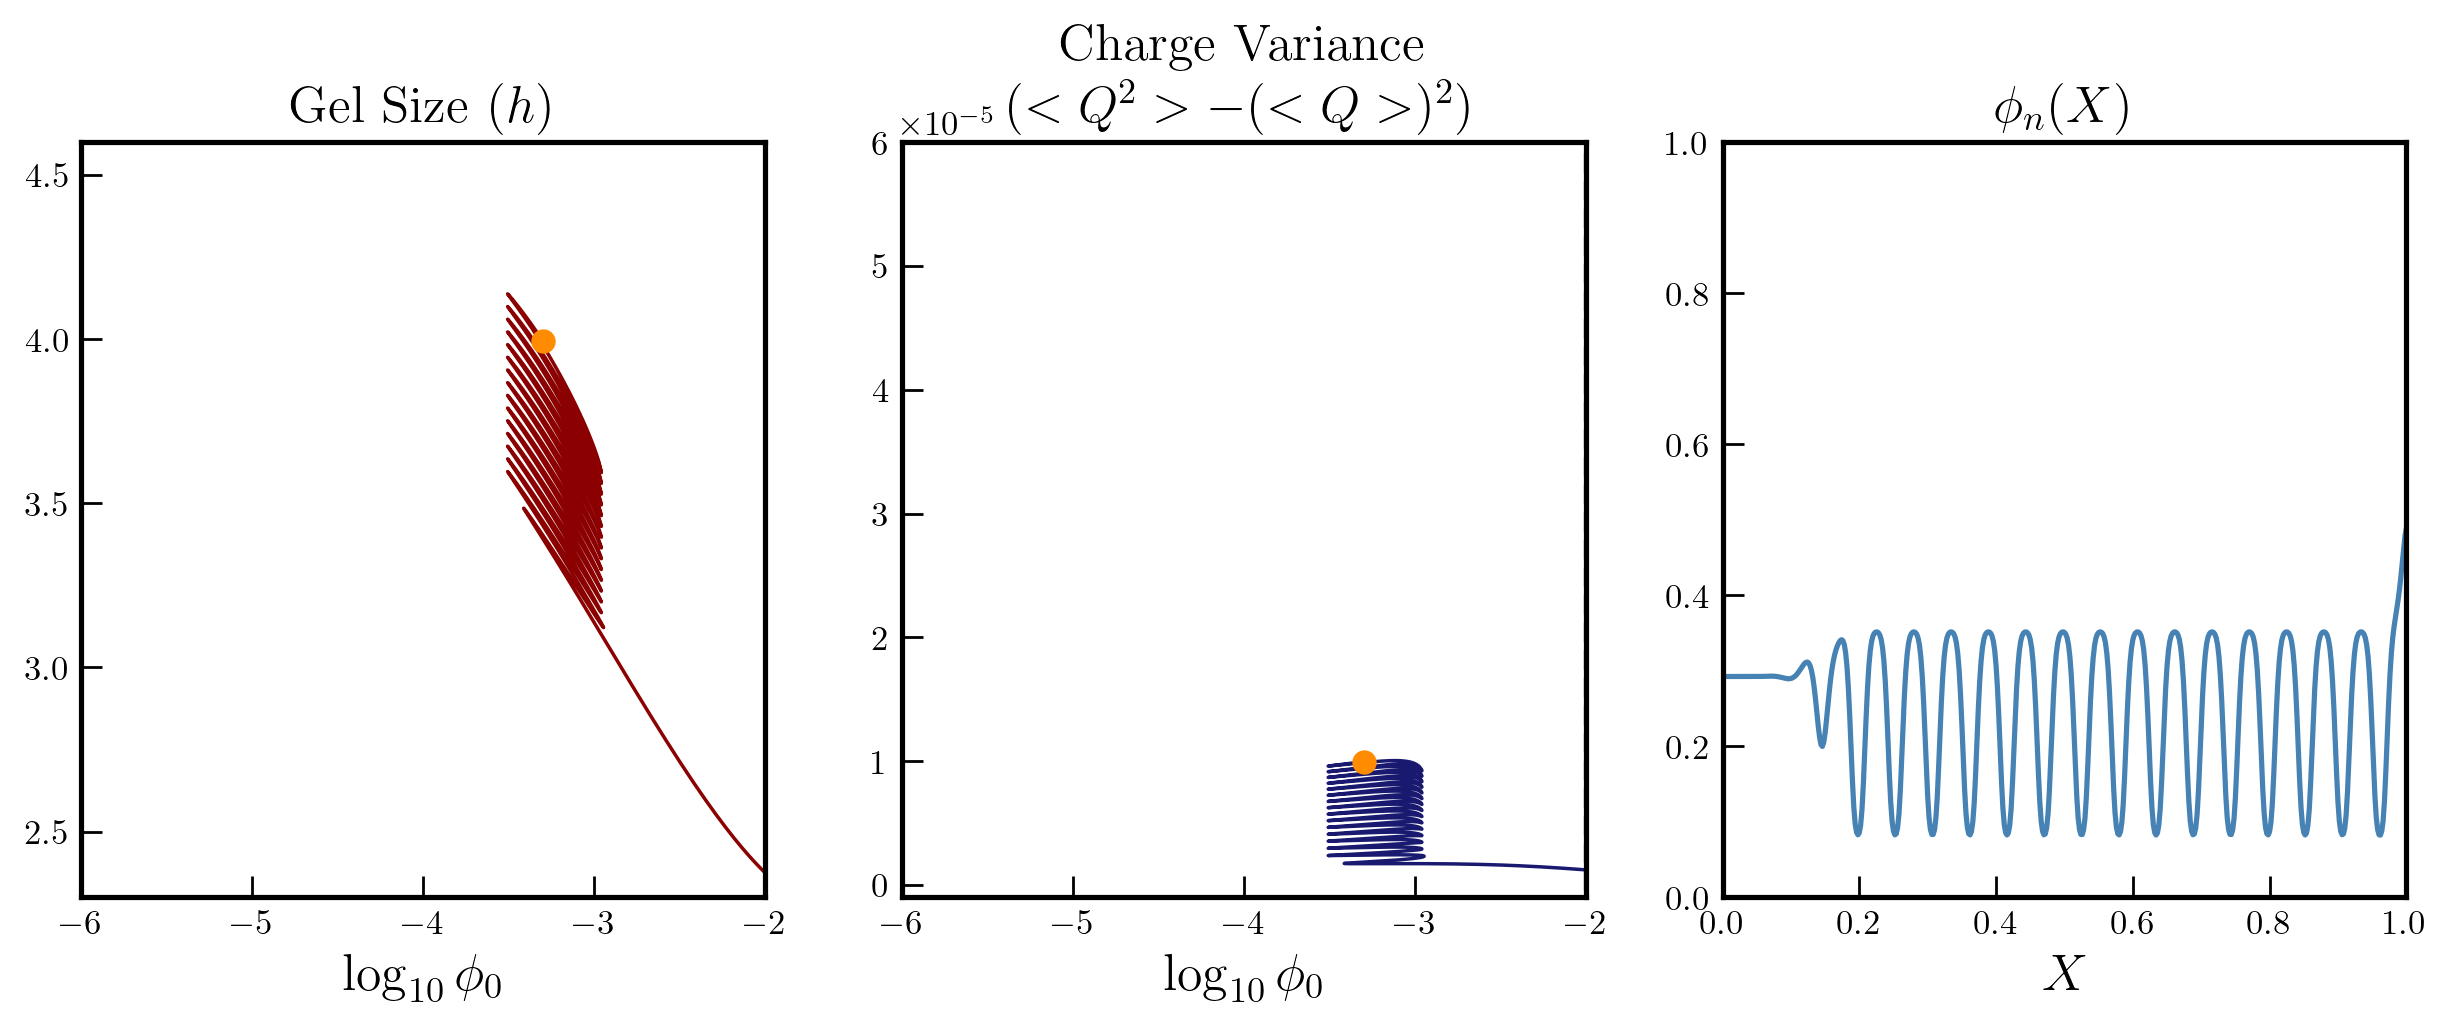

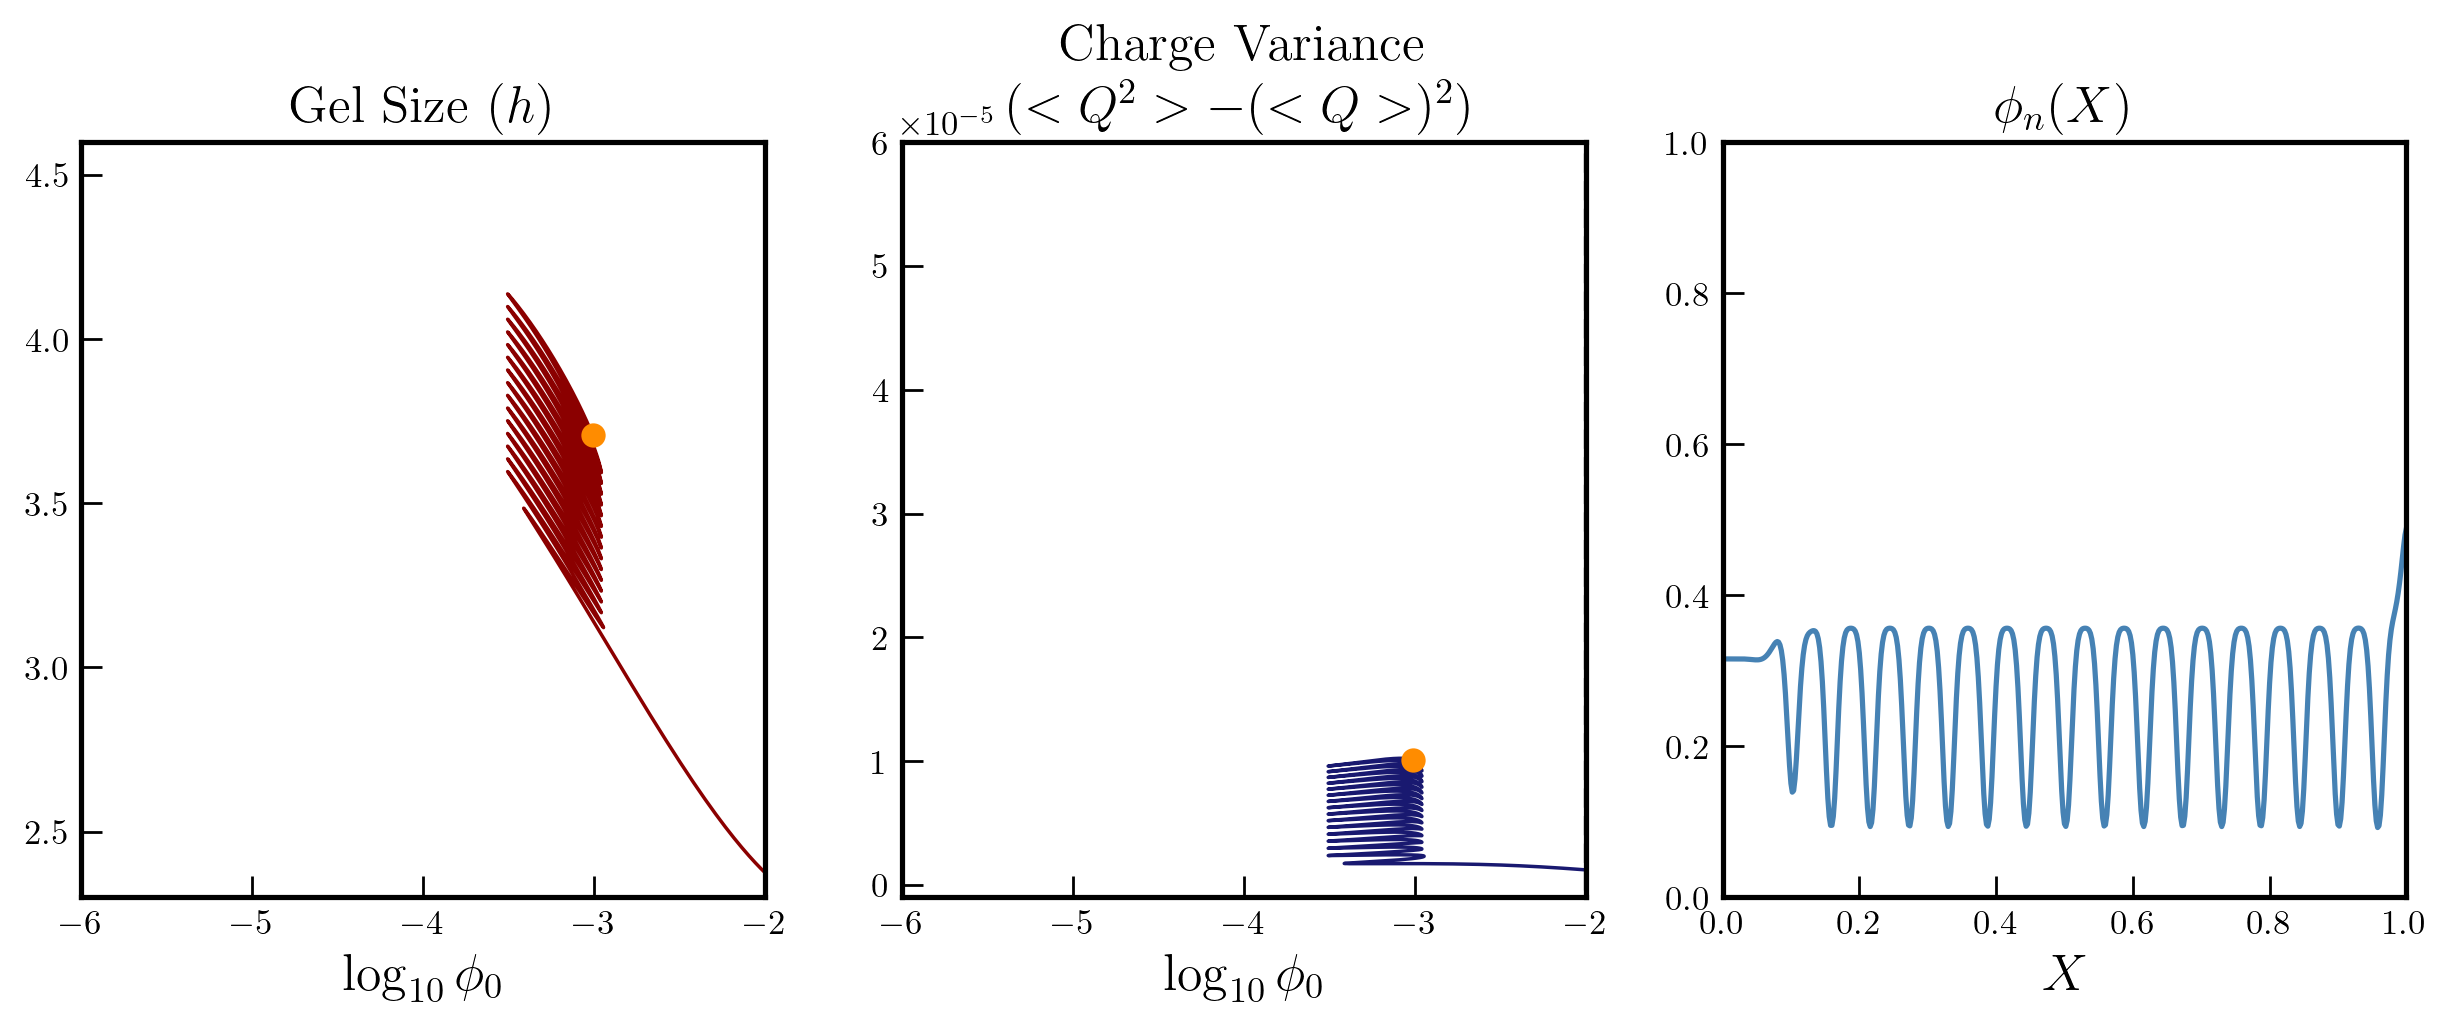

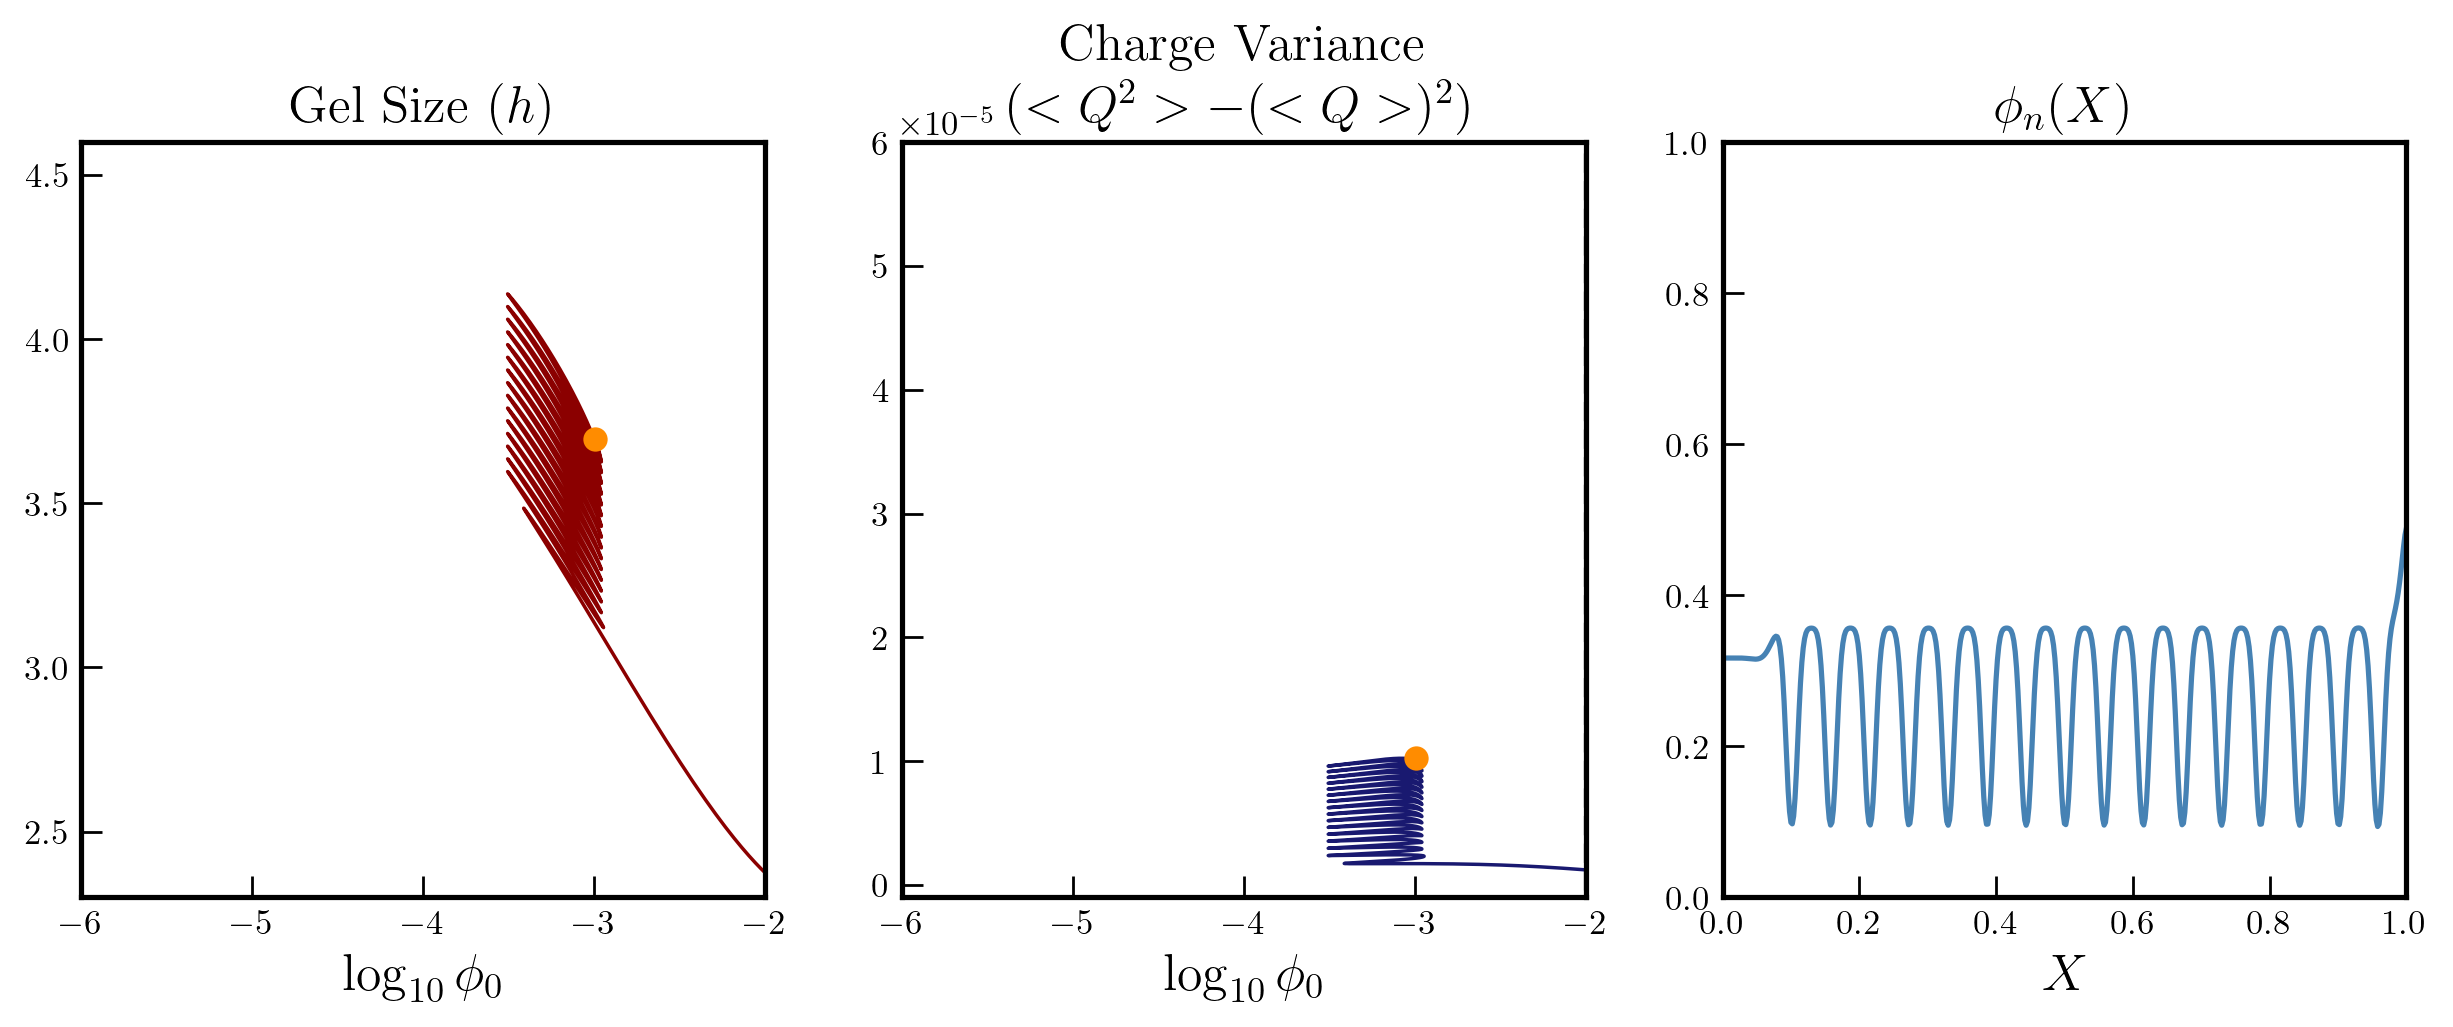

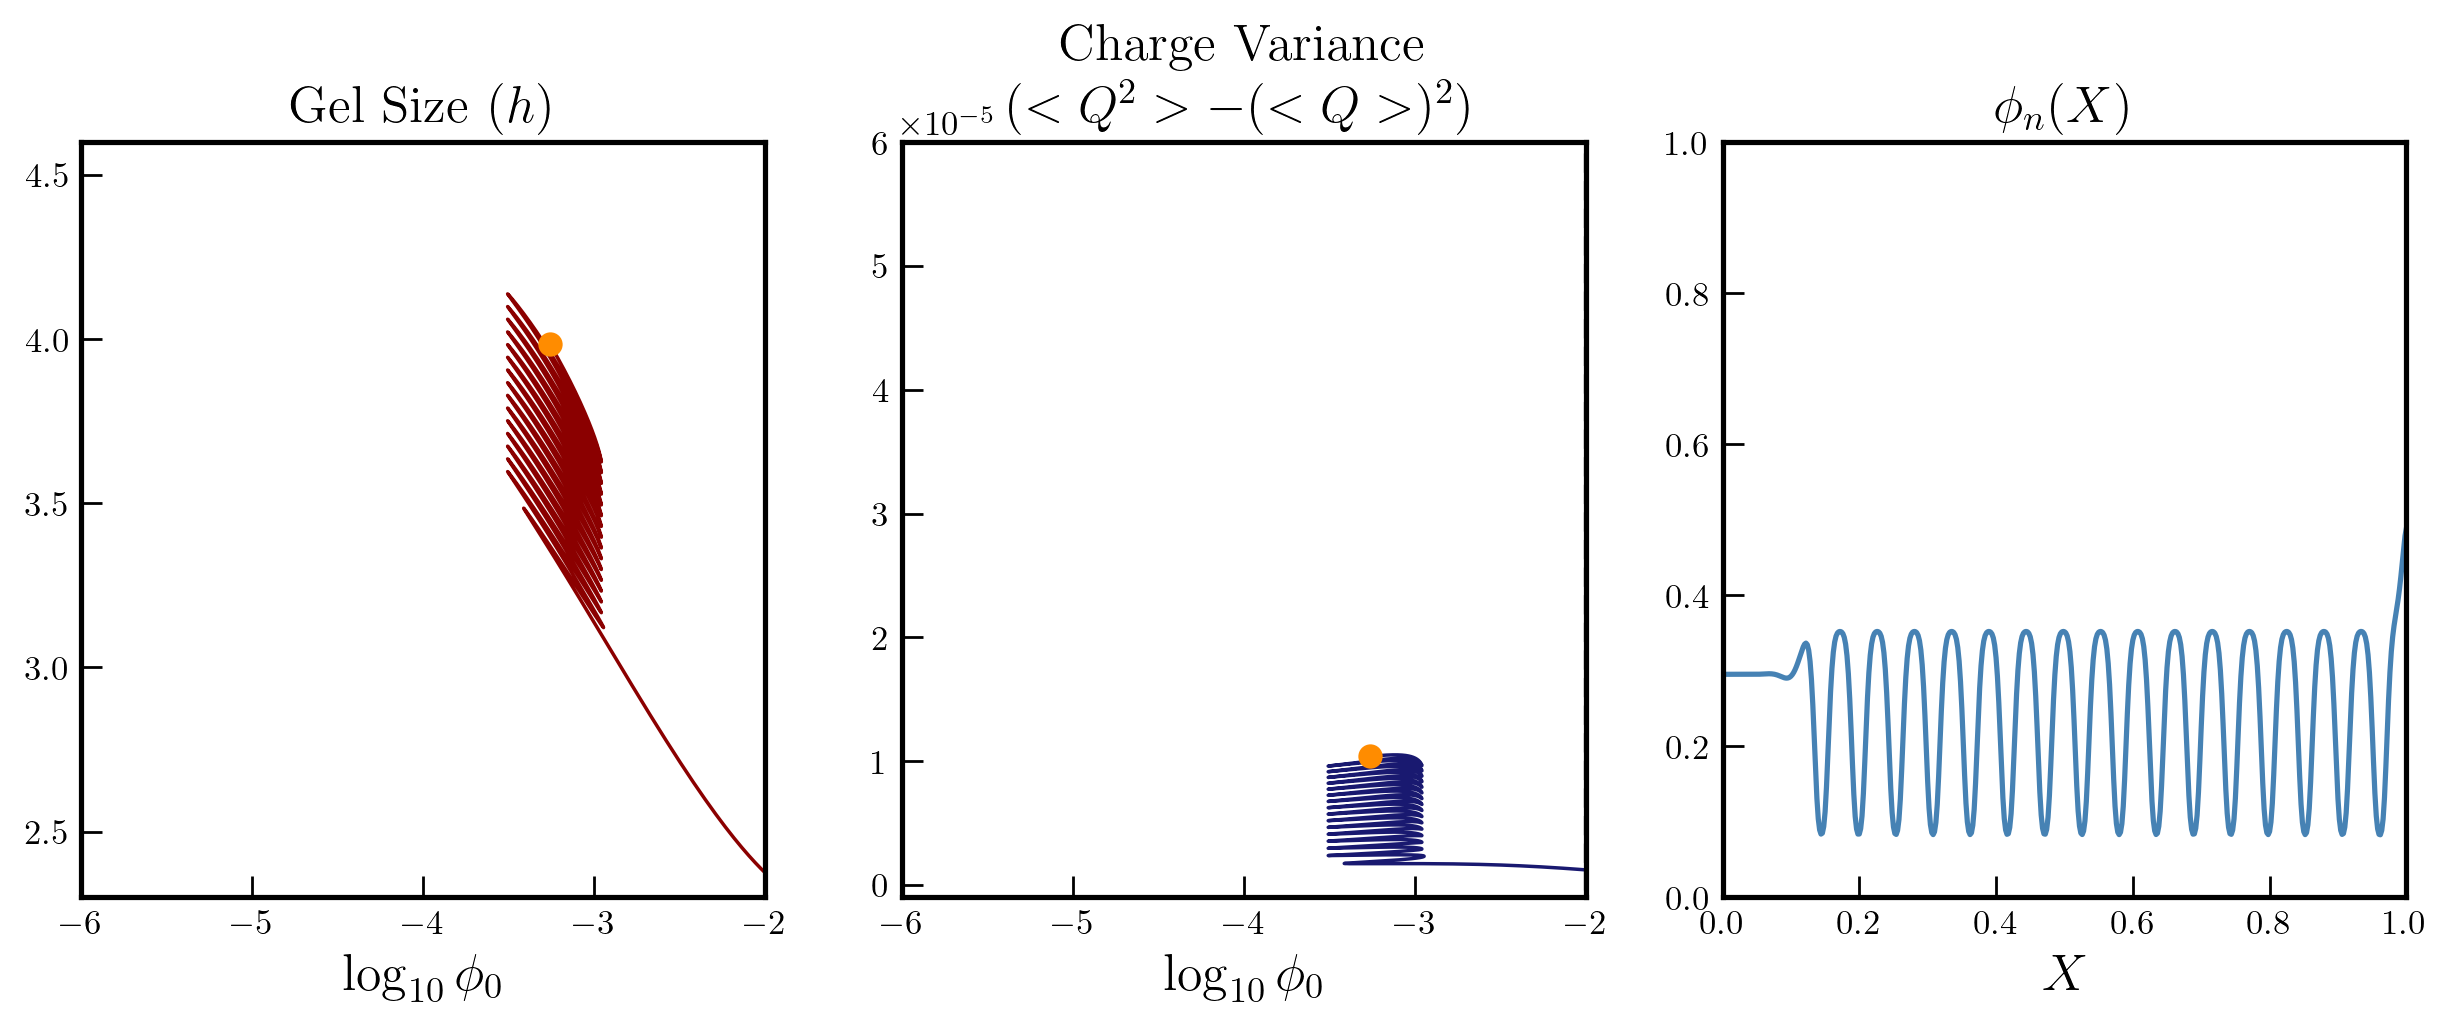

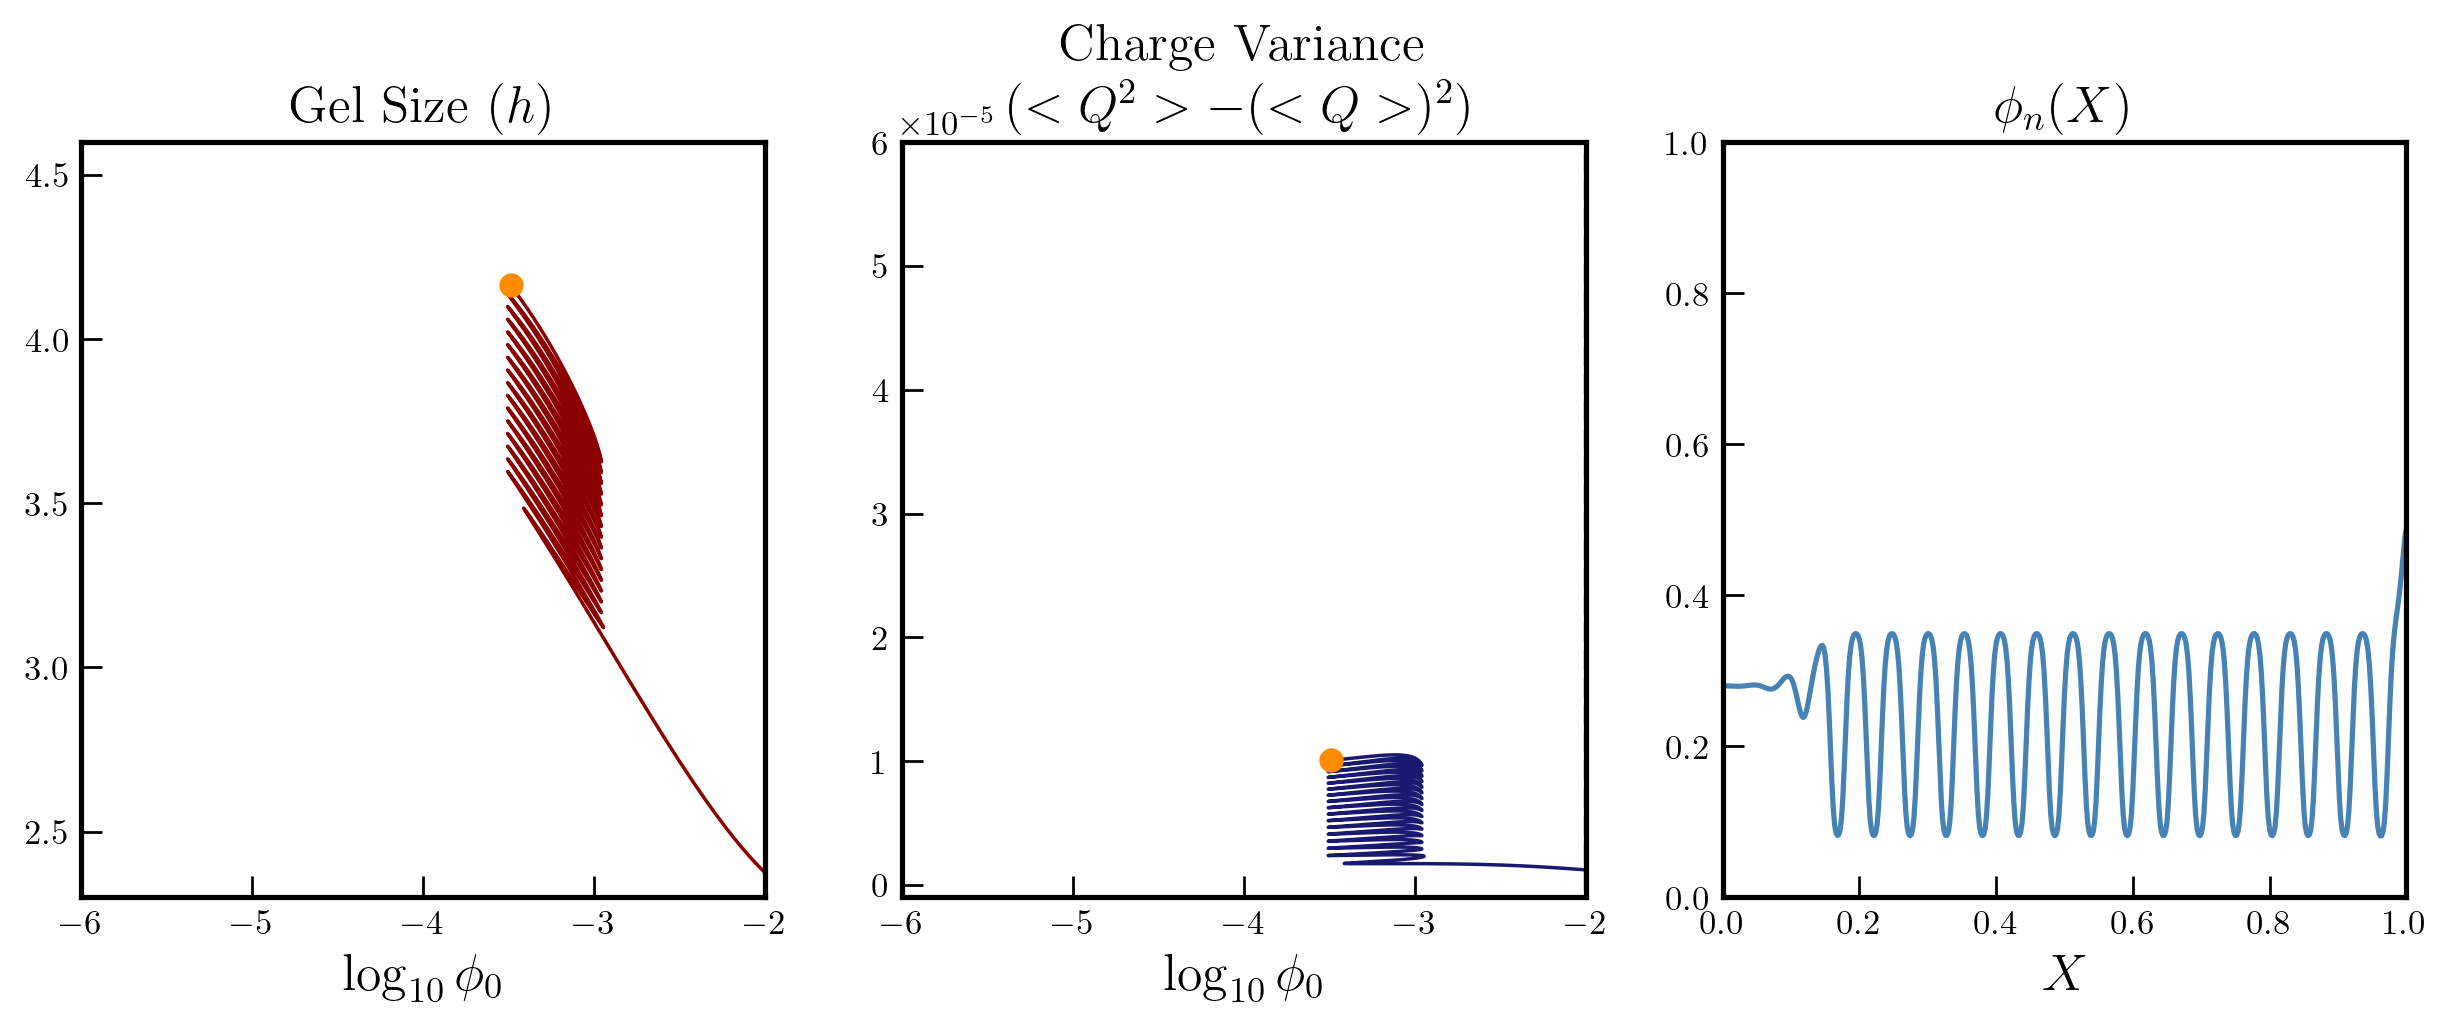

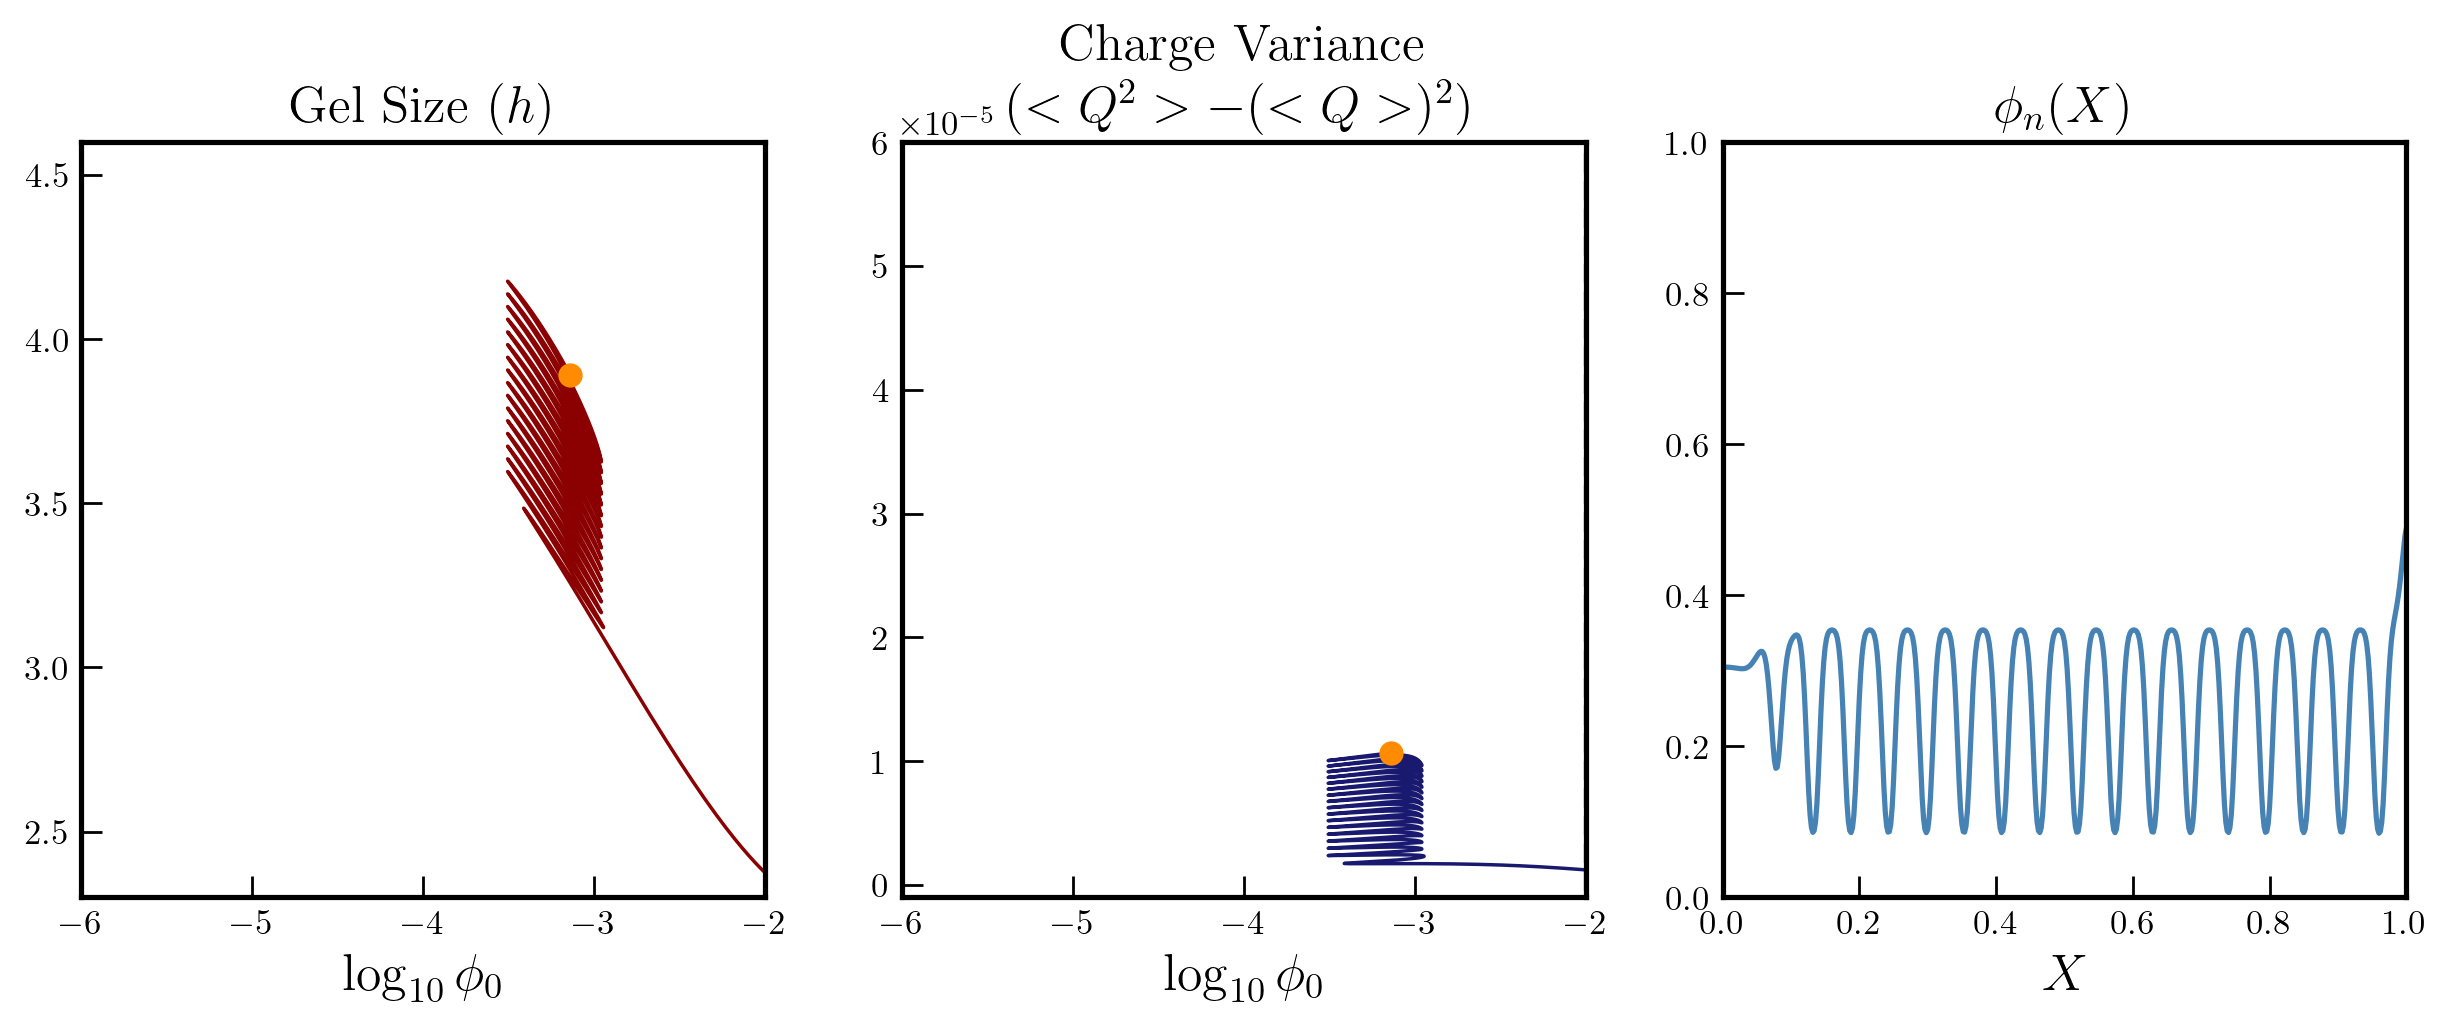

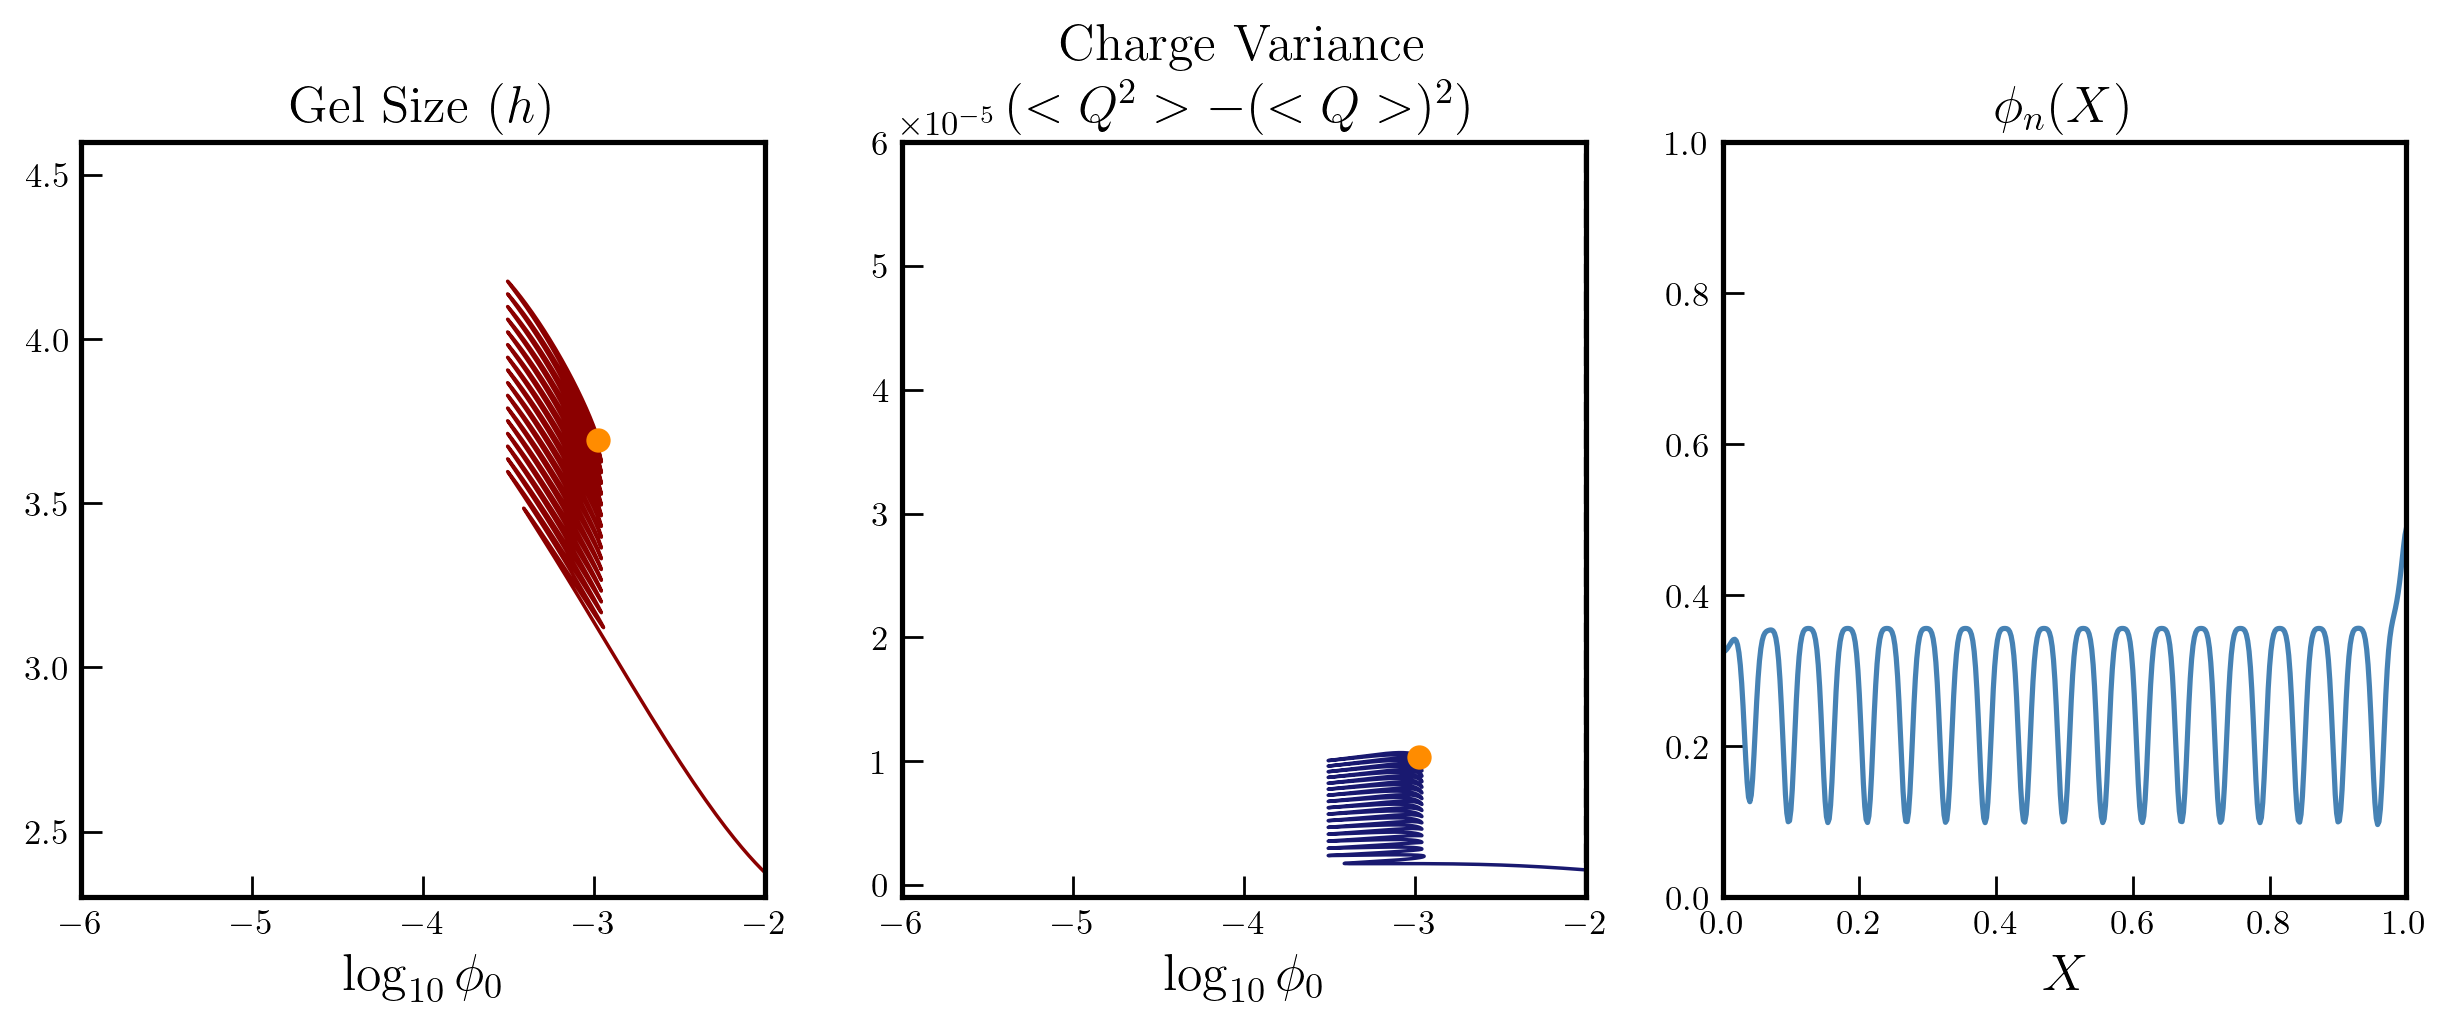

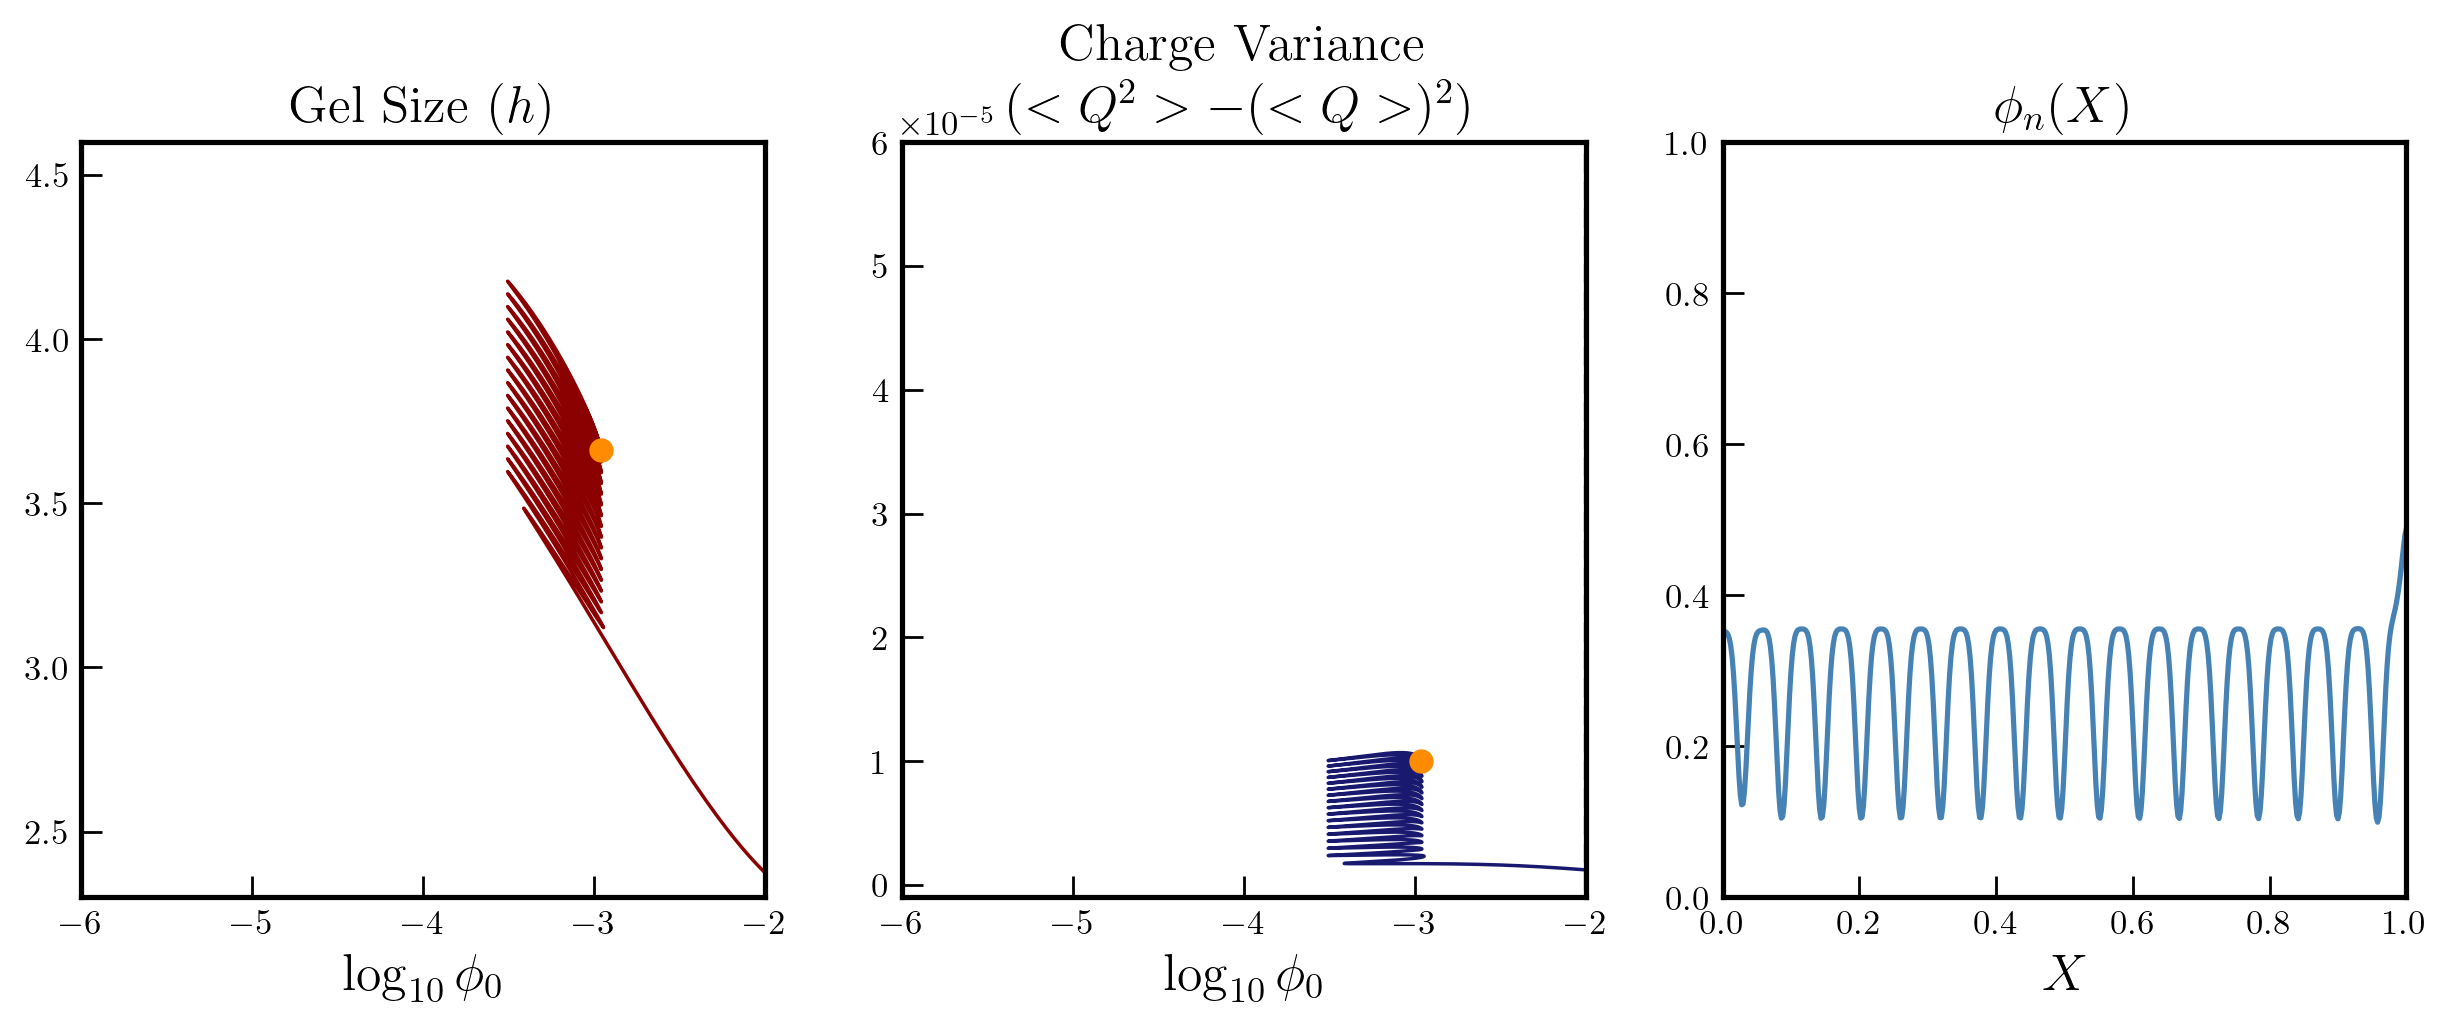

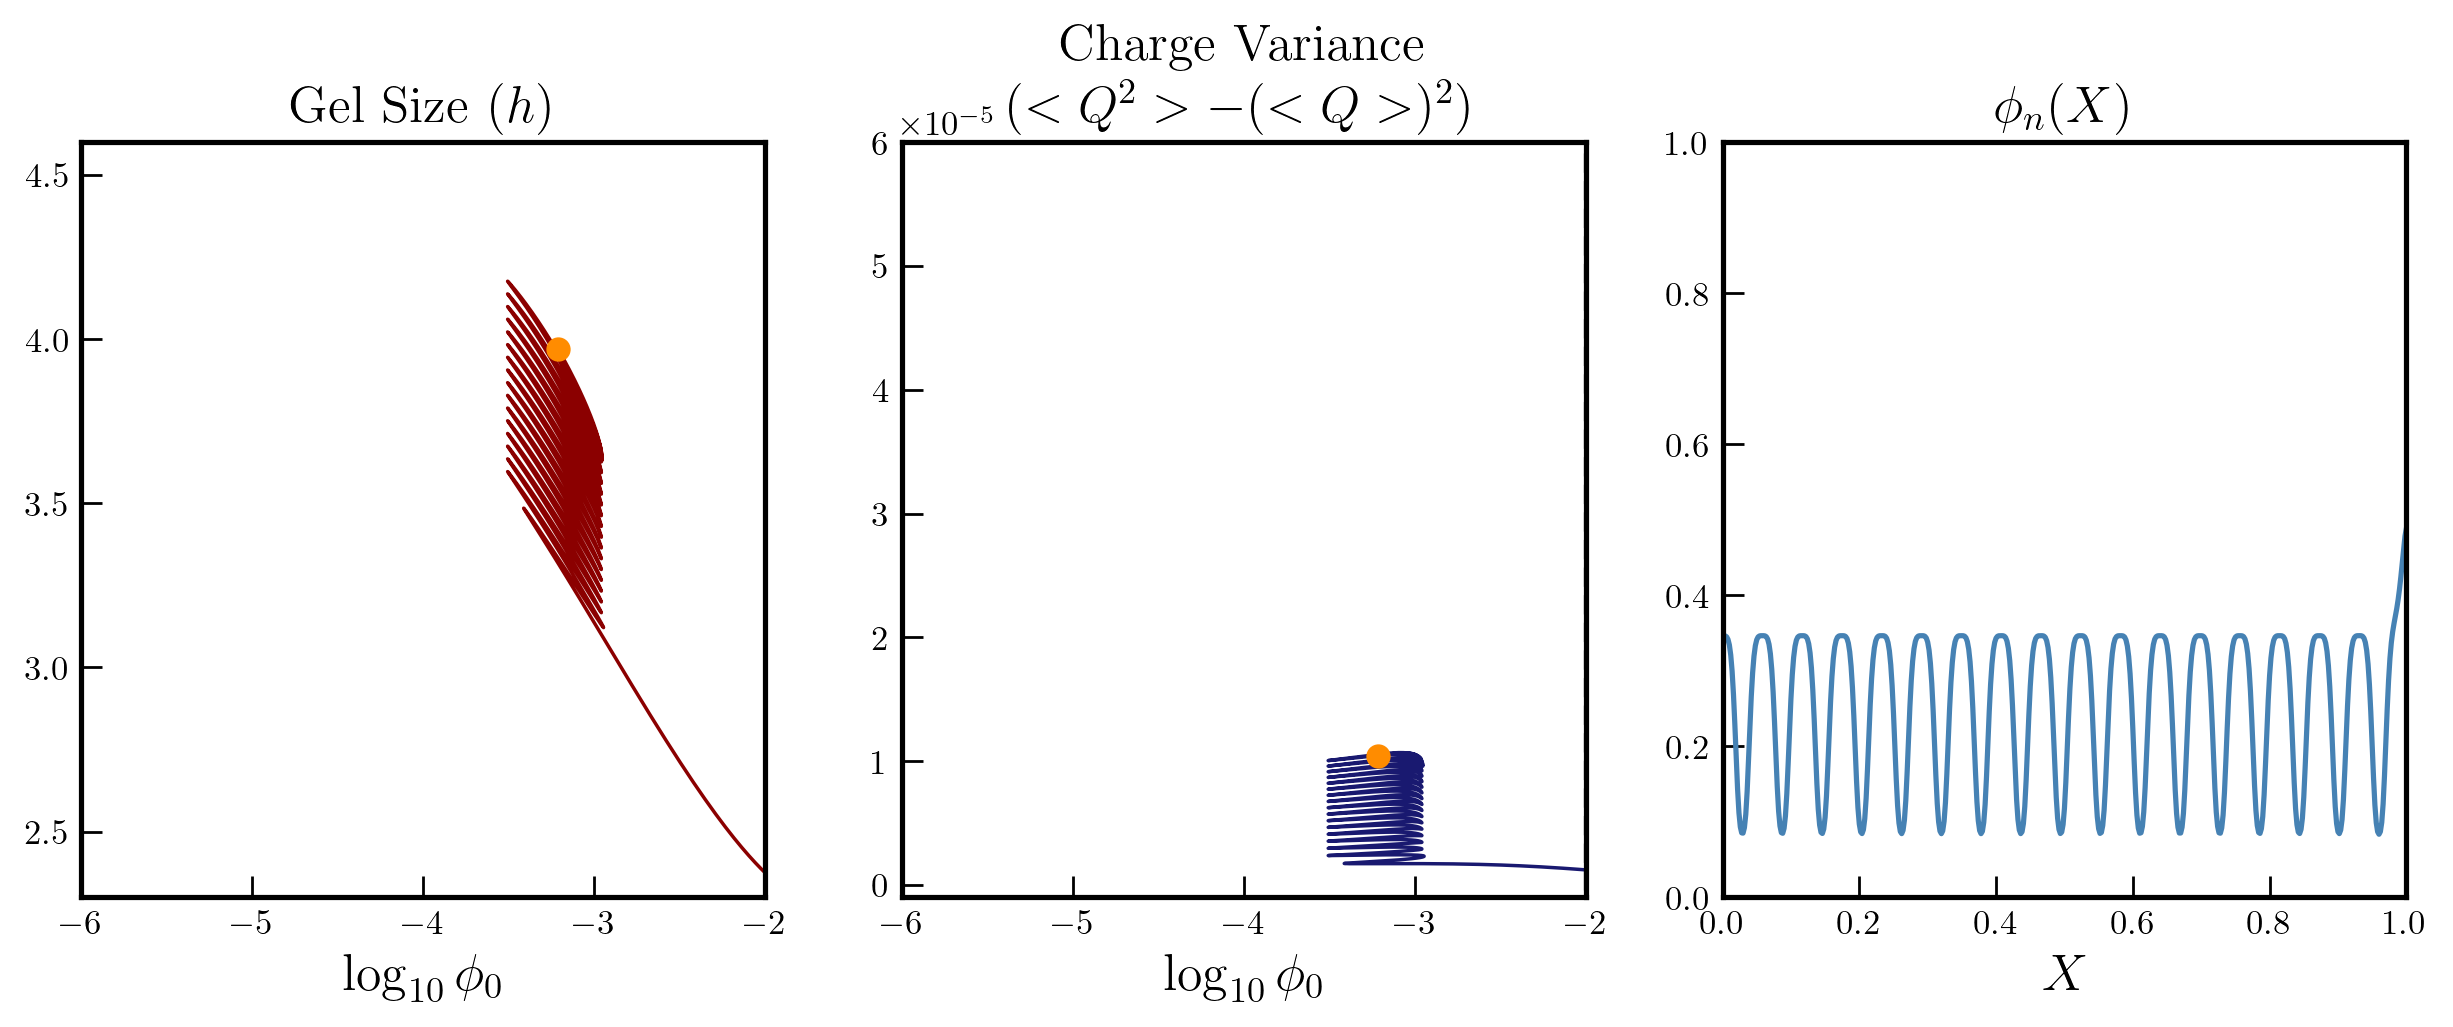

IndexError: list index out of range

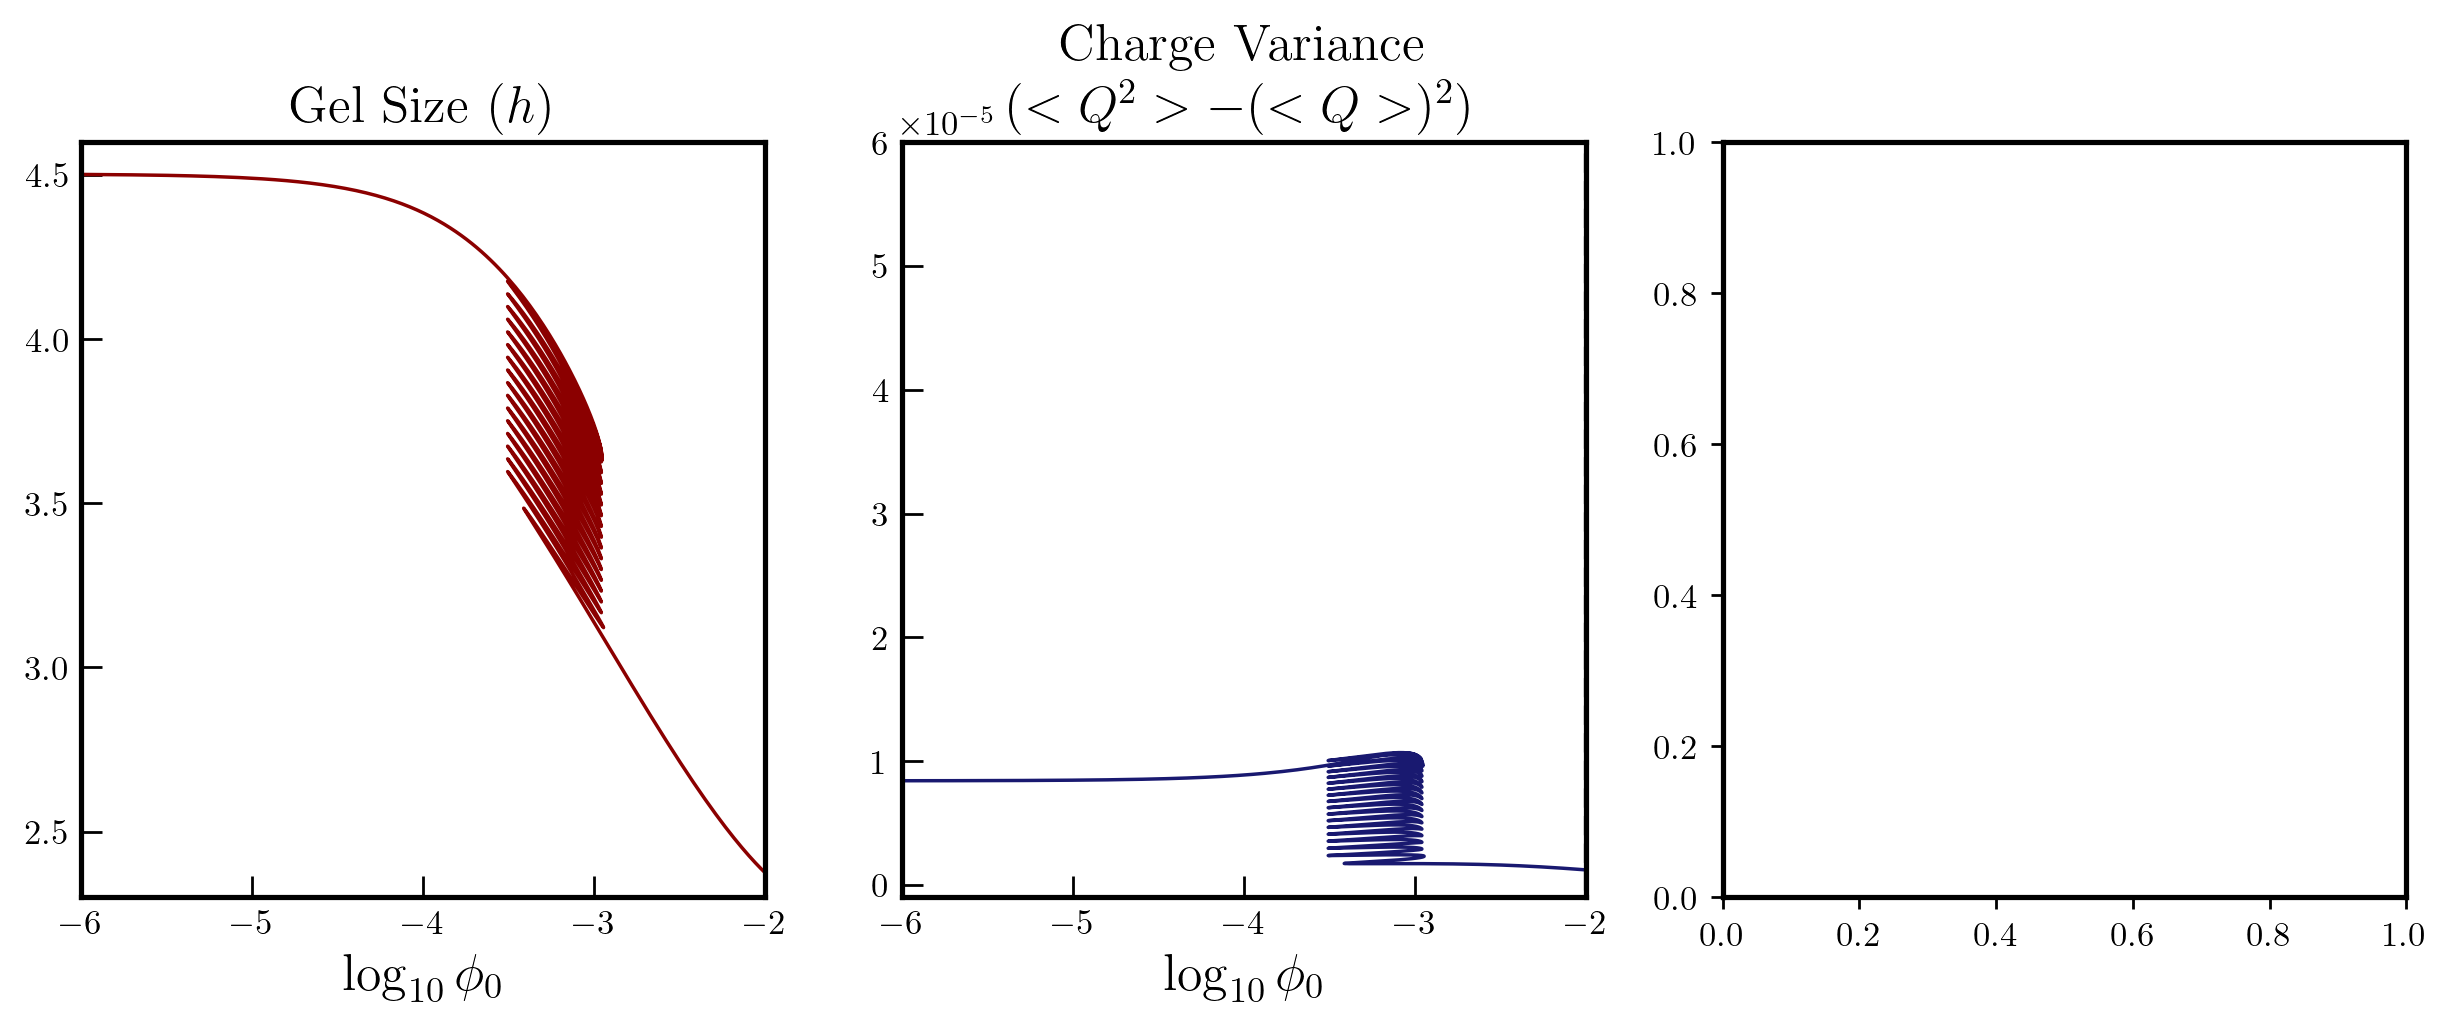

In [22]:
try:
    os.makedirs(direct+'gif/')
    print('Folder created')
except:
    print('Folder already exist')
M=len(phi0)
Nx=fun['phin'].shape[1]-1
XX=np.linspace(0,1,Nx+1)
ind=np.arange(0,M,80)
ind=np.hstack((ind,[M]))
nim=0
bmin=np.min(phi0)
bmax=np.max(phi0)
for n in ind:

    fig=plt.figure(figsize=(12,4.),dpi=250)
    ax=[]

    ax.append(plt.subplot2grid((1, 3), (0, 0), rowspan=1))
    ax.append(plt.subplot2grid((1, 3), (0, 1), rowspan=1))
    ax.append(plt.subplot2grid((1, 3), (0, 2), rowspan=1))

    ax[0].plot(phi0[:n+1],H[:n+1],lw=1.,color='darkred')
    ymin=np.floor(np.min(H)*10)/10
    ymax=np.ceil(np.max(H)*10)/10

    ax[0].set_ylim((ymin,ymax))
    ax[0].set_xlim((bmin,bmax))
    ax[0].set_xlabel('$\log_{10}\\phi_0$')
    ax[0].set_title('Gel Size ($h$)')
    ax[0].tick_params(direction="in",length=6)

    meanQ=trapz(fun['Q'])/Nx
    varQ=trapz((fun['Q']-meanQ[:,None])**2)/Nx
    ax[1].plot(phi0[:n+1],varQ[:n+1],lw=1.,color='midnightblue')
    ax[1].plot([-2,-2],[-2,10],'--',lw=1.5,color='black')
    ax[1].set_ylim((-1e-6,6e-5))
    ax[1].set_xlim((bmin,bmax))
    ax[1].set_xlabel('$\log_{10}\\phi_0$')
    ax[1].set_title('Charge Variance \n($<Q^2>-(<Q>)^2$)')
    ax[1].tick_params(direction="in",length=6)

    ax[0].plot(phi0[n],H[n],'o',color='darkorange',markersize=6)
    ax[1].plot(phi0[n],varQ[n],'o',color='darkorange',markersize=6)
    ax[2].plot(XX,fun['phin'][n,:],lw=1.5,color='steelblue')
    ax[2].set_xlim((0,1))
    ax[2].set_ylim((0,1))
    ax[2].tick_params(direction="in",length=6)

    ax[2].set_title("$\\phi_n(X)$")
    ax[2].set_xlabel("$X$")
    plt.savefig(direct+'gif/'+"image"+str(nim)+'.png',dpi=150,format='png',
         transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)
    nim+=1
    plt.show()


Construction of the gif

In [4]:
import importlib.util

package_name = 'imageio'

spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is not installed. Gif can not be created")
else:
    import imageio
    frames=[]
    for A in range(nim):#range(k-1,-1,-1):
        filename=direct+'gif/image'+str(A)+'.png'
        frames.append(imageio.imread(filename))
    kwargs_write={'fps':6.0,'quantizer':'wu'}
    imageio.mimsave(direct+'diagram.gif',frames,'GIF-FI',**kwargs_write)

In [21]:
M/404

10.05940594059406